<!-- # Table of Contents
* [Introduction](#Introduction)
* [Data Preparation and Cleaning](#Data-Preparation-and-Cleaning)
  * [Importing the Data](#Importing-the-Data)
  * [Duplicate and Missing Values](#Duplicate-and-Missing-Values)
  * [Observations and Features](#Observations-and-Features)
  * [Outliers](#Outliers)
* [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  * [Distribution of Features](#Distribution-of-Features)
  * [Distribution of Features by Category](#Distribution-of-Features-by-Category)
* [Correlation Analysis](#Correlation-Analysis)
* [](#)
* [Summary](#Summary) -->

\newpage
# Executive Summary

- In 2025 the Modern Enterprise Tech Stack is maturing. While AWS and Git are the bedrock of technical roles, Excel remains the world’s most required data tool, proving that human-readable data is still the ultimate business priority. However, the presence of Kubernetes and Power BI shows that businesses are moving toward a future that is both cloud-native and deeply integrated with the Microsoft ecosystem.

- The 2025 job market shows a strong demand for professionals proficient in the following pillars of the Modern Enterprise Tech Stack:
  - Excel is mentioned in 37% of job postings.
  - Followed by the cloud platforms (AWS with 29%, Azure with 24% , and GCL with 14%) for storing, managing, and accessing data.
  - Git(21%) for ensuring the code is versioned.
  - Kubernetes(13%) and Docker(12%) for scalable software.

# Introduction

This report presents an exploratory data analysis (EDA) of job posting data collected throughout 2025. The primary goal is to identify the most required tools designed to collect, store, transform, and analyze data efficiently, or tools that do the supporting role for these operations like git. These will further be refered to as tools. The precence of these tools will be analyzed in the current labor market, in order to understand how these requirements shift across different professional specializations. By analyzing the intersection of job titles and required tools, I will aim to provide some insights into the most popular tools defining the industry in the year 2025.

The initial raw data was gained from a large-scale coresignal jobs data, totaling approximately 60 million global job postings. The analyzed data set used in this report consists of 34 features and around 600 000 observations, ranging from January 1st, 2025, to December 19, 2025. For a detailed breakdown of the features, please refer to the @tbl-dictionary.

| Variable Name    | Type     | Description |
| -------------    | -------  | ----------- |
|  title           | STRING   | The professional title of the job listing.|
|  [manager, engineer, analyst, scientist, developer] | BOOL  | A flag indicating if the role is categorized as a management, engineering, analyst, scientist, developer role.|
| company_name     | STRING   | The name of the hiring organization. | 
| company_industry | STRING   | The sector the company operates in (e.g., Tech, Finance).|
| broad_industry_group | STRING   | The broad sector group that the company operates in (e.g., "Tech, Data and Telecom" ).|
| state            | STRING   | The US state of the job location.|
| created_at       | TIMESTAMP| The date when the job listing was added to the database.| 
| [Excel, AWS, ...] | TIMESTAMP| Individual flags for 23 tools (e.g., Excel, AWS, ...) indicating if the role listing ask experience in that role.| 

: The description of variables for data. {#tbl-dictionary}

## Selection of Tools

The tools selected for this analysis represent the Modern Enterprise Tech Stack - a modular, cloud-native ecosystem that has become the standard for high-performing organizations that need to handle a lot of data.


1. **Data Storage & Infrastructure** - These tools are the "foundations" where massive datasets live.

  - Cloud Data Warehouses: "Snowflake", "BigQuery"

  - Cloud Platforms (General): "AWS", "Azure", "GCP" (Google Cloud Platform)

  - Big Data Storage/Processing: "Databricks", "Spark"

2. **Data Ingestion & Transformation** - These tools move data from source to destination and clean it up for use.

  - Ingestion (ELT): "Fivetran", "Airbyte"

  - Transformation: "dbt"

  - Streaming: "Kafka"

3. **Business Intelligence (BI) & Analytics** - The "face" of the data where executives see the results.

  - Modern BI: "Power_BI", "Tableau", "Looker"

  - Spreadsheets: "Excel", "Google_Sheets"

4.  **Orchestration & Observability** - The "management" layer that ensures everything runs on time and the data is accurate.

  - Orchestration: "Airflow", "Prefect"

  - Observability (Quality): "Monte_Carlo"

5. **DevOps & Developer Experience** - Tools that ensure code is versioned and software is scalable.

  - Version Control: "Git"

  - Containerization: "Docker", "Kubernetes"

  - Infrastructure as Code: "Terraform"


# Data Preparation and Cleaning

For data preparation and cleaning please refer to "Appendix 1: Preparing the data set." It will give the detailed look into how the data frame that I will analyse here was prepared. 

A preview of the analysed dataset is presented below in @tbl-preview-1, @tbl-preview-2, @tbl-preview-3.

In [ ]:
# | include: false
import sys
import os
import warnings

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mtick
import pandas as pd
import seaborn as sns
import plotly.io as pio

In [2]:
# | include: false
pio.renderers.default = "notebook+notebook_connected"
warnings.filterwarnings("ignore", category=FutureWarning)
pd.set_option("display.max_colwidth", 20)

In [3]:
# | include: false
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(project_root)

from src.feature_utils import (
    create_faang_df,
    create_mango_df,
    get_dominant_language_by_state,
)
from src.viz_utils import (
    plot_tools_distribution_by_tools,
    plot_tools_market_share,
    plot_us_hiring_heatmap,
    plot_us_tools_dominance,
    plot_tool_requirements,
    plot_category_requirements
)

In [4]:
# | include: false
oxy_violet = "#130f35"
oxy_light_blue = "#52A8F8"
oxy_teal = "#23E6A8"

oxylab_cmap = LinearSegmentedColormap.from_list(
    "custom_cmap", [oxy_violet, oxy_light_blue, oxy_teal]
)

plt.style.use("fast")
plt.rcParams.update(
    {
        "font.family": "Avenir",
        "text.color": oxy_violet,
        "axes.labelcolor": oxy_violet,
        "xtick.color": oxy_violet,
        "ytick.color": oxy_violet,
        "figure.facecolor": "none",
        "axes.titlesize": 16,
        "axes.titleweight": "bold",
        "axes.titlepad": 15,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "figure.facecolor": "none",
        "axes.facecolor": "none",
        "savefig.transparent": True,
        "figure.autolayout": True,
    }
)

In [5]:
# | label: tbl-preview-1
# | tbl-cap: "Raw data pre-view first 5 rows(part 1)"

df = pd.read_csv("../data/processed/tools/jobs_proc_filtered_2025_no_desc.csv")
df["Excel"] = df["Excel_verified"]
df["Airflow"] = df["Airflow_verified"]
df["Prefect"] = df["Prefect_verified"]
df.drop(columns=["Excel_verified", "Airflow_verified", "Prefect_verified"], inplace=True)
df["created_at"] = pd.to_datetime(df["created_at"], format="mixed", utc=True)

print(df.shape)
df[["title", "company_name", "company_industry", "state", "created_at"]].head()

(596962, 34)


title         company_name     company_industry  \
0  Senior Manager, ...               Amazon  Software Develop...   
1  Business Intelli...         IntelliSavvy  IT Services and ...   
2  HAZARDOUS SUBSTA...  California Depar...  Environmental Se...   
3  PMS 378 Senior T...  CACI Internation...  IT Services and ...   
4  COMPENSATION ANA...    Boston University                  NaN   

                 state           created_at  
0            Tennessee 2025-09-10 20:07:...  
1           Washington 2025-09-22 12:07:...  
2           California 2025-06-04 00:17:...  
3  District of Colu... 2025-09-11 23:04:...  
4        Massachusetts 2025-09-18 01:04:...

In [6]:
# | label: tbl-preview-2
# | tbl-cap: "Raw data pre-view first 5 rows(part 2)"

df[["title", "manager", "engineer", "analyst", "scientist", "developer"]].head()

title  manager  engineer  analyst  scientist  developer
0  Senior Manager, ...        1         1        0          0          0
1  Business Intelli...        0         1        0          0          0
2  HAZARDOUS SUBSTA...        0         1        0          0          0
3  PMS 378 Senior T...        0         0        1          0          0
4  COMPENSATION ANA...        0         0        1          0          0

In [7]:
# | label: tbl-preview-3
# | tbl-cap: "Raw data pre-view first 5 rows(part 3)"

df[["title", "Excel", "BigQuery", "Airflow", "Prefect"]].head()

title  Excel  BigQuery  Airflow  Prefect
0  Senior Manager, ...      1         0        0        0
1  Business Intelli...      0         0        0        0
2  HAZARDOUS SUBSTA...      1         0        0        0
3  PMS 378 Senior T...      1         0        0        0
4  COMPENSATION ANA...      1         0        0        0

## Observations and Features

This section begins the detailed exploration of the dataset's structure. I will examine the characteristics of each column to ensure data integrity and understand the available information.

Specifically, for categorical features (like `title`, `company_name`, and `company_industry`), I'll identify the distinct categories present and count the number of unique observations in each. This step confirms the data types and prepares us for subsequent analysis. Below you can see the breakdown of each type.

In [8]:
tech_tools = df.columns.tolist()[10:-1]
cat_cols = [
    "title",
    "company_name",
    "company_industry",
    "state",
    "broad_industry_group",
]
date_cols = ["created_at"]
jobs_cols = df.columns.tolist()[1:6]
print("Analysed tools:\n", tech_tools[:8], "\n", tech_tools[8:16], "\n", tech_tools[16:])
print("Categorical features:\n", cat_cols)
print("Date features:\n", date_cols)
print("Job titles:\n", jobs_cols)

Analysed tools:
 ['Excel', 'Google_Sheets', 'Fivetran', 'Airbyte', 'dbt', 'Snowflake', 'BigQuery', 'Airflow'] 
 ['Prefect', 'Power_BI', 'Tableau', 'Looker', 'Git', 'Docker', 'Kubernetes', 'Terraform'] 
 ['AWS', 'Azure', 'GCP', 'Databricks', 'Kafka', 'Spark', 'Monte_Carlo']
Categorical features:
 ['title', 'company_name', 'company_industry', 'state', 'broad_industry_group']
Date features:
 ['created_at']
Job titles:
 ['manager', 'engineer', 'analyst', 'scientist', 'developer']


In total 23 tools are present in the data set. The categotical information about the jobs data is `title`, `company_name`, `company_industry`, `state`, `broad_industry_group`.
The date when the job posting was created is in the `created_at` column. And if the particular job posting is listed for a `manager`, `engineer`, `analyst`, `scientist`, or a `developer` is noted in the corresponding columns.

> NOTE:
> Keep in mind that the same job posting can be in multiple job title categories, like scientist and analyst, as well as single job posting could require experience with multiple tools.

## Outliers


> NOTE:
>
> Outliers were mainly handaled in Appendix 2. Please refer to the corresponding notebook/report for more details. The function used for verifying the meaning of the words like "excel" or "airflow" utilizes the Ollama Large Language Model (LLM) to identify the meaning the given word and decide if it is tool or just a word. This means the categorization is not completely precice. This was nessesessary because word "excel" could either be an english verb or the name of a program, also some tools might have some false positives, due to the typos in the job descriptions like the word "perfect" is misspelled to "prefect", thus LLM was employed to avoid these cases. 

From the tables @tbl-description-cat and @tbl-description-date we see there is not so much additional improvements we could do, we perhaps could fix some typos in the data but that will not be so crucial for this analyses. 

In [9]:
# | label: tbl-description-cat
# | tbl-cap: "Description of the categorical data"
df[cat_cols].describe()

title   company_name     company_industry       state  \
count              596962         591502               527733      444562   
unique             272068          64081                  393          54   
top     Financial Analyst  Jobs via Dice  Software Develop...  California   
freq                 3299          27664                94613       63790   

       broad_industry_group  
count                596962  
unique                   11  
top     Tech, Data & Tel...  
freq                 226571

From this we can see that there are 54 states in US, which includes states and US territories.

In [10]:
# | label: tbl-description-date
# | tbl-cap: "Description of the date when job posting was created data."
df[date_cols].describe()

created_at
count               596962
mean   2025-07-13 16:26...
min    2025-01-01 00:14...
25%    2025-05-01 00:38...
50%    2025-07-24 07:01...
75%    2025-10-06 09:19...
max    2025-12-19 04:24...

# Exploratory Data Analysis

This section presents the Exploratory Data Analysis (EDA) of the 2025 US job market for tech jobs. The goal is to identify patterns and trends within the job postings. The analysis begins with a general overview of the dataset, including the total number of observations and key features. This initial phase identifies the most common tools, the primary industries hiring for tech roles, and the organizations with the highest volume of postings. We also examine the timing of these posts to identify potential hiring seasons and pinpoint which geographic states are leading in tech employment.

## Distribution of Features

Understanding the foundational characteristics of the data is the first step. This part of the report covers:

- Tool Popularity: An absolute and percentage-based ranking of the 23 identified tools.

- Industry and Company Presence: Identification of the sectors and specific employers driving the most activity.

- Temporal and Geographic Trends: A look at hiring cycles throughout 2025 and the states with the highest density of tech opportunities.




### Distribution of the Mentions of tools

Let's see which tools were the most popular in 2025 (@fig-pop-tools). We can see that Excel, AWS, Azure, Git and GCP takes the top 5, for the full list see the @tbl-pop-tools. The comparison of each category can be  found below. 

1. **Data Storage & Infrastructure** 

  - Cloud Data Warehouses: "Snowflake" is mentioned 2.8 times more than "BigQuery".

  - Cloud Platforms (General): "AWS", is mentioned 1.2 times more than "Azure", and 2.1 times more than "GCP".

  - Big Data Storage/Processing: "Spark" is mentioned 1.5 times more than "Databricks".

2. **Data Ingestion & Transformation** - These tools move data from source to destination and clean it up for use.

  - Ingestion (ELT): "Fivetran" is mentioned 4.3 times more than "Airbyte"

  - Transformation: "dbt"

  - Streaming: "Kafka"

3. **Business Intelligence (BI) & Analytics** - The "face" of the data where executives see the results.

  - Modern BI: "Power_BI", is mentioned 1.2 times more than "Tableau", and 7.7 times more than "Looker"

  - Spreadsheets: "Excel" is mentioned 48 times more than "Google_Sheets". 

4.  **Orchestration & Observability** - The "management" layer that ensures everything runs on time and the data is accurate.

  - Orchestration: "Airflow"  is mentioned 14.4 times more than "Prefect"

  - Observability (Quality): "Monte_Carlo"

5. **DevOps & Developer Experience** - Tools that ensure code is versioned and software is scalable.

  - Version Control: "Git"

  - Containerization: "Docker" are mentioned aproximatelly equally "Kubernetes"

  - Infrastructure as Code: "Terraform"

In [11]:
# | label: tbl-pop-tools
# | tbl-cap: "The most mentioned tools in 2025."

df_count = pd.DataFrame(df[tech_tools].sum())
df_count.columns = ["count"]
df_count["count"] = df_count["count"].astype(int)
df_count = df_count.sort_values(by="count", ascending=False)
df_count["percentage"] = 100 * df_count["count"] / len(df)
df_count.round(2)

count  percentage
Excel          218122       36.54
AWS            173477       29.06
Azure          143179       23.98
Git            122983       20.60
GCP             81459       13.65
Kubernetes      77844       13.04
Power_BI        74677       12.51
Docker          74069       12.41
Tableau         61319       10.27
Terraform       44385        7.44
Spark           38985        6.53
Snowflake       34179        5.73
Kafka           30023        5.03
Databricks      26292        4.40
Airflow         13499        2.26
BigQuery        12413        2.08
Looker           9767        1.64
dbt              9397        1.57
Google_Sheets    4564        0.76
Fivetran         2032        0.34
Monte_Carlo      1411        0.24
Prefect           939        0.16
Airbyte           476        0.08

In [12]:
# | include: false
top_10_tools = df_count.index.to_list()[:10]
top_10_tools

['Excel',
 'AWS',
 'Azure',
 'Git',
 'GCP',
 'Kubernetes',
 'Power_BI',
 'Docker',
 'Tableau',
 'Terraform']

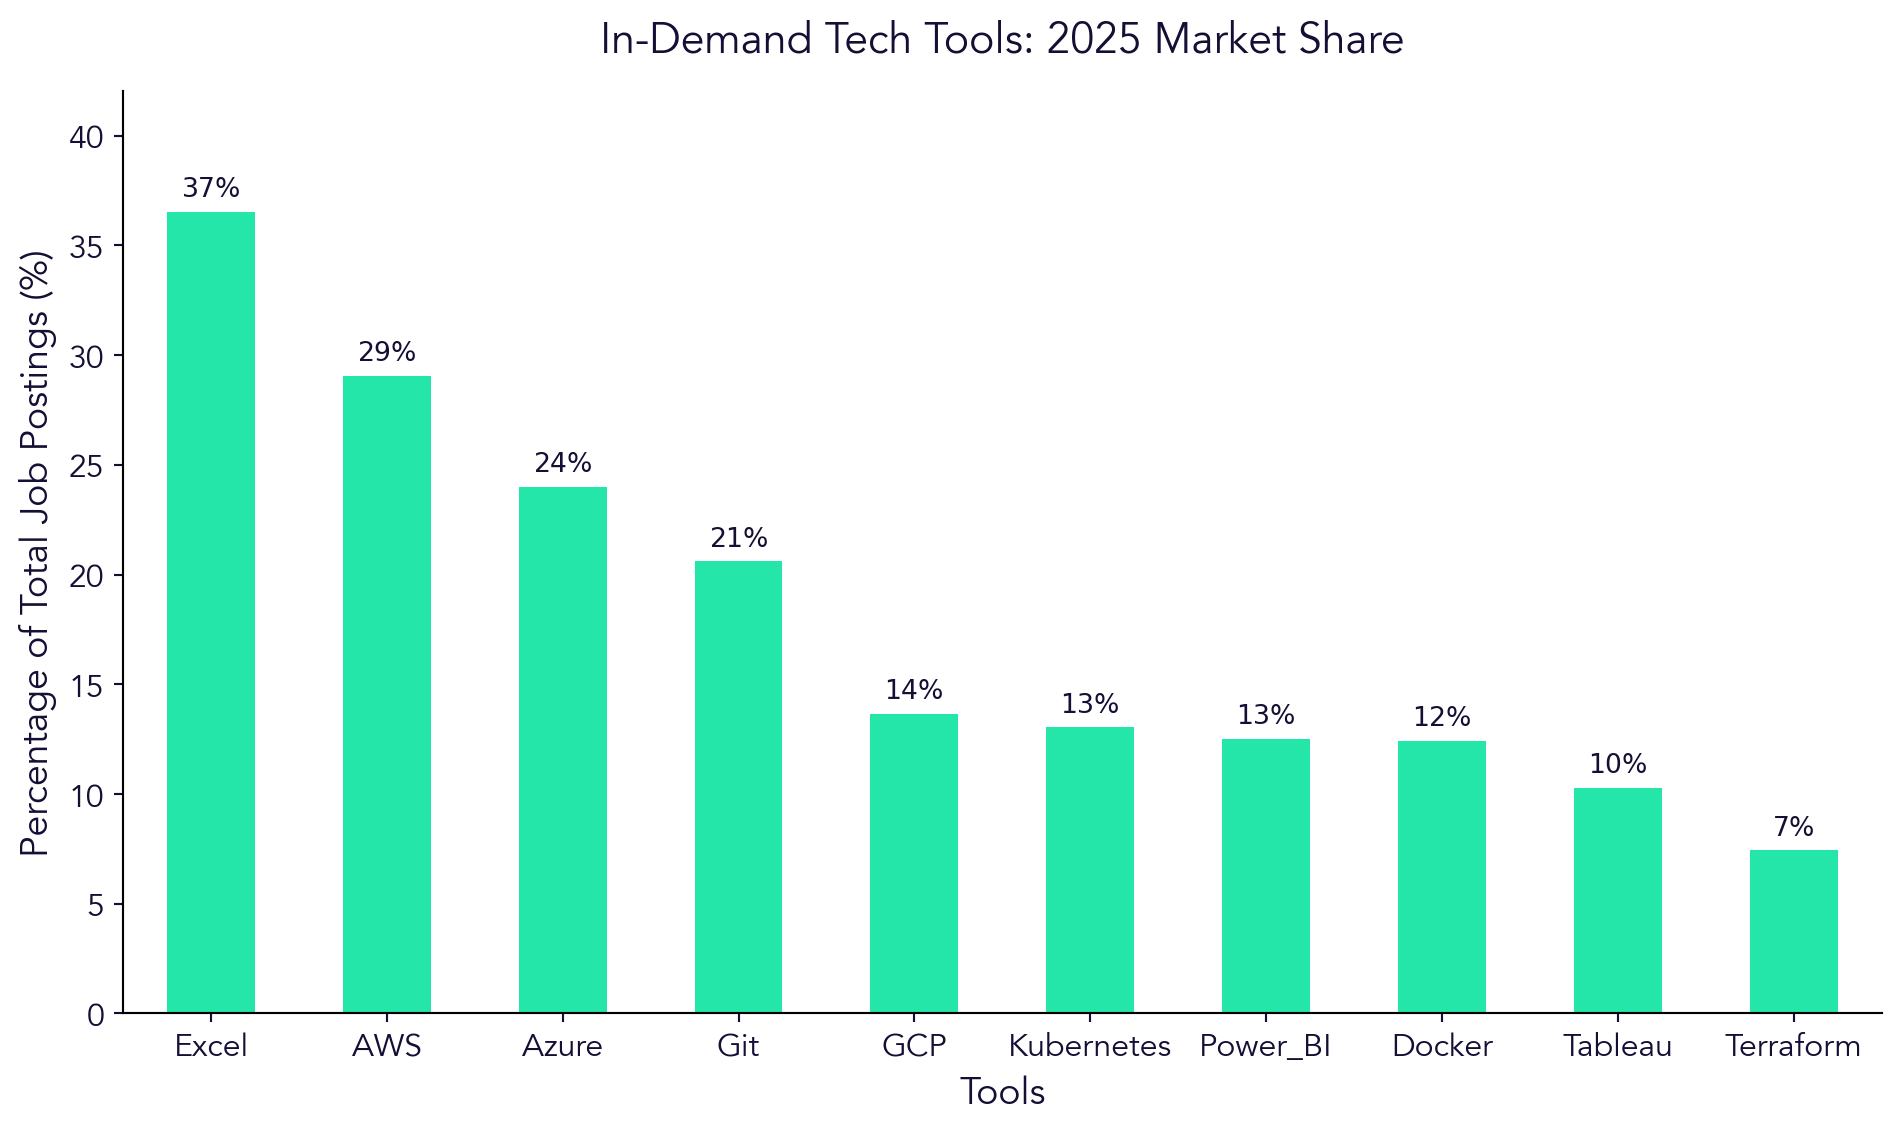

In [13]:
# | label: fig-pop-tools
# | fig-cap: "The most mentioned tools in 2025."
# | out-width: 90%

fig, ax = plot_tools_market_share(df, tech_tools)

1. **Data Storage & Infrastructure**

- AWS is the Uncontested Leader: With nearly 29% of analyzed mentions, AWS is more popular than Azure (24%) and GCP (14%). If a company is hiring for the cloud, they are likely hiring for AWS.

- Big Data Processing vs. Warehousing: Spark (7%) and Snowflake (6%) are neck-and-neck. This suggests that the market is split between companies doing heavy engineering (Spark) and those preferring managed data warehousing (Snowflake).

- BigQuery vs. Snowflake: Within the "Cloud Warehouse" niche, Snowflake is significantly more required (6%) than BigQuery (2%). This highlights Snowflake's success as a platform-agnostic solution that works across all clouds.

2. **Business Intelligence (BI) & Analytics** 

- Excel is Still the Tool of Choice: Despite the rise of "Advanced Analytics," Excel appears in 37% of analyzed tech-related job posts. It remains the universal language of business, outperforming specialized BI tools like Power BI (13%) and Tableau (10%) by a factor of 3 to 1.

- Power BI Pulls Ahead of Tableau: In the battle of professional visualization, Power BI (13%) has overtaken Tableau (10%). This is likely driven by the deep integration of Power BI into the Microsoft 365 ecosystem, making it a "default" choice for many enterprises.

3. **DevOps & Engineering**

- Git is Mandatory: Mentioned in 21% of jobs, Git is no longer a "bonus" skill; it is a fundamental requirement for anyone working with code or data.

- Kubernetes vs. Docker: Kubernetes (13%) is slightly more popular than Docker (12%). This signals that companies aren't just looking for people who can build containers, but for those who can manage them at scale in production.

- Infrastructure as Code: Terraform (7%) is the clear leader for managing cloud environments, appearing more frequently than many actual data tools.

4. **Data Ingestion & Transformation**

- The Power of Kafka: For real-time data, Kafka (5%) is the dominant force. It is significantly more popular than specialized ingestion tools like Fivetran or Airbyte.

- The dbt vs. Fivetran Gap: dbt (2%) is more required than Fivetran (0.34%). This suggests that while companies might use various ways to move data, they are increasingly standardizing on dbt to transform it once it arrives in the warehouse.

5. **Orchestration & Observability**

- Airflow Dominates Orchestration: Airflow (2%) is the gold standard for scheduling data jobs, vastly outperforming newer competitors like Prefect (0.16%).

- The Rise of Data Quality: Monte Carlo (0.24%) appearing in the data at all is a significant trend. It shows that "Data Observability" (ensuring data isn't broken) is transitioning from a luxury to a requirement in 2025.



### Distribution of Job Titles by Job Type

In this section, we examine the distribution of job postings across primary professional categories. Based on the data visualized in @fig-job-titles, there is a clear and substantial demand for technical roles, particularly within the engineering domain.

Engineers represent the majority of the market share at 51%, significantly outpacing other roles. Developers and Analysts follow with 28% and 12% accordingly. Specialized roles such as Scientists and Managers constitute the remaining 4% and 5% of the postings, respectively. These findings suggest that for the 2025 hiring landscape, companies are prioritizing the foundational technical infrastructure provided by engineering talent.

In [14]:
df[jobs_cols].sum(axis=0).sort_values(ascending=False)

engineer     302026
analyst      167770
developer     69526
manager       28194
scientist     21453
dtype: int64

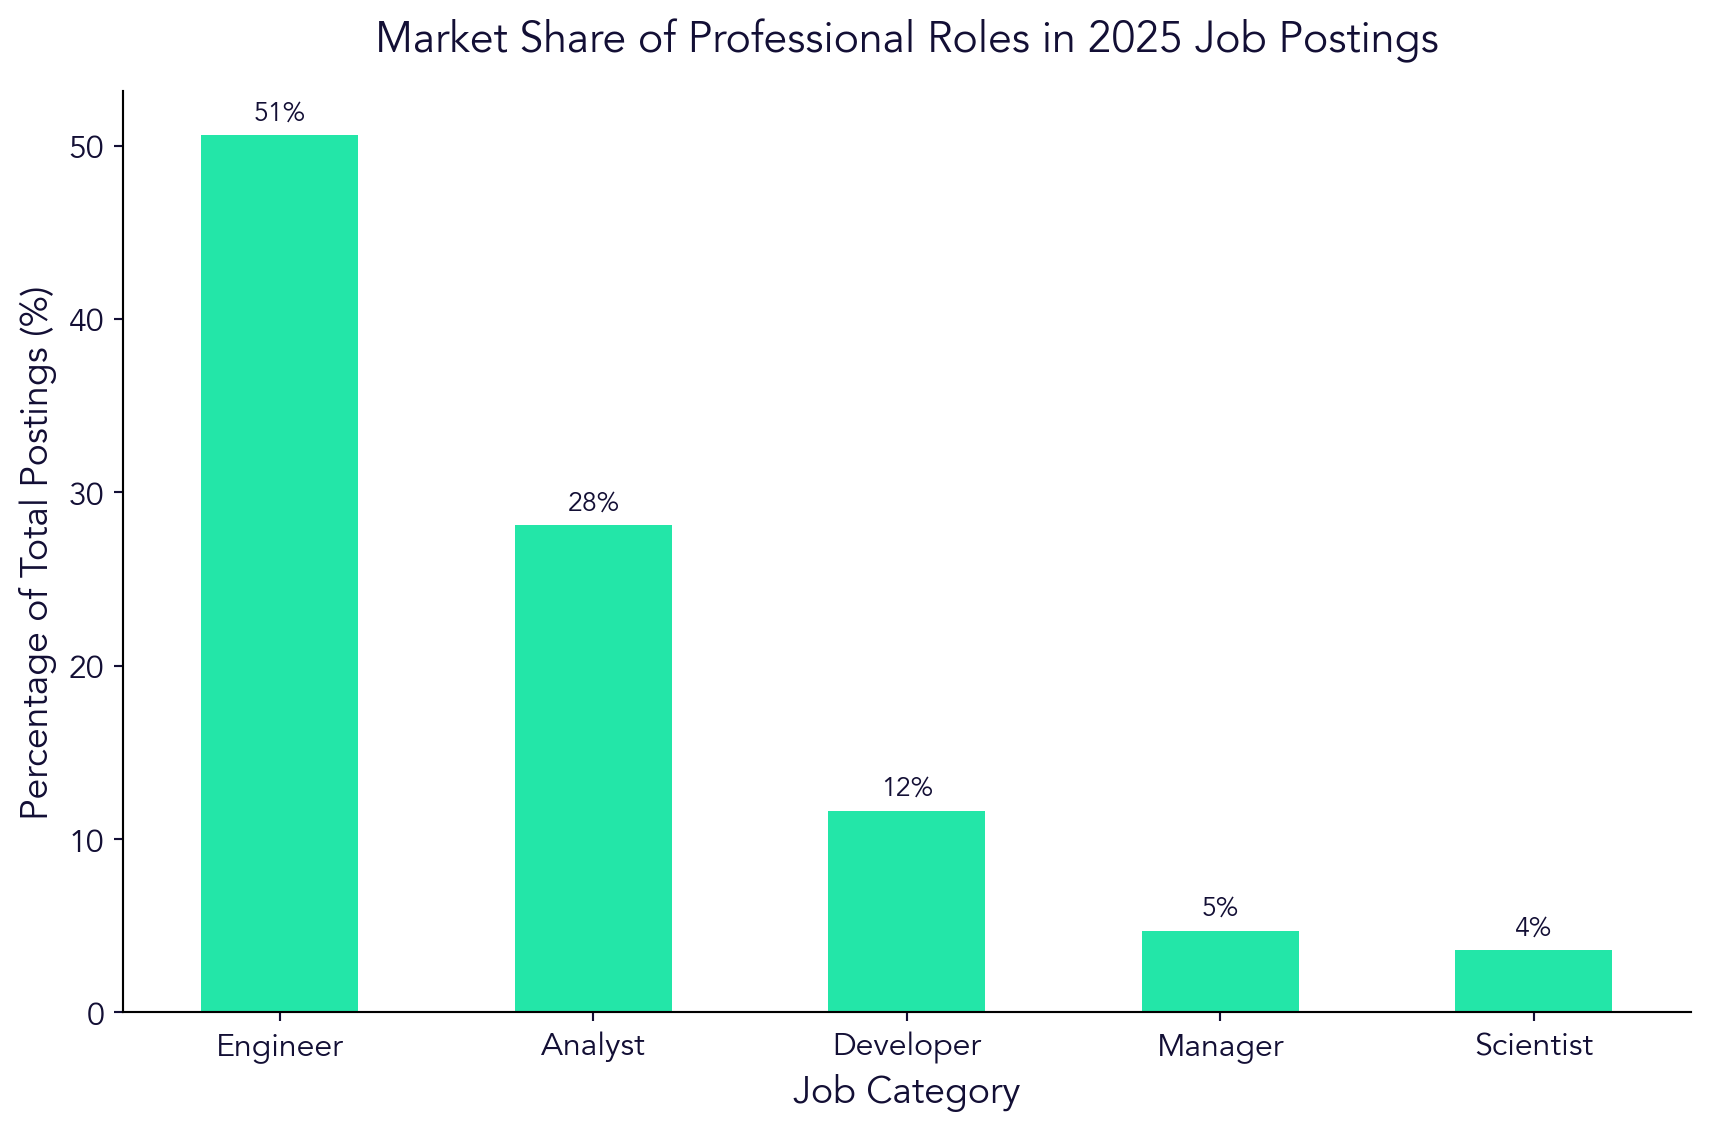

In [15]:
# | label: fig-job-titles
# | fig-cap: "Distribution of job titles in 2025 in job postings."

role_counts = df[jobs_cols].sum()
total_postings = len(df)
role_percentages = (role_counts / total_postings) * 100
role_percentages = role_percentages.sort_values(ascending=False)
role_percentages.index = [col.title() for col in role_percentages.index]

ax = role_percentages.plot(kind="bar", color=oxy_teal, figsize=(9, 6))

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f%%", padding=3)

ax.set_title("Market Share of Professional Roles in 2025 Job Postings")
ax.set_ylabel("Percentage of Total Postings (%)")
ax.set_xlabel("Job Category")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Distribution of Company Names

In this section, we examine the leading organizations driving the demand for technical talent in the United States. While the tech landscape is vast and diverse, a small group of industry giants and specialized platforms accounts for a significant portion of total hiring activity.

From @fig-dist-companies, we can observe that Job via Dice maintains a commanding presence, representing 5% of the entire tech job market in the USA. This high volume highlights the platform's role as a primary aggregator for technical specialized roles.

When analyzing the "Big Tech" sector specifically, Amazon, Microsoft, Google, and Apple all appear within the top 20 hiring entities. This data suggests that while these tech behemoths are influential, the market remains highly fragmented, with a significant amount of hiring distributed across thousands of mid-sized firms and diverse industry sectors.

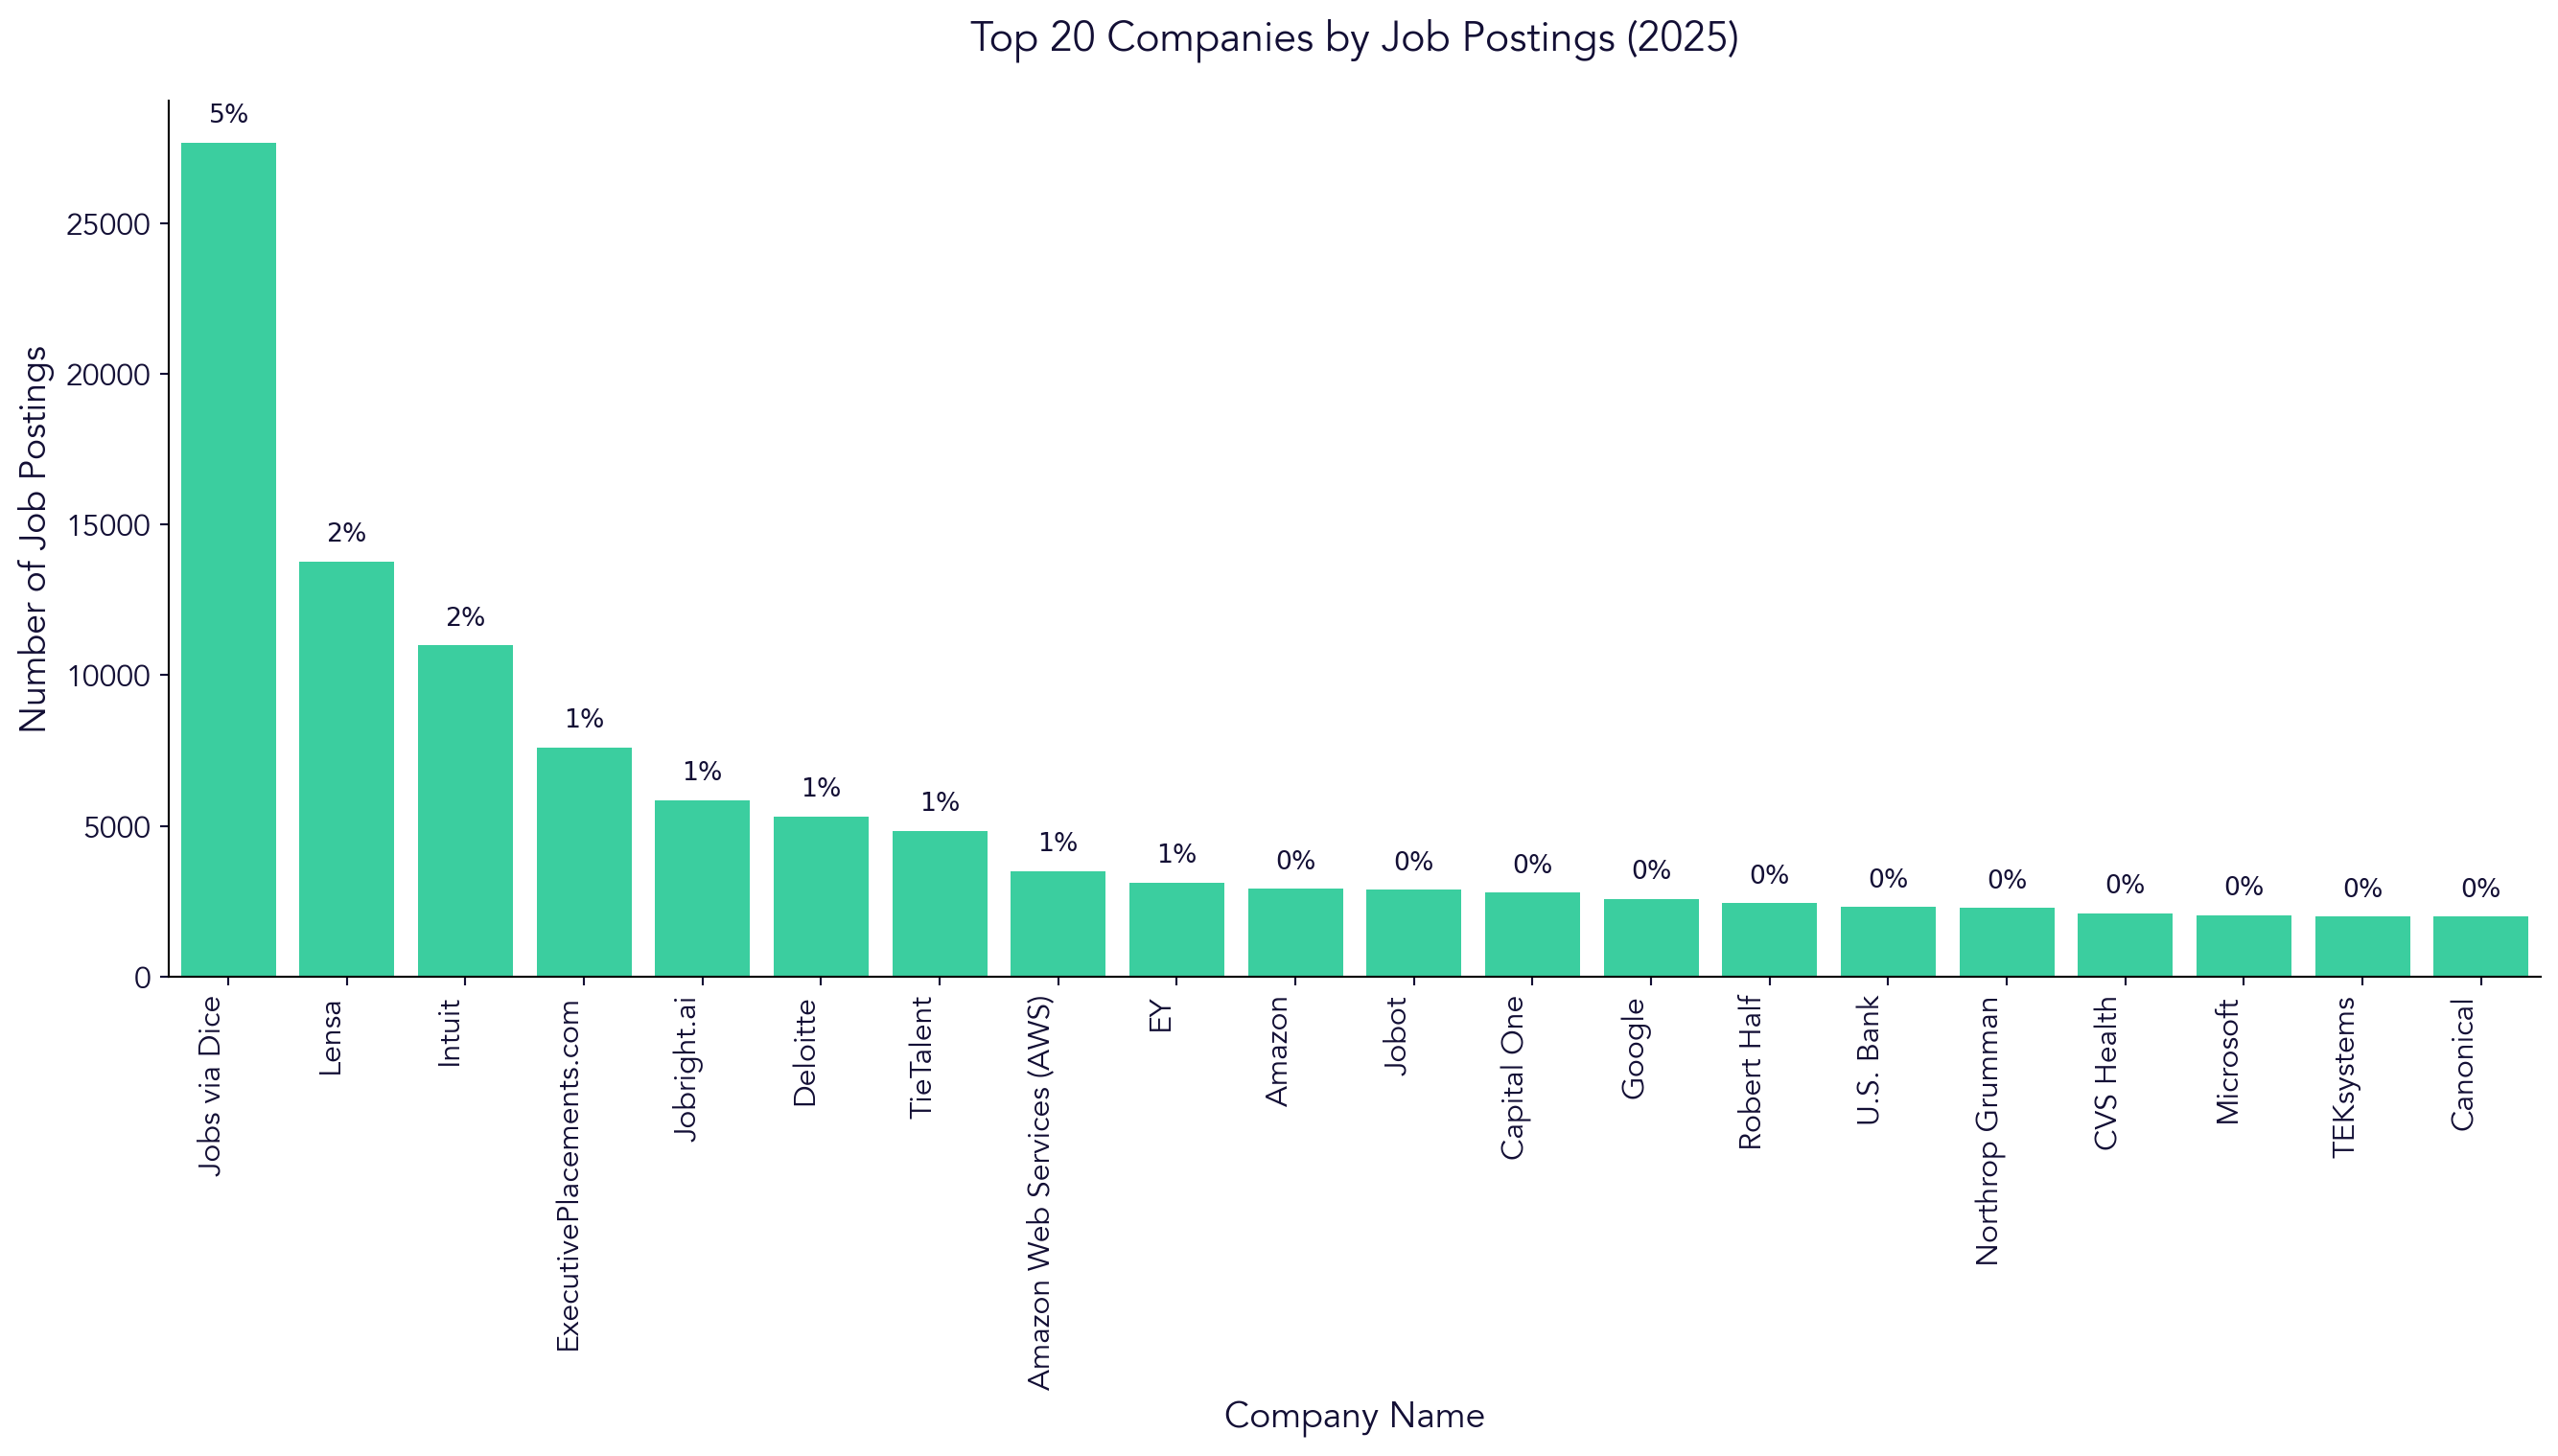

In [16]:
# | label: fig-dist-companies
# | fig-cap: "Barplot of the most mentioned companies in 2025 in job postings."
# | out-width: 90%

total_jobs = len(df)

top_companies = df["company_name"].value_counts().nlargest(20).index
subset = df[df["company_name"].isin(top_companies)]

plt.figure(figsize=(14, 8))
ax = sns.countplot(data=subset, x="company_name", order=top_companies, color=oxy_teal)

for p in ax.patches:
    count = int(p.get_height())
    percentage = (100 * count) / total_jobs
    label = f"${percentage:.0f}\\%$"

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.title("Top 20 Companies by Job Postings (2025)", pad=20)
plt.xlabel("Company Name")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=90, ha="right")

plt.tight_layout()
plt.show()

### Distribution of Industries

In this section, we analyze the distribution of technology-related roles across various economic sectors. Understanding where demand originates provides critical context for the current hiring landscape and identifies the primary drivers of technical growth.

Based on the data visualized in @fig-dist-broad-industries, the Tech, Data & Telecom industry remains the dominant force, accounting for 38% of analyzed professional requirements. This sector continues to outpace all others, reinforcing its role as the primary engine for tech employment.

Outside of the core technology sector, the demand is significantly more distributed. Professional, Legal & Business Services follow with a 15% market share, while Manufacturing, Industrial & Defense represents 9% of the postings. The Finance, Insurance & Real Estate (FinTech) sector accounts for 10%, highlighting a stable need for technical expertise in modernizing financial infrastructure. Notably, all other industries each represent less than 4% of the market share (each), indicating a high concentration of tech talent within the top four sectors.

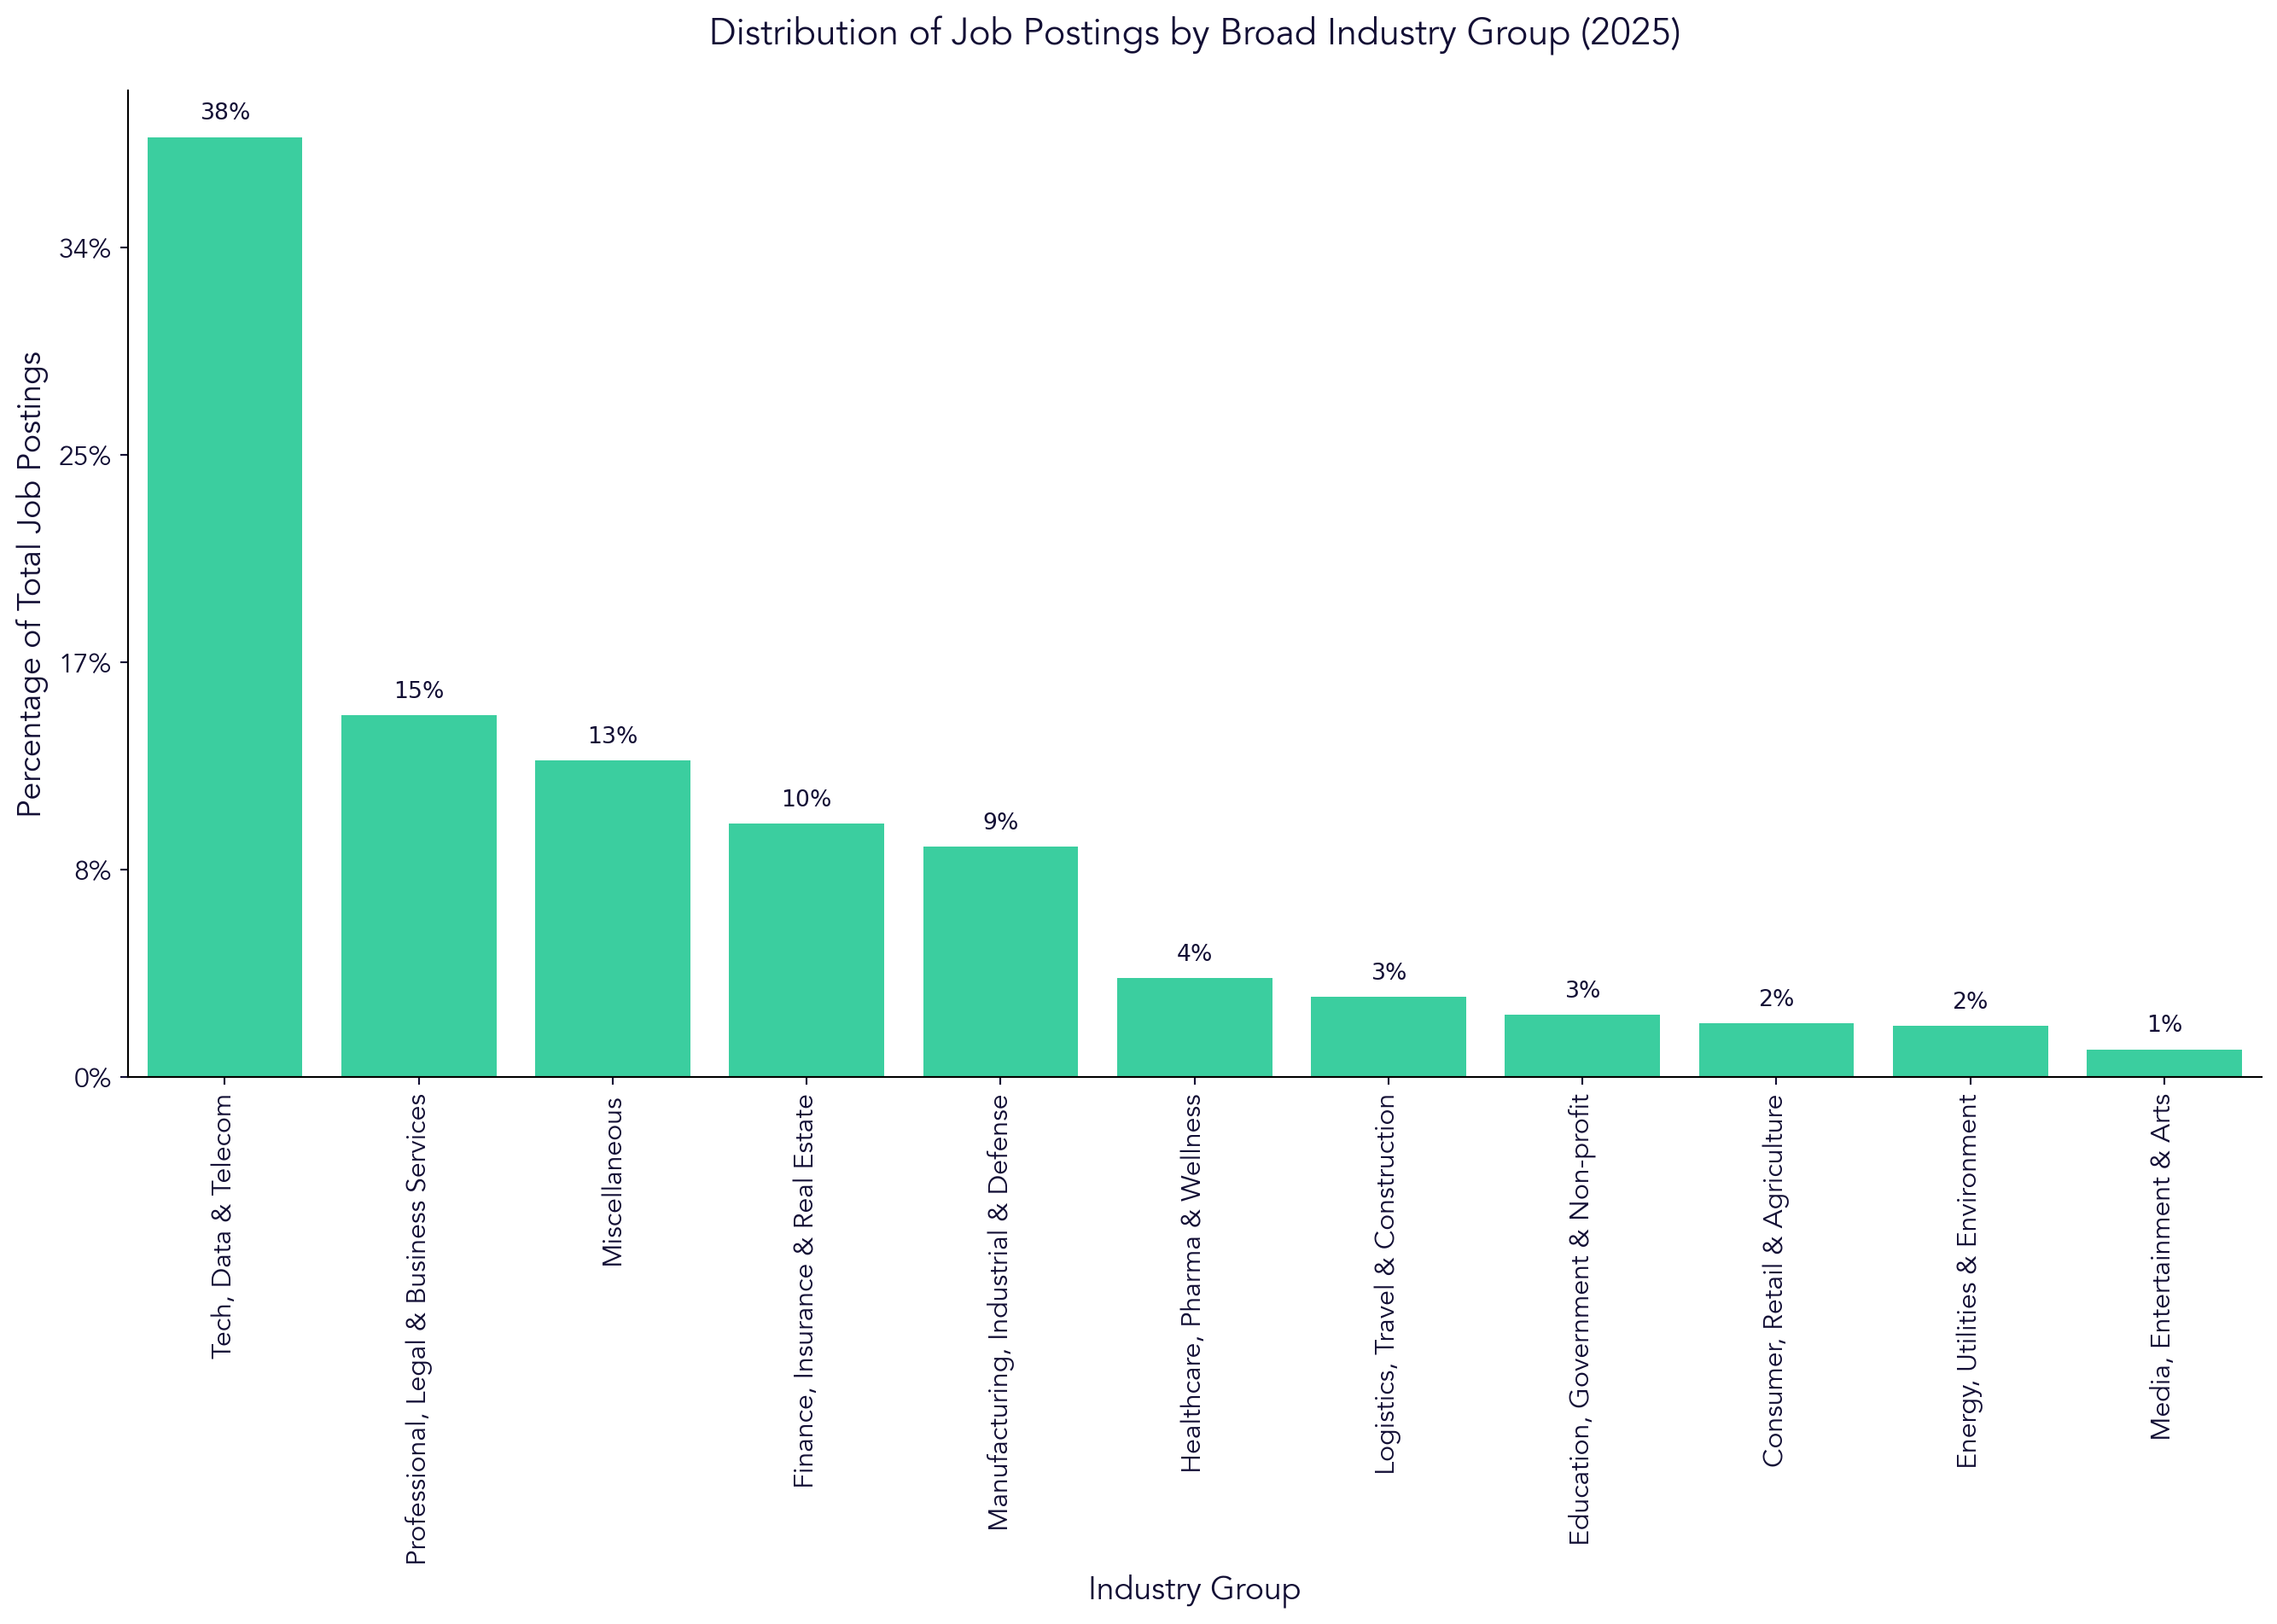

In [17]:
# | label: fig-dist-broad-industries
# | fig-cap: "Barplot of the most mentioned broad industries in 2025 in job postings."
# | out-width: 90%

top_industries = df["broad_industry_group"].value_counts().nlargest(15).index
subset = df[df["broad_industry_group"].isin(top_industries)]

plt.figure(figsize=(14, 10))
ax = sns.countplot(
    data=subset, x="broad_industry_group", order=top_industries, color=oxy_teal
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs

    label = f"${percentage:.0f}\\%$"

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%")
)
plt.ylabel("Percentage of Total Job Postings")
plt.title("Distribution of Job Postings by Broad Industry Group (2025)", pad=20)
plt.xlabel("Industry Group")


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Below @dist-company-industries you can see the raw  distribution of the top 20 industries that are not cleaned, just for the sake of understanding the raw data. Software development and IT industiries are absolute leaders.

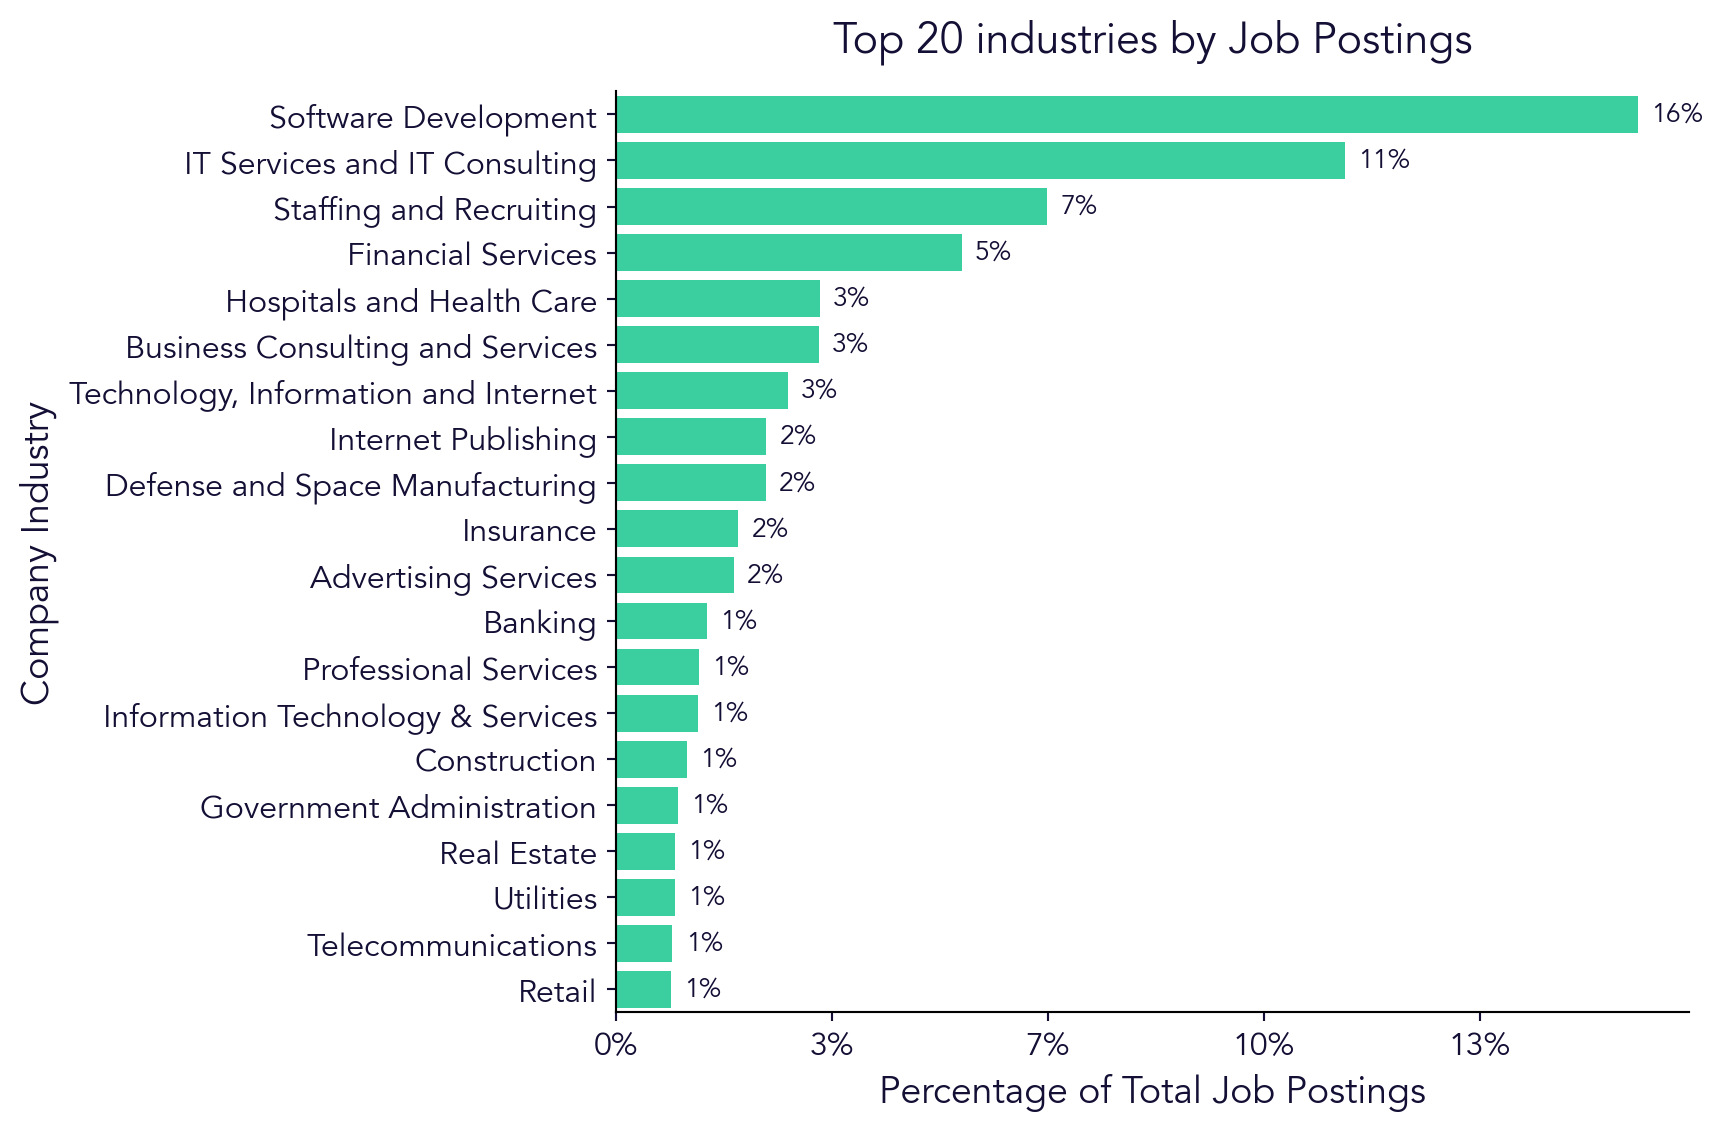

In [18]:
# | label: fig-dist-company-industries
# | fig-cap: "Barplot of the most mentioned raw company industries in 2025 in job postings."
# | width: 90%

top_industries = df["company_industry"].value_counts().nlargest(20).index
subset = df[df["company_industry"].isin(top_industries)]

plt.figure(figsize=(9, 6))
ax = sns.countplot(
    data=subset, y="company_industry", order=top_industries, color=oxy_teal
)

for p in ax.patches:
    count = int(p.get_width())
    percentage = 100 * count / total_jobs
    ax.annotate(
        f"{percentage:.0f}%",
        (p.get_width(), p.get_y() + p.get_height() / 2),
        xytext=(5, 0),
        textcoords="offset points",
        va="center"
    )

ax.xaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%")
)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xlabel("Percentage of Total Job Postings")

plt.title("Top 20 industries by Job Postings")
plt.ylabel("Company Industry")
plt.tight_layout()
plt.show()


### Distribution of States

In this section, we analyze the geographic distribution of tech talent demand across the United States. Identifying these "hiring hubs" allows us to understand the regional concentrations of the digital economy and where companies are focusing their recruitment efforts.

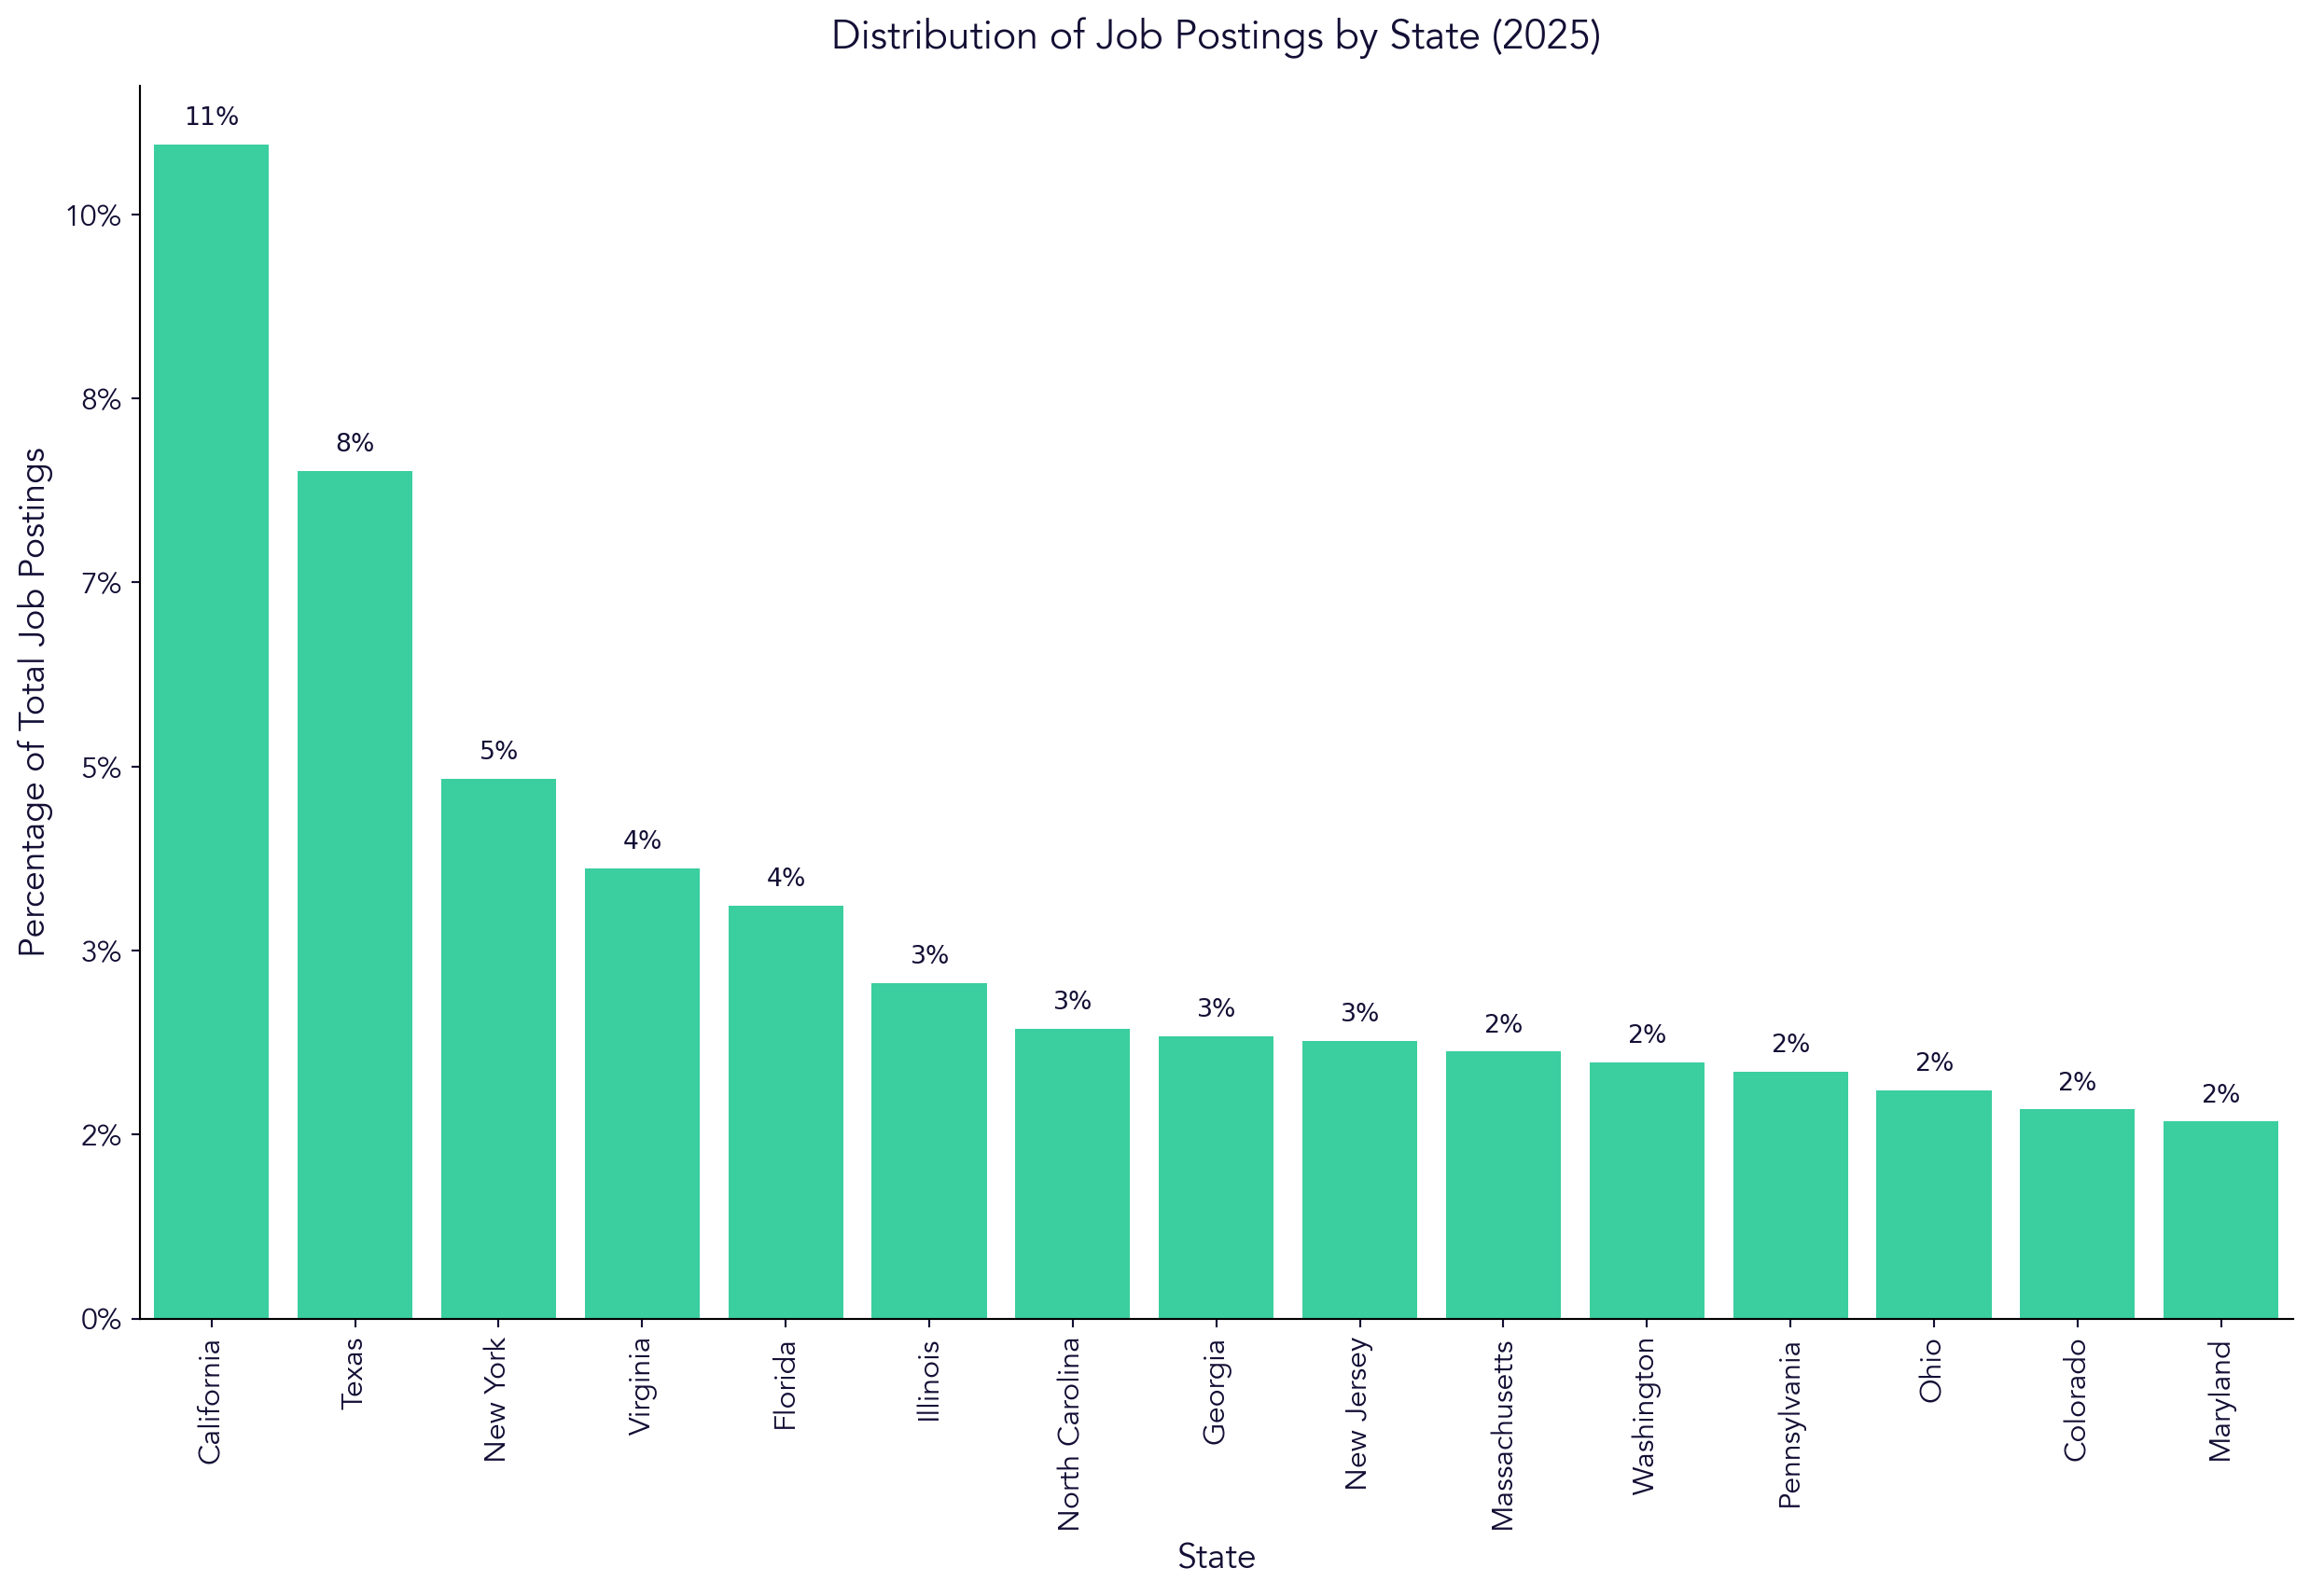

In [19]:
# | label: fig-dist-states
# | fig-cap: "Distribution of job postings by state in 2025."
# | out-width: 90%

top_states = df["state"].value_counts().nlargest(15).index
subset = df[df["state"].isin(top_states)]

plt.figure(figsize=(13, 9))
ax = sns.countplot(data=subset, x="state", order=top_states, color=oxy_teal)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs

    label = f"${percentage:.0f}\\%$"

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%")
)

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by State (2025)")
plt.xlabel("State")


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [20]:
# | label: fig-map-hiring
# | fig-cap: "Distribution of job postings by state in 2025."

state_to_code = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
}

df["state_clean"] = df["state"].str.strip().str.title()
df["state_code"] = df["state_clean"].map(state_to_code)
state_counts = df["state_code"].value_counts().reset_index()
state_counts.columns = ["state_code", "counts"]

plot_us_hiring_heatmap(state_counts, total_jobs, "us_hiring_map_by_state_tools")

::: {.content-visible unless-format="html"}

![2025 US Job Market. Regional Demand Distribution](../outputs/figures/us_hiring_map_by_state_tools.png){#fig-map-hiring width="90%"}
:::

Based on the data visualized in @fig-dist-states and @fig-map-hiring, California remains the primary driver of technical employment, accounting for 11% of analyzed job postings. Texas(8%) follows closely as the second-largest market, reinforcing its status as a significant and growing center for technology and innovation. New York has the third-largest market taking up 5% of analyzed postings. Together, these three states represent a substantial portion of the national demand. 

For a more granular view of regional trends, an interactive heatmap is available in the project files at `outputs/figures/tools/us_hiring_map.html` or html version of this report. This interactive asset allows for state-by-state comparisons and provides specific market share details for each territory.

### Distribution of Job Posting Times

In this section, we analyze the seasonal variations in hiring activity throughout 2025. Based on the data visualized in @fig-monthly-dist, the hiring landscape exhibits a distinct "double peak" pattern. The highest volume of activity occurs in August (12%) and November(13%). These surges likely correspond to the conclusion of the summer period and the finalization of year-end technical projects, respectively. 

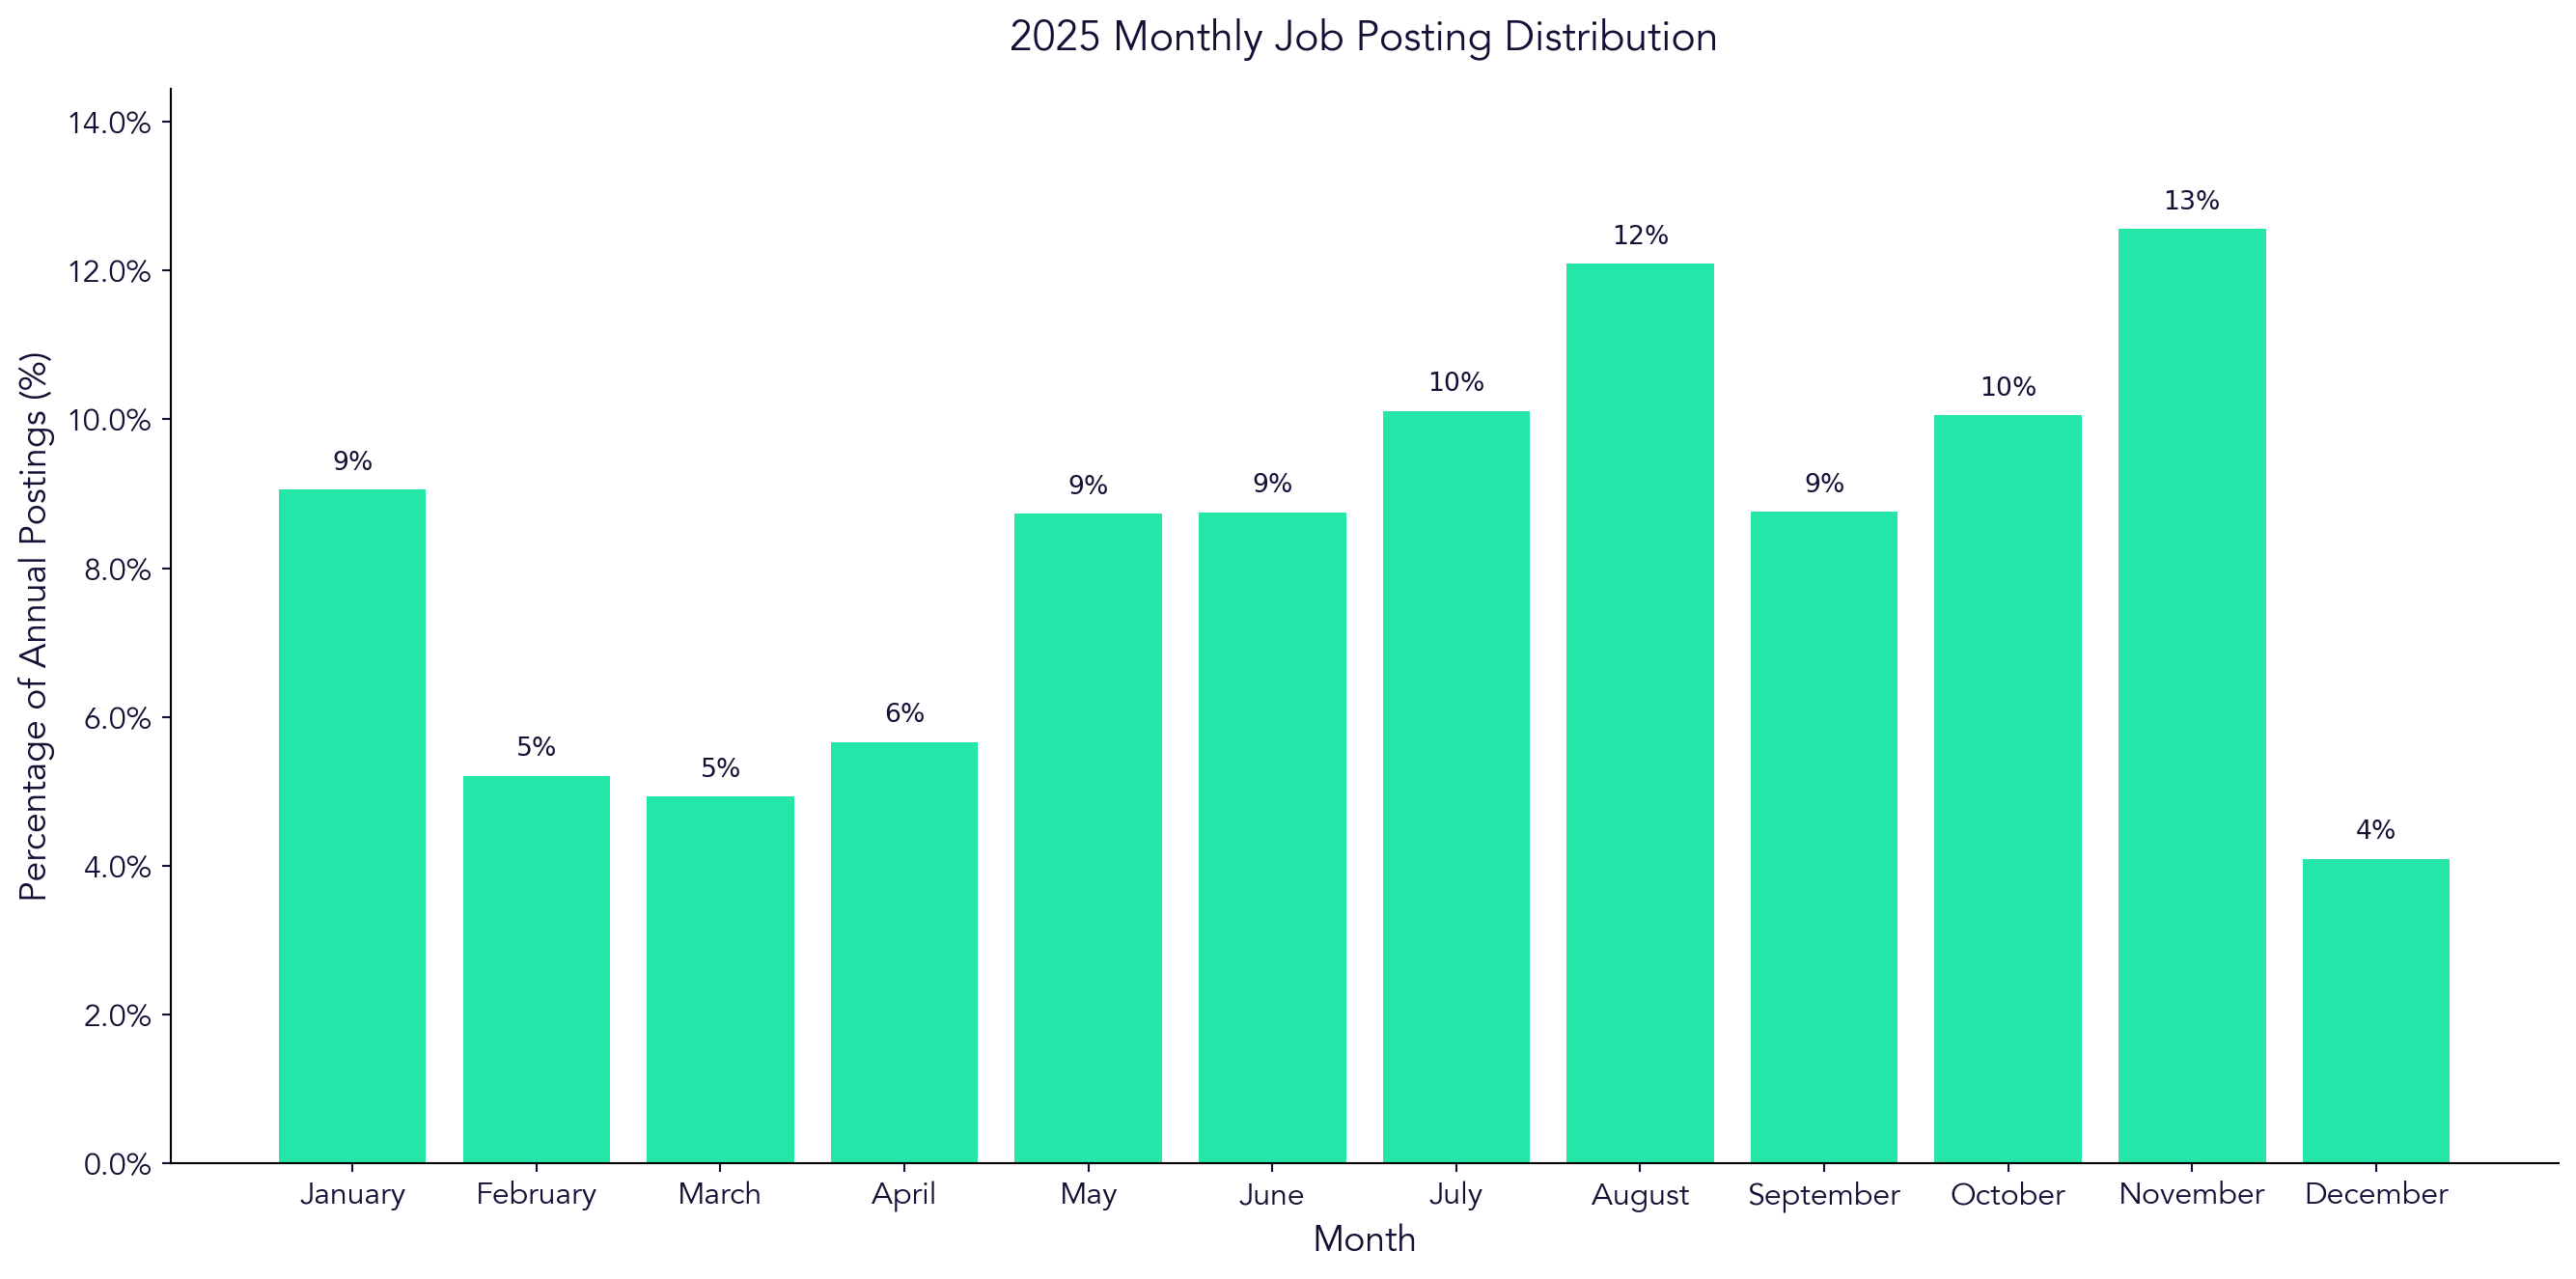

In [21]:
# | label: fig-monthly-dist
# | fig-cap: "Distribution of job postings by month in 2025."

total_postings = len(df)

monthly_counts = df["created_at"].dt.month.value_counts().sort_index()
monthly_percentages = (monthly_counts / total_postings) * 100

month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}
plot_series = pd.Series(
    monthly_percentages.values,
    index=[month_names[m] for m in monthly_percentages.index],
)

fig, ax = plt.subplots(figsize=(14, 7))

bars = ax.bar(plot_series.index, plot_series.values, color=oxy_teal)

for bar in bars:
    height = bar.get_height()
    label = f"${height:.0f}\\%$"

    ax.annotate(
        label,
        (bar.get_x() + bar.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title("2025 Monthly Job Posting Distribution")
ax.set_ylabel("Percentage of Annual Postings (%)")
ax.set_xlabel("Month")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=0)
ax.set_ylim(0, plot_series.max() * 1.15)
plt.tight_layout()


## Tool Demand by Category

After establishing the baseline, the analysis investigates how tool requirements vary across different contexts. This section explores the relationship between tools and:

- Job Titles: Which tools are synonymous with roles like "Data Analyst" or "Data Engineer."

- Tools Duos: Which tools are going together in the jobs descriptions.

- Industries: How the tech stack in "Finance" differs from "Healthcare" or "Manufacturing."

- Geography: Regional preferences for specific technologies across the United States.

### Tool Demand by Tool Category

Since the comparison of the tools is not so straight forward and saying that Excel is more popular than AWS (like in @fig-pop-tools) seems like comparing apples and banannas, the better approach is to compare the tools with other tools from their category. Thus below you can find two plots ( )

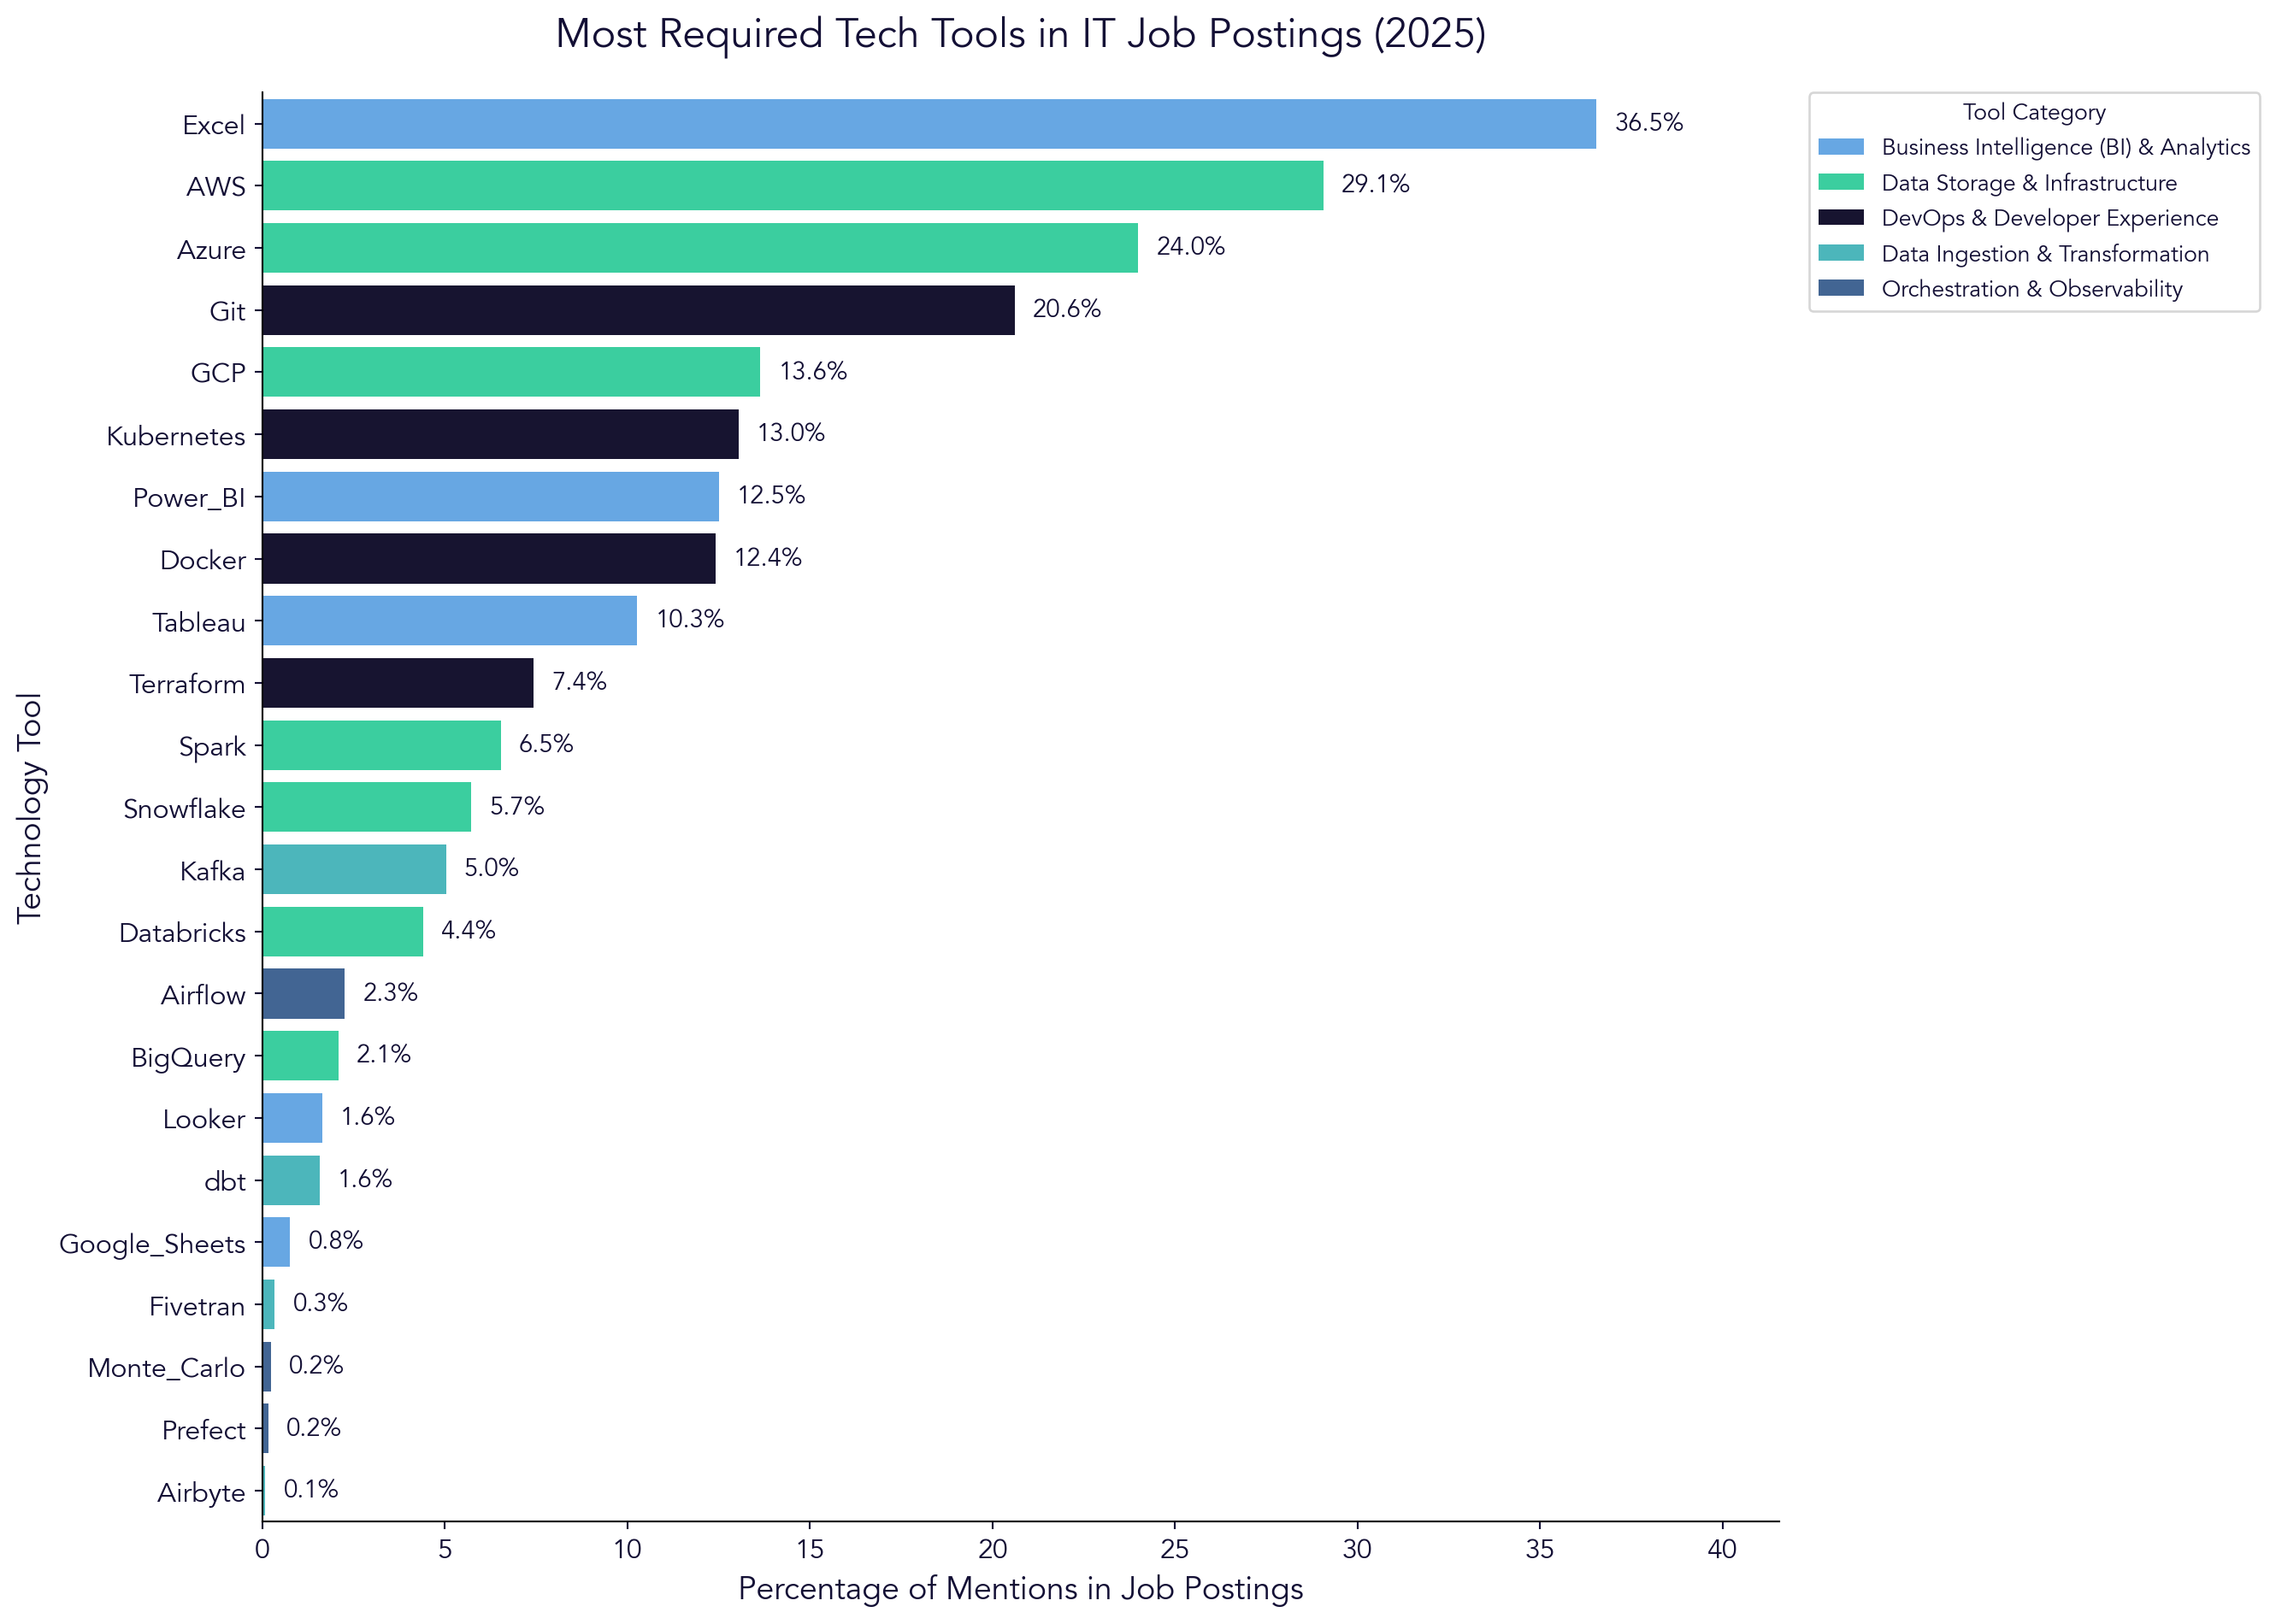

In [22]:
# | label: fig-tool-dist-cat
# | fig-cap: "Distribution of job postings by month in 2025."

plot_tool_requirements(df_count)

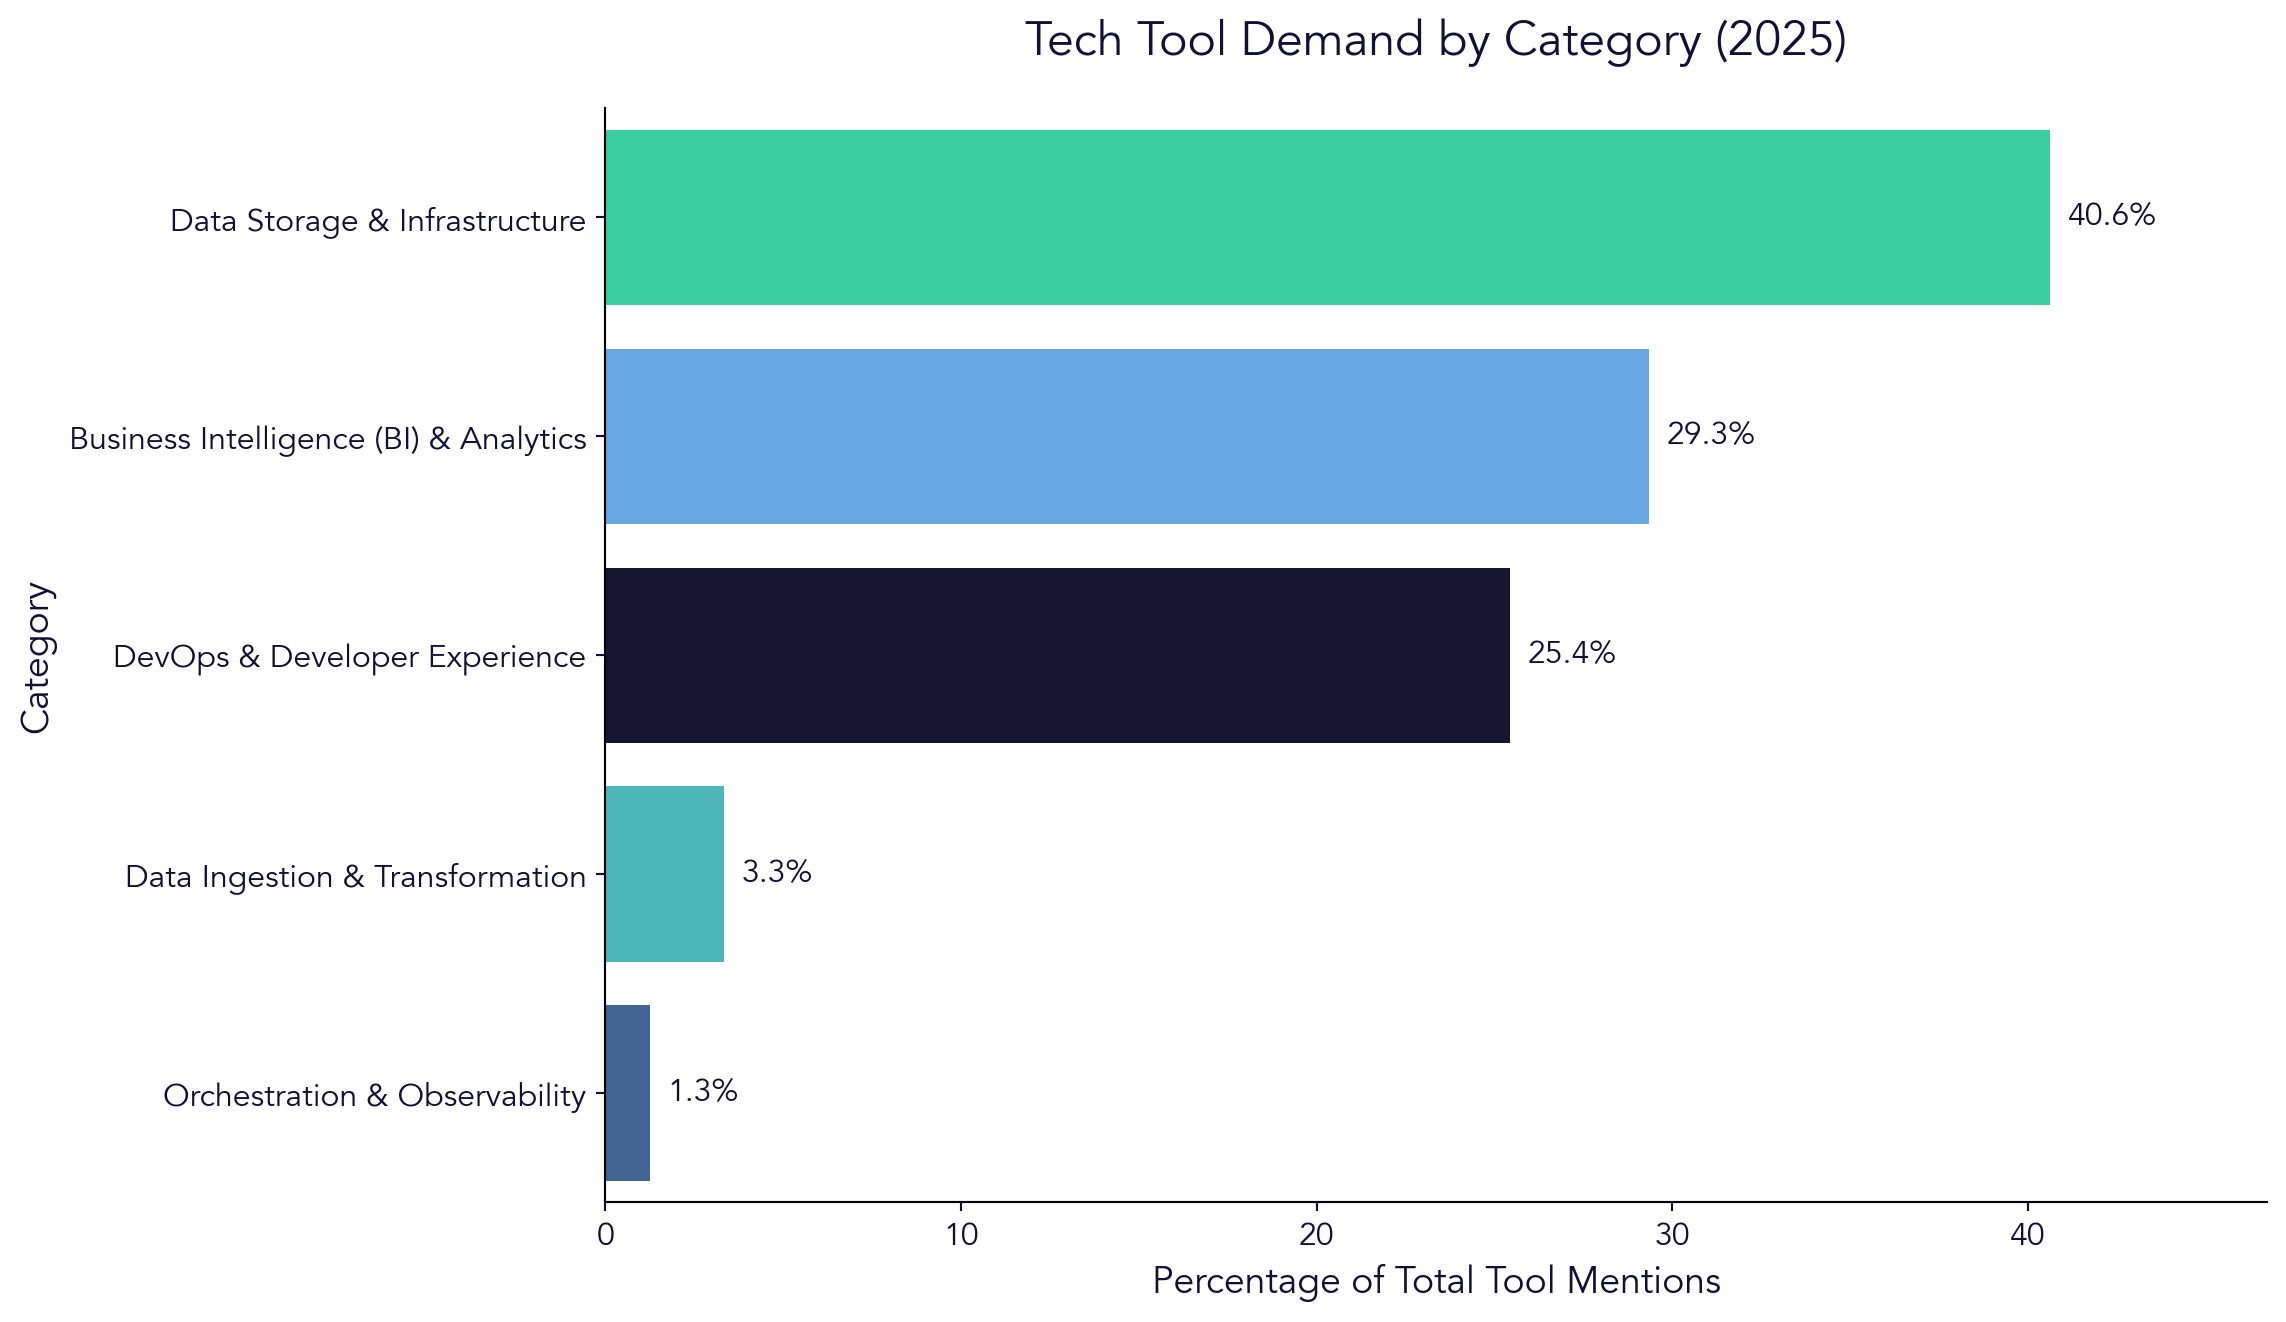

In [23]:
categories = {
    "Data Storage & Infrastructure": [
        "Snowflake", "BigQuery", "AWS", "Azure", "GCP", "Databricks", "Spark"
    ],
    "Data Ingestion & Transformation": [
        "Fivetran", "Airbyte", "dbt", "Kafka"
    ],
    "Business Intelligence (BI) & Analytics": [
        "Power_BI", "Tableau", "Looker", "Excel", "Google_Sheets"
    ],
    "Orchestration & Observability": [
        "Airflow", "Prefect", "Monte_Carlo"
    ],
    "DevOps & Developer Experience": [
        "Git", "Docker", "Kubernetes", "Terraform"
    ]
}
plot_category_requirements(df_count, categories)

### Tool Demand by Job Title

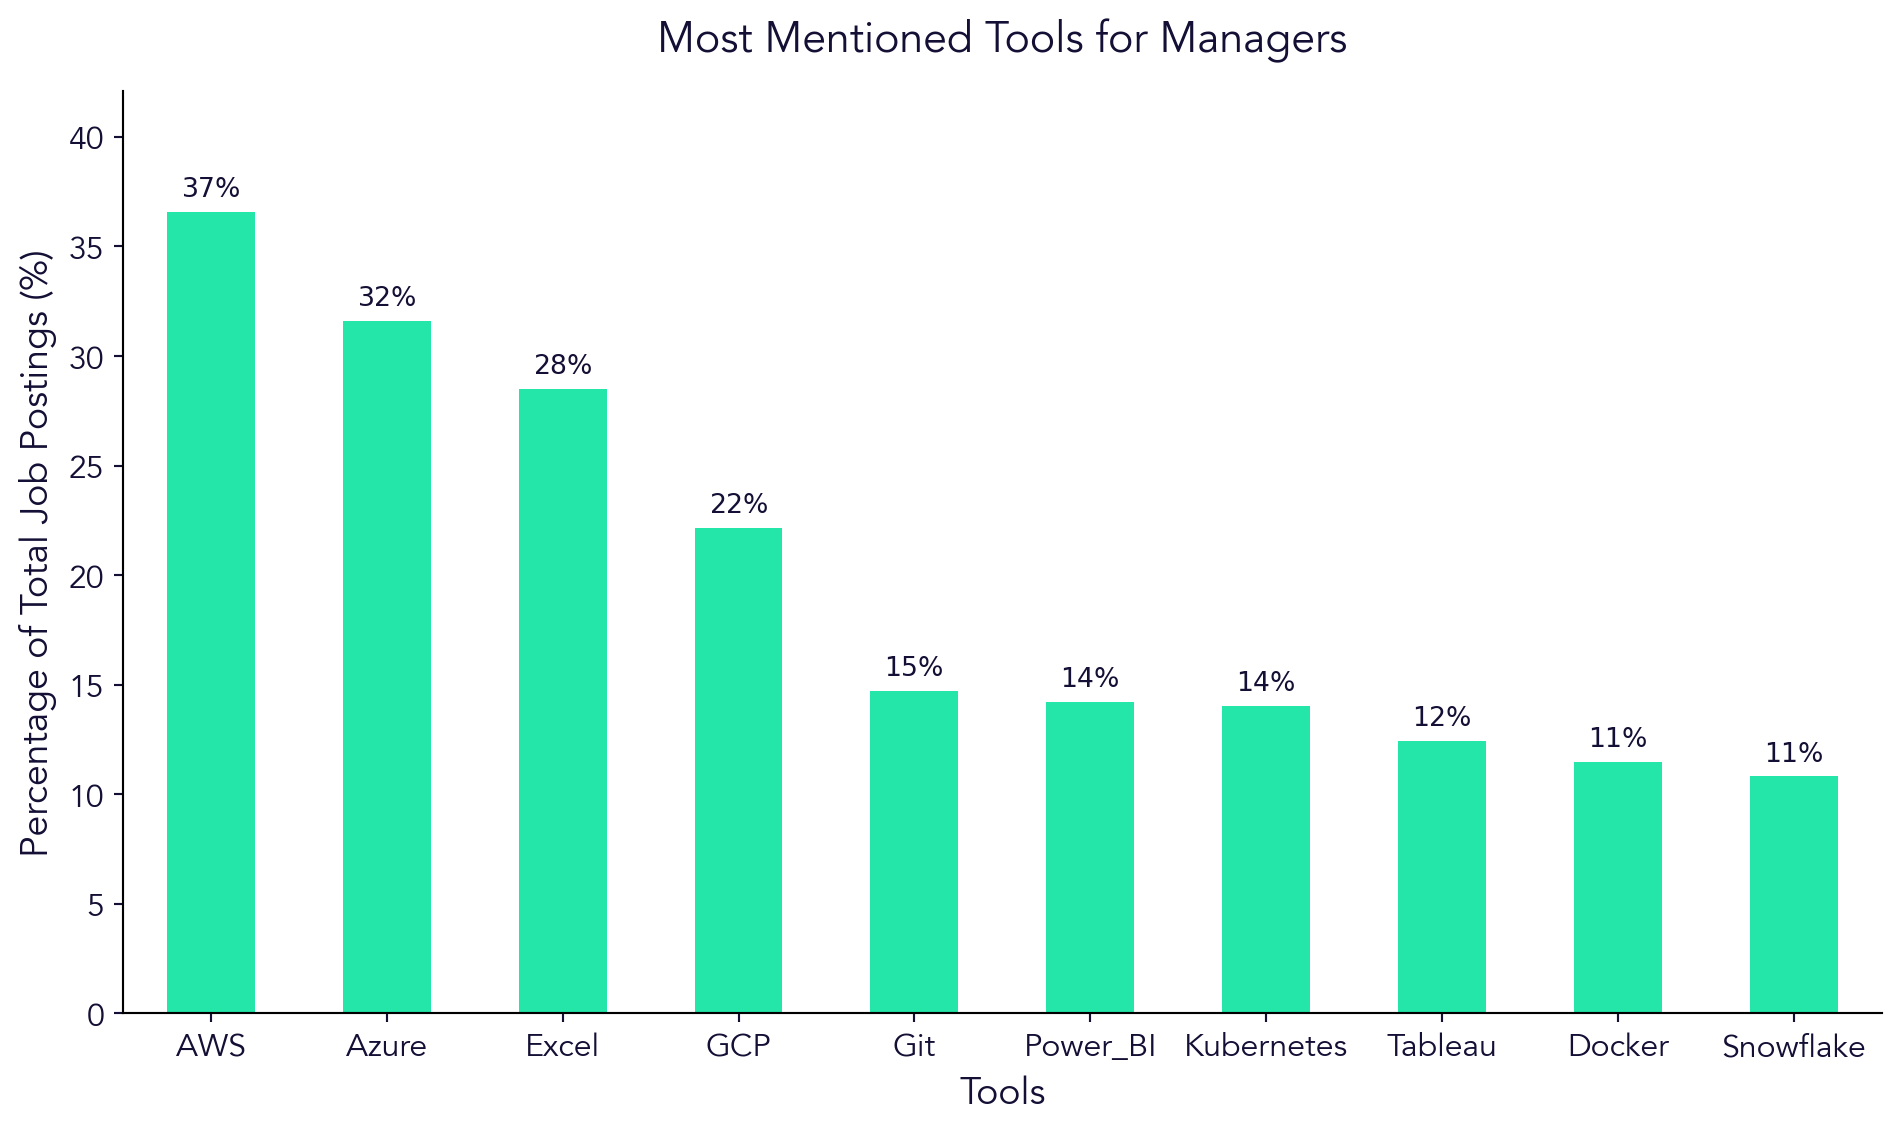

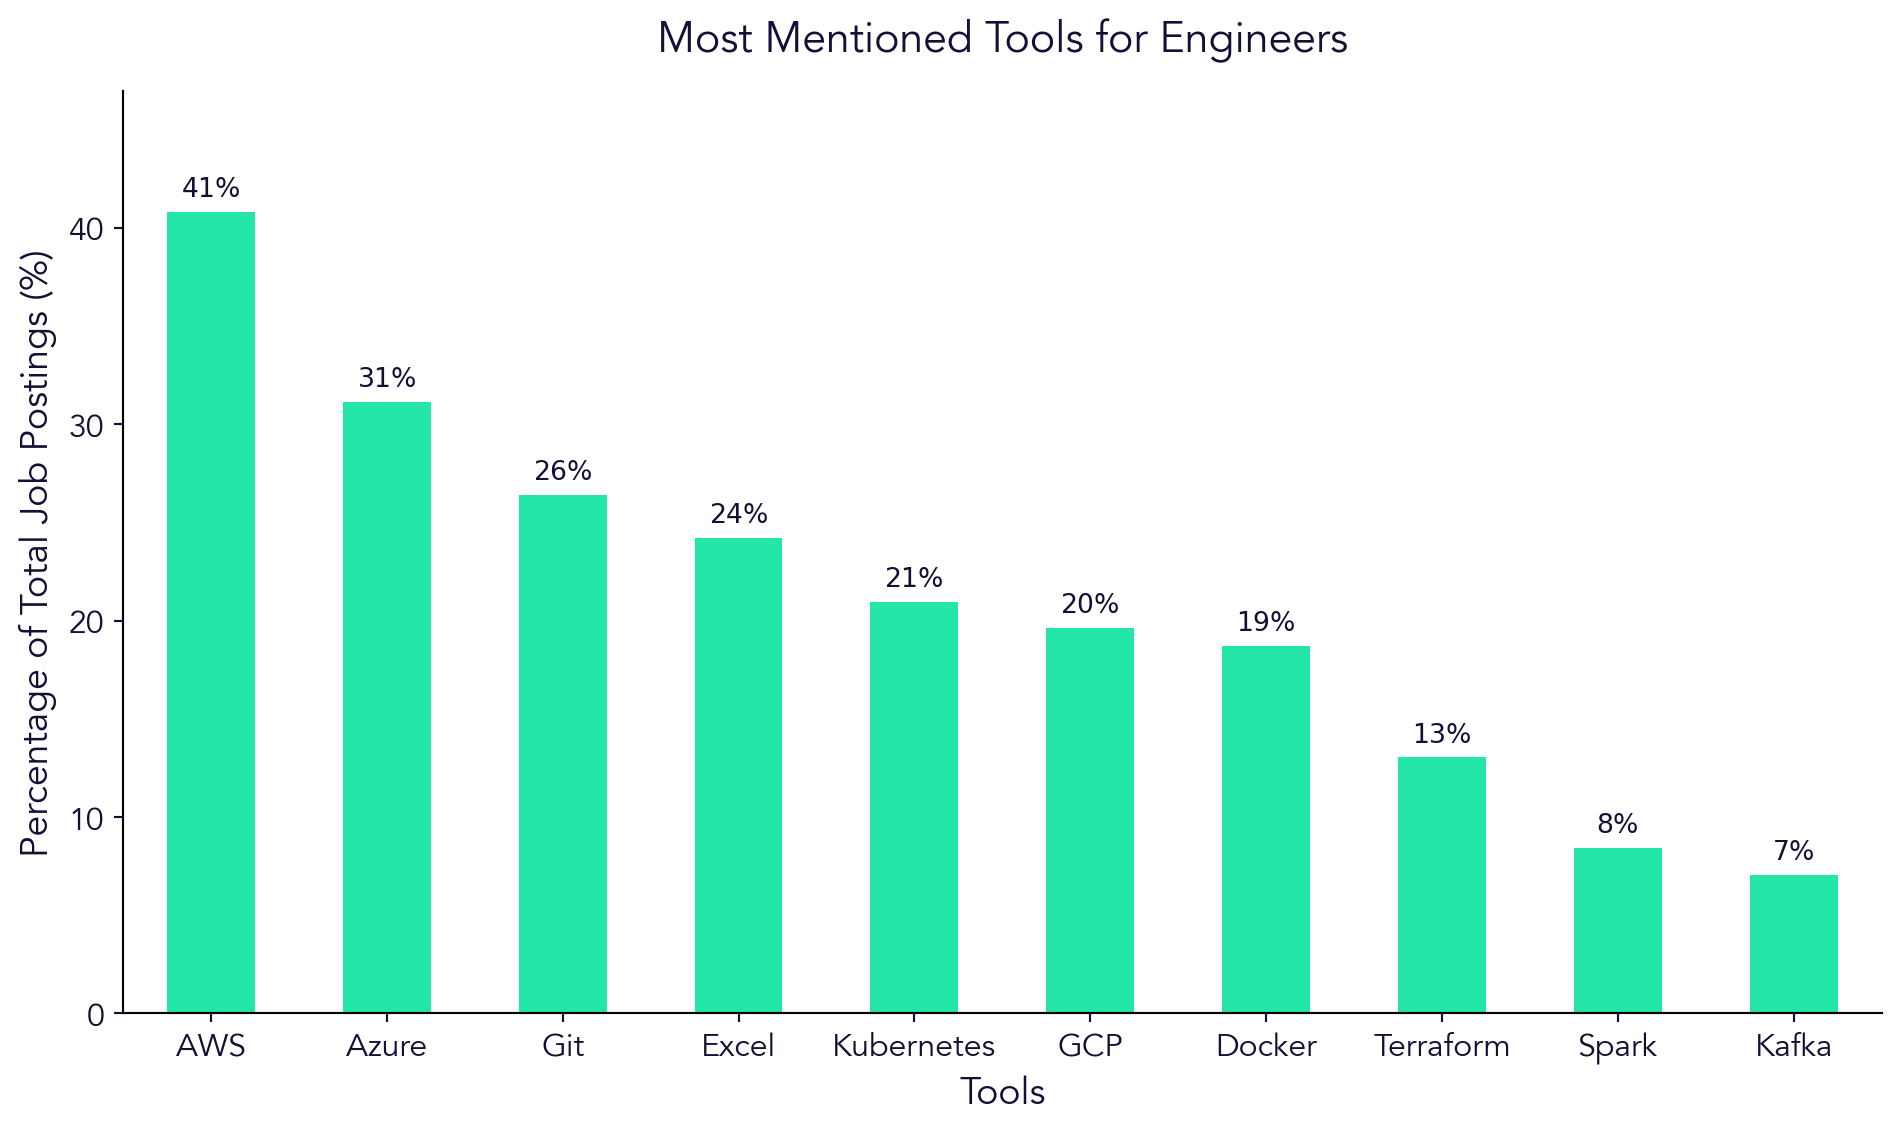

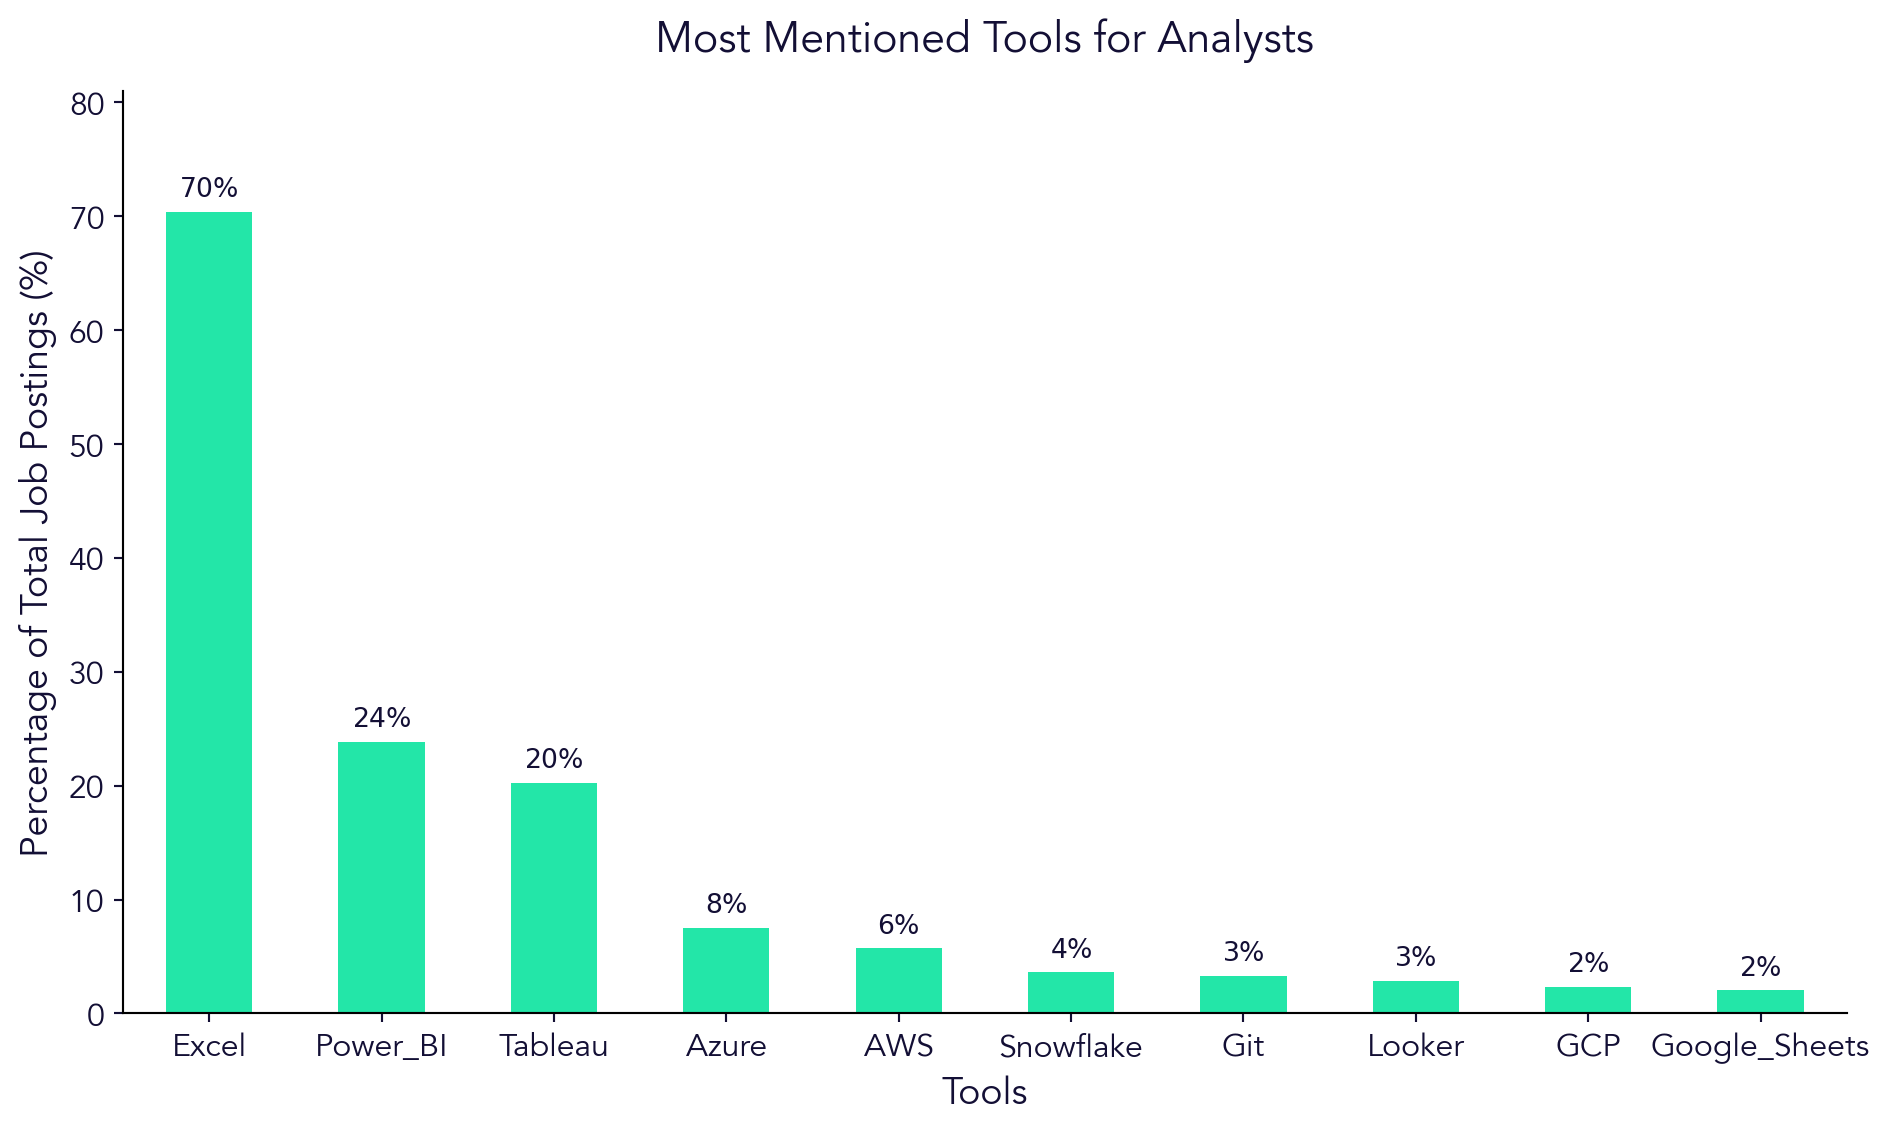

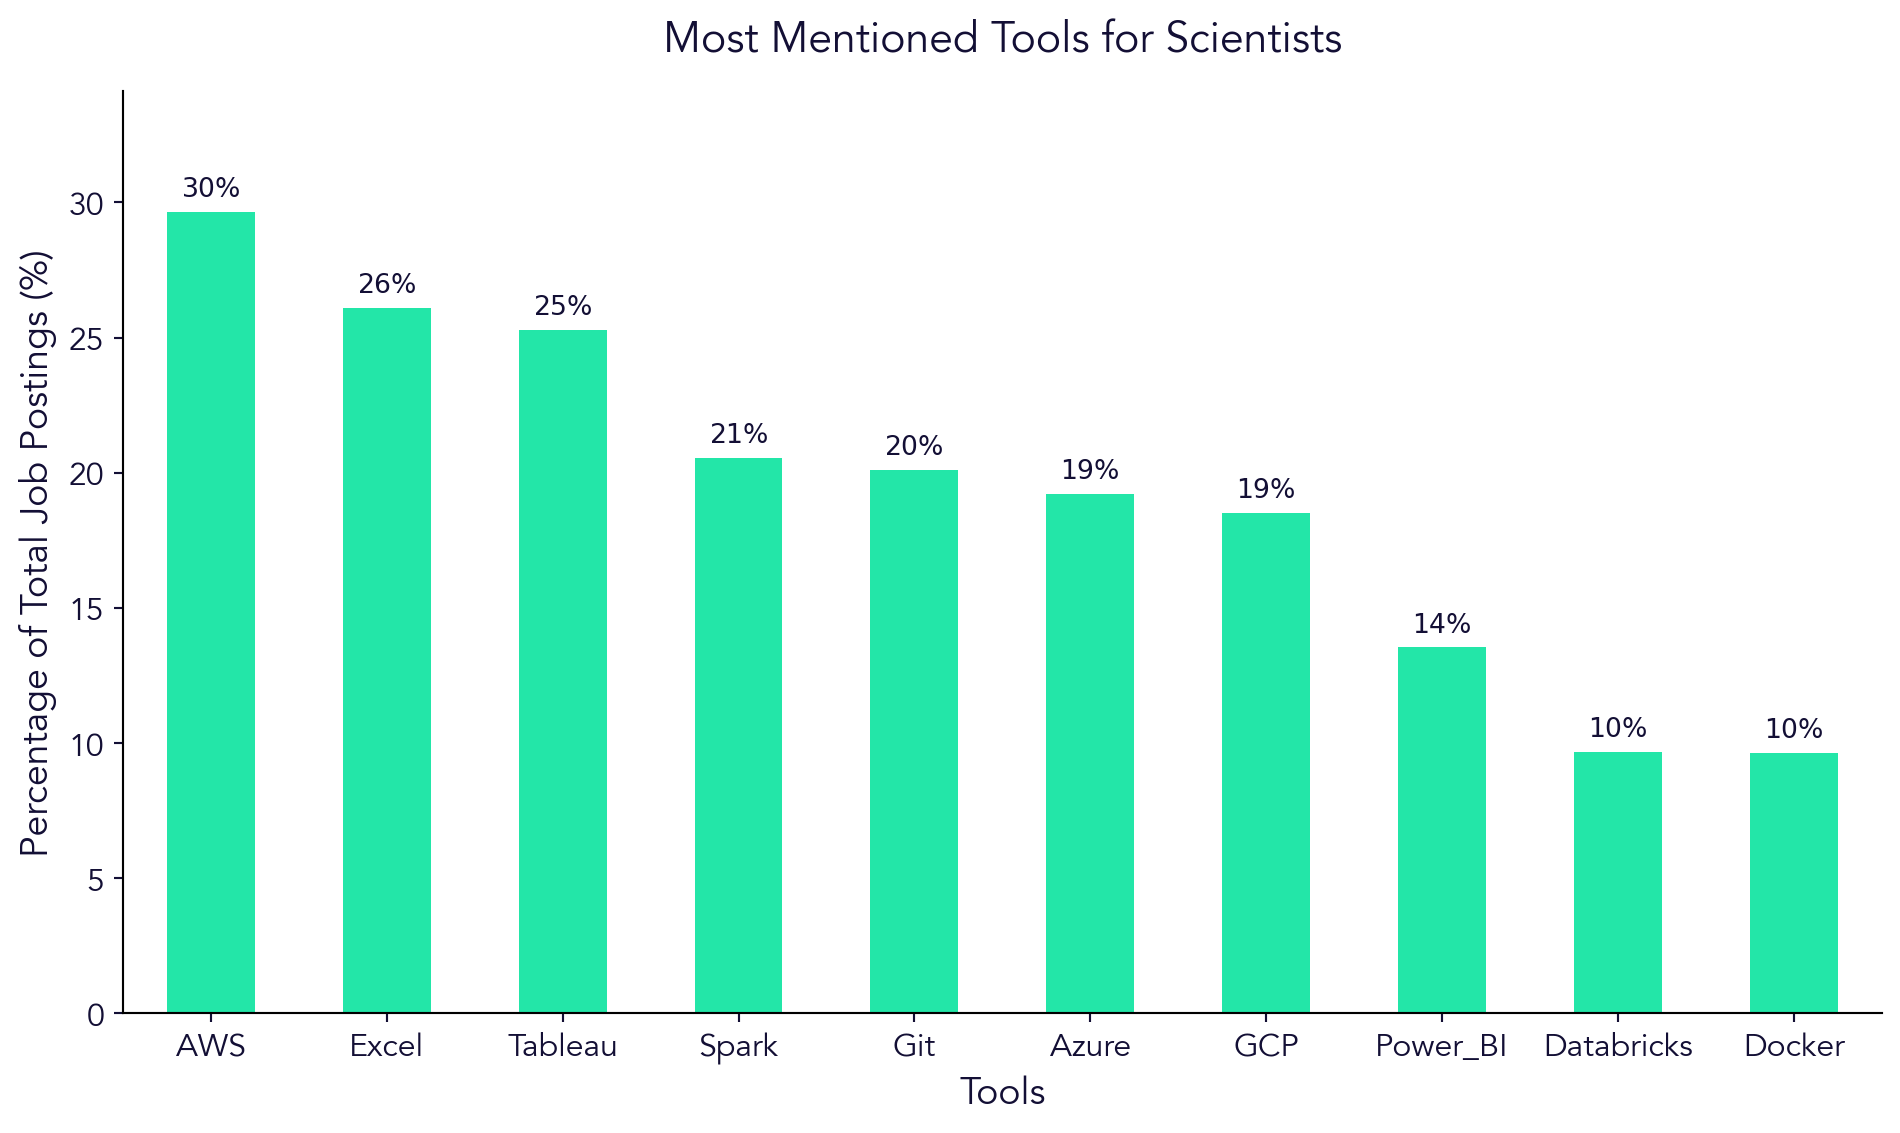

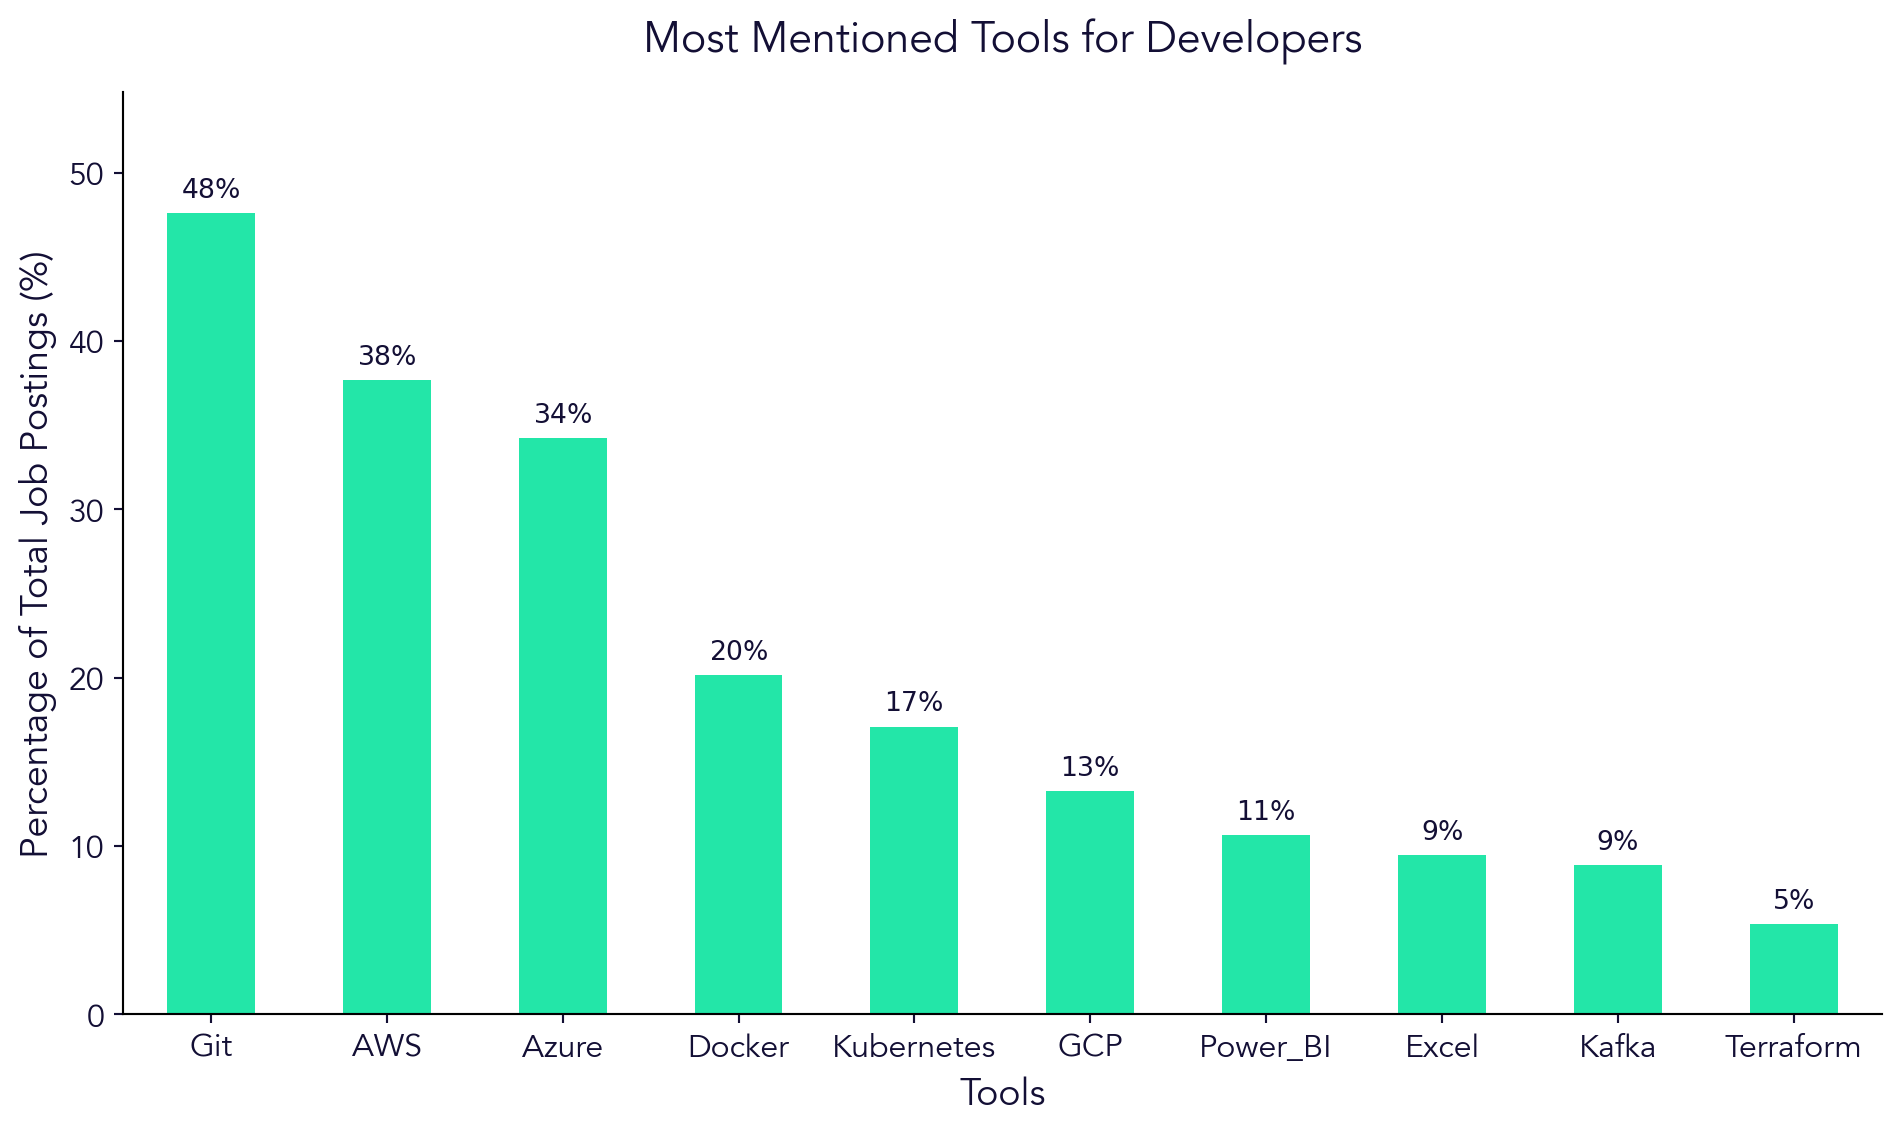

In [24]:
# | include: false
for job in jobs_cols:
    df_job = df[df[job] == 1]
    df_top_10_tools_job = (
        df_job[tech_tools].sum(axis=0).sort_values(ascending=False)[:10]
    )
    fig, ax = plot_tools_market_share(
        df_job, tech_tools, title=f"Most Mentioned Tools for {job.title()}s"
    )
    fig.savefig(f"../outputs/figures/tools/tools_for_{job}s.png", dpi=600)



In this section, I will analyze the specific technical requirements for selected roles. Understanding this data provides insight into the tools required to oversee modern technical teams and data-driven projects.

- Technical managers in 2025 are no longer just "people managers"; they are Infrastructure Strategists. The high demand for "AWS" and "Azure" indicates that managers must understand cloud unit economics and architectural trade-offs. The presence of "Kubernetes" at 14% suggests that leadership roles now require an understanding of how to scale services, while "Excel" remains the primary tool for budget tracking and capacity planning. For a more detailed breakdown of these trends, please see @fig-tools-managers.

![Programming languages demand for managers distribution](../outputs/figures/tools/tools_for_managers.png){#fig-tools-managers width="90%"}

- For engineers, the stack is heavily weighted toward Deployment and Automation. With "AWS" and "Azure" leading, followed by a strong showing from "Git" and "Kubernetes", the data indicates a "DevOps-first" engineering culture. Interestingly, "Terraform" (13%) is a critical differentiator here, showing that "Infrastructure as Code" is a core expectation for modern engineering talent. For a more detailed breakdown of these trends, please see @fig-tools-engineers.

![Programming languages demand for engineers distribution](../outputs/figures/tools/tools_for_engineers.png){#fig-tools-engineers width="90%"}

- The analyst profile remains the most specialized and concentrated. A staggering 70% requirement for "Excel" proves it is the undisputed baseline. However, the 24% for "Power_BI" versus 20% for "Tableau" confirms that Microsoft’s ecosystem dominance is successfully converting "Excel" users into "Power BI" developers. For analysts, the world is almost entirely about visualization and reporting. For a more detailed breakdown of these trends, please see @fig-tools-analysts.

![Programming languages demand for analysts distribution](../outputs/figures/tools/tools_for_analysts.png){#fig-tools-analysts width="90%"}

- Data Scientists have the most diverse toolset, bridging the gap between analytics and engineering. The high demand for "Spark" (21%) and "Databricks" (10%) indicates a focus on "Big Data" processing that Analysts typically don't touch. The nearly equal split between "Tableau" (25%) and "Power_BI" (14%) shows that Scientists still lean toward "Tableau" for complex, research-oriented visualizations. For a more detailed breakdown of these trends, please see @fig-tools-scientists.

![Programming languages demand for scientists distribution](../outputs/figures/tools/tools_for_scientists.png){#fig-tools-scientists width="90%"}

- For Developers, Code Integrity and Real-time Systems are paramount. "Git" is a requirement in nearly half of analyzed postings, the highest for any tool in this category. The mention of "Kafka" (9%) is unique to this group, indicating that developers are increasingly responsible for building the real-time data "pipelines" that the rest of the organization relies upon. For a more detailed breakdown of these trends, please see @fig-tools-developers.

![Programming languages demand for developers distribution](../outputs/figures/tools/tools_for_developers.png){#fig-tools-developers width="90%"}

### Tool Demand by Company Industry

In this section, I analyze whether specific patterns of tool usage emerge across different industries. Understanding these trends helps identify which technical ecosystems are maturing within specific sectors and where traditional tools like Excel still maintain a strong foothold.

From the data, it is evident that Excel remains the dominant tool across almost all industries. Its versatility for data entry, quick calculations, and reporting makes it a staple in sectors ranging from Finance to Healthcare. However, a distinct shift occurs within the Tech, Data & Telecom industry. In this sector, the demand for specialized infrastructure and collaboration tools surpasses traditional office software. The most frequently required tools in this group are AWS, Azure, and Git, reflecting a heavy organizational focus on cloud-native development and version-controlled environments.

This shift suggests that while "General Business" industries still rely on Excel as their primary analytical interface, the "Tech" sector has moved toward integrated cloud platforms as their foundational environment.

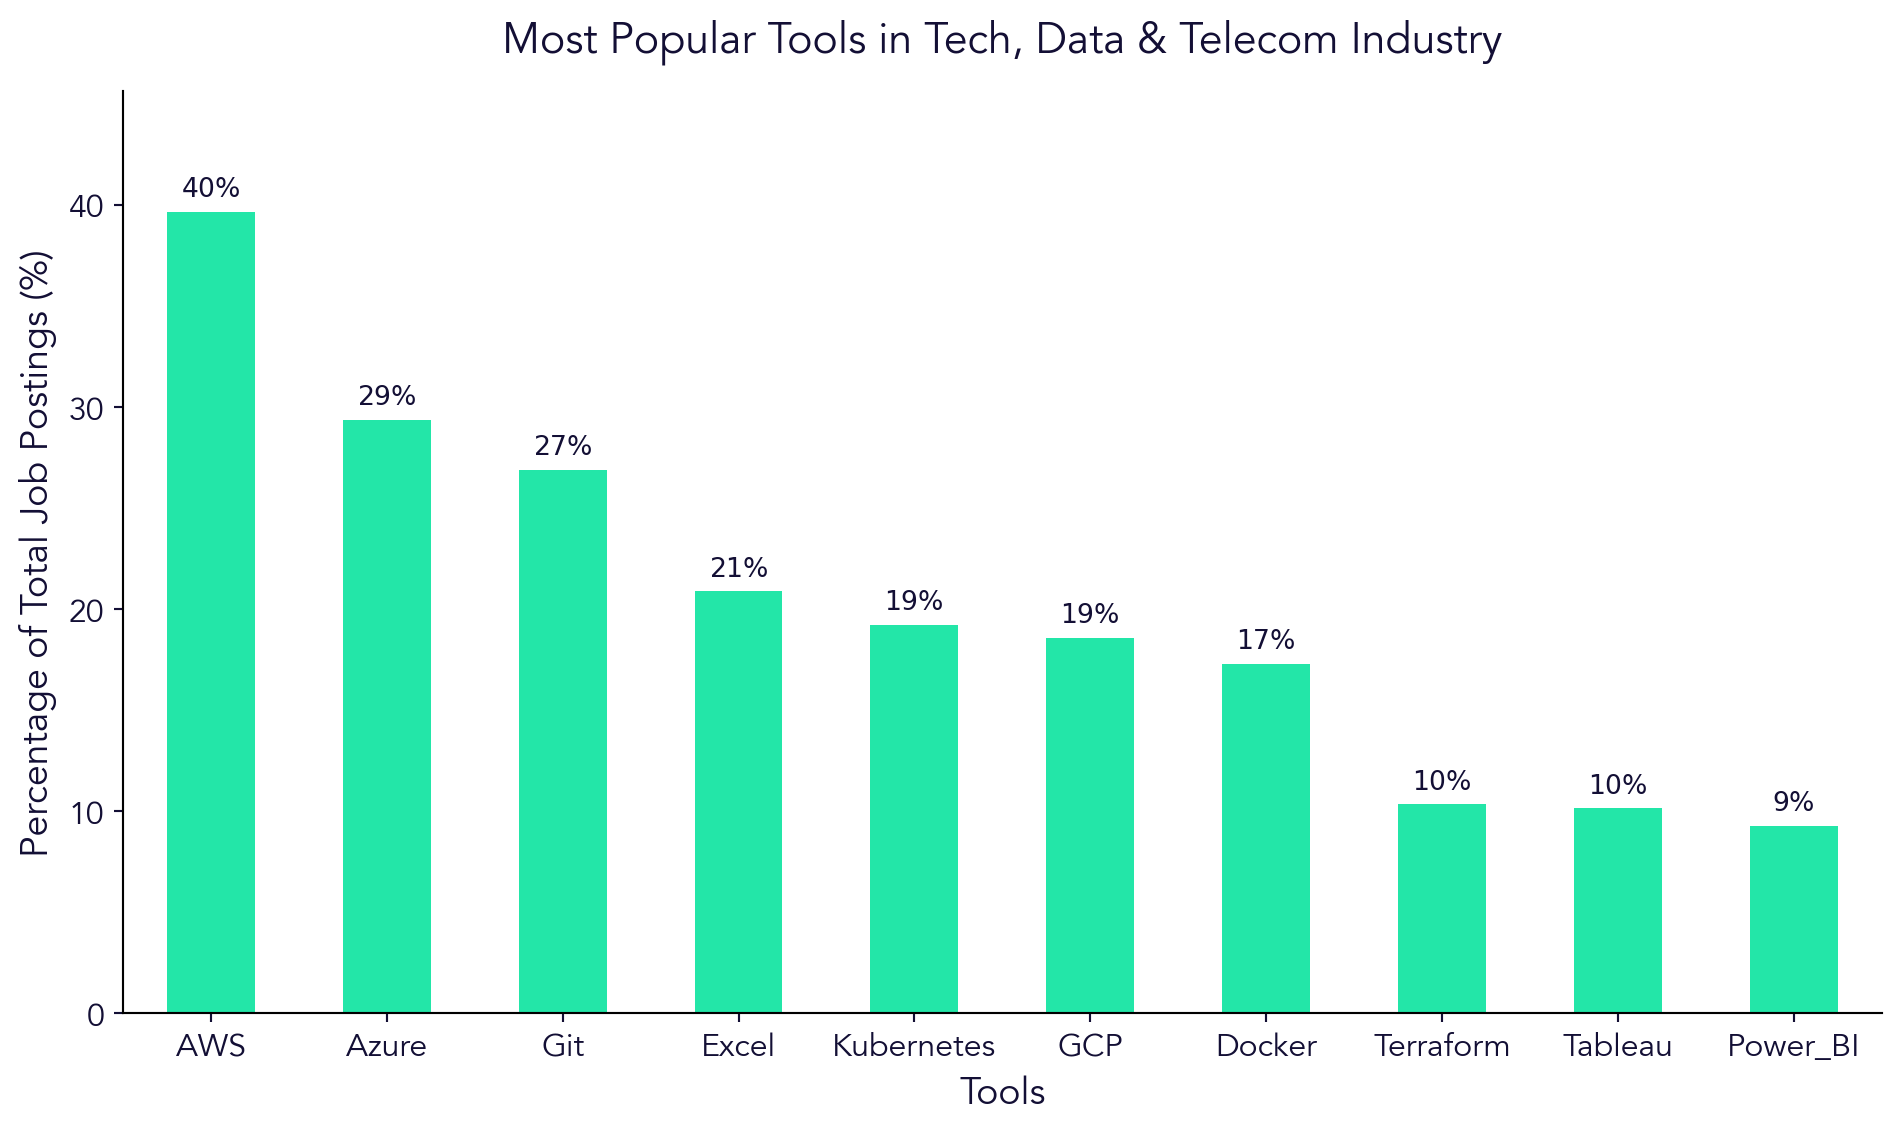

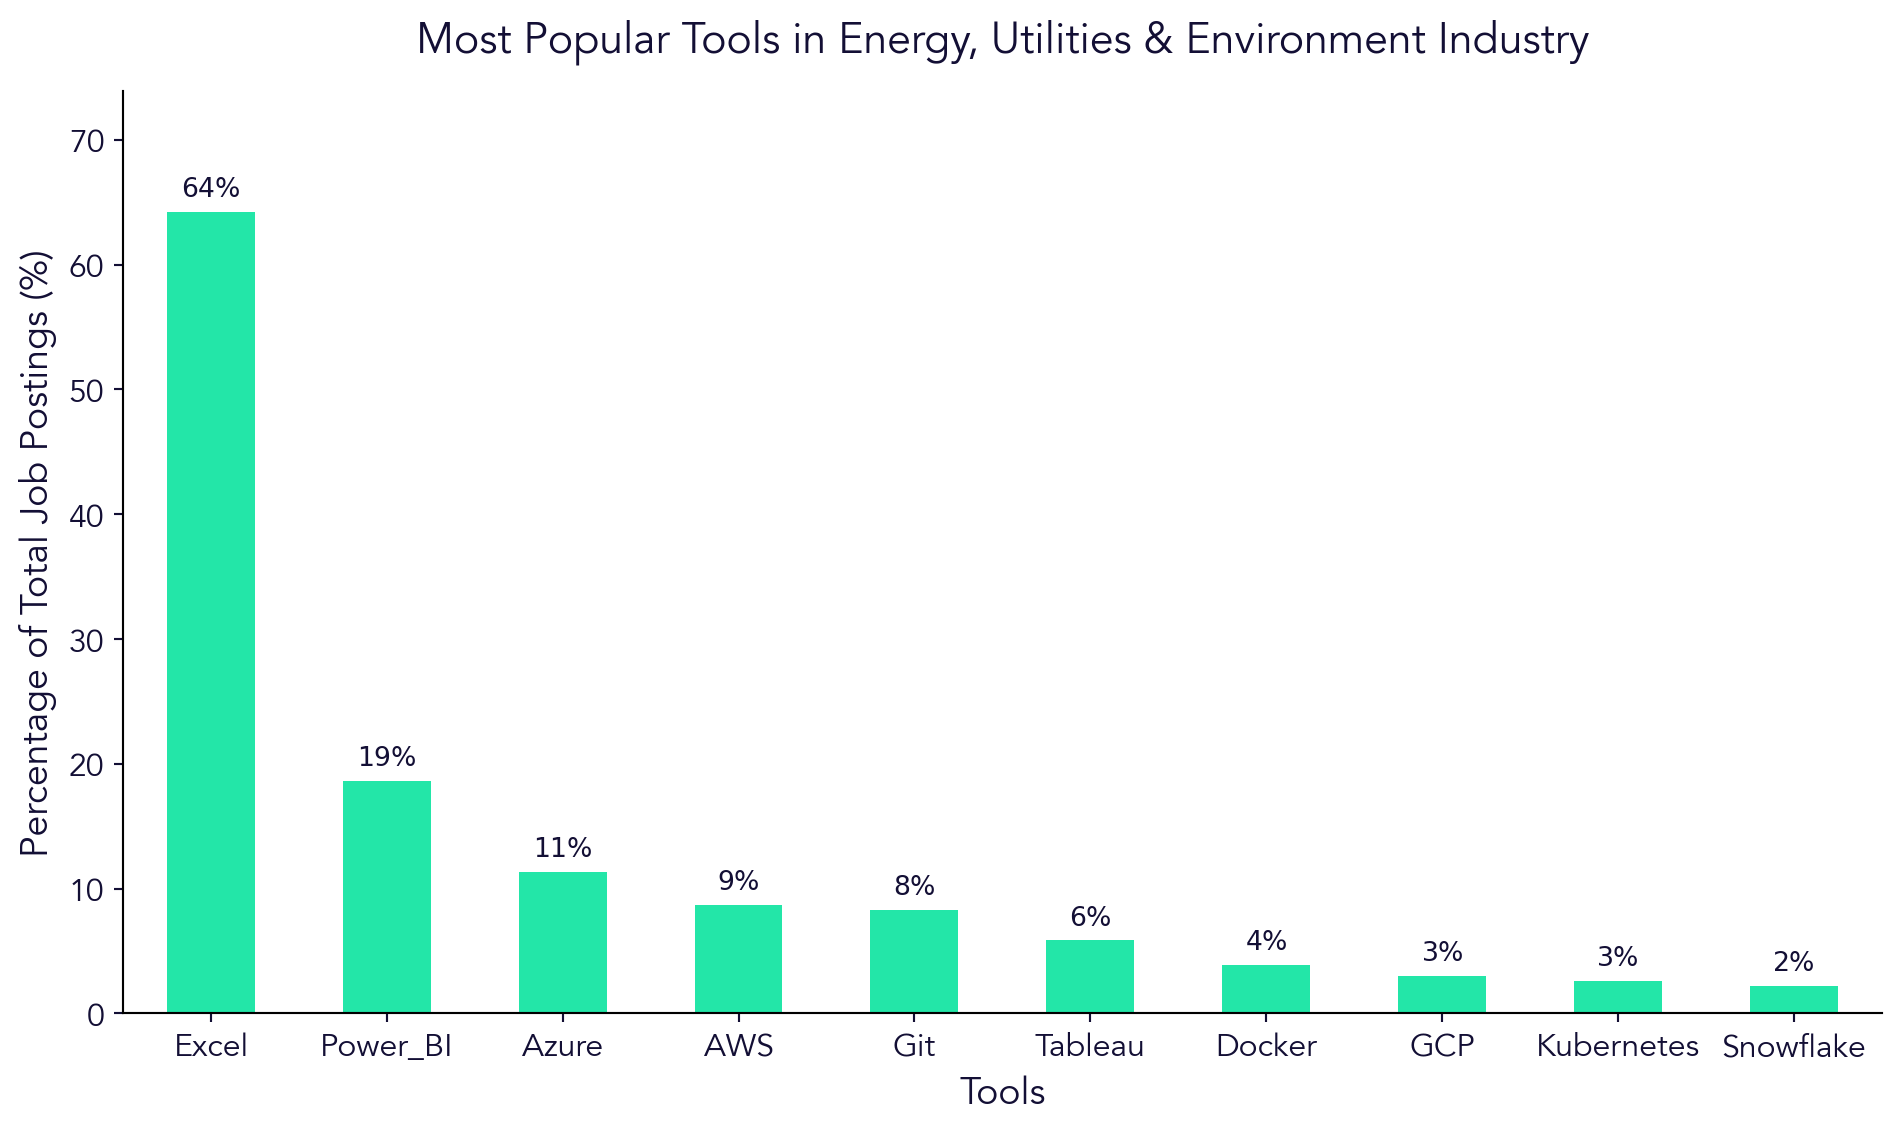

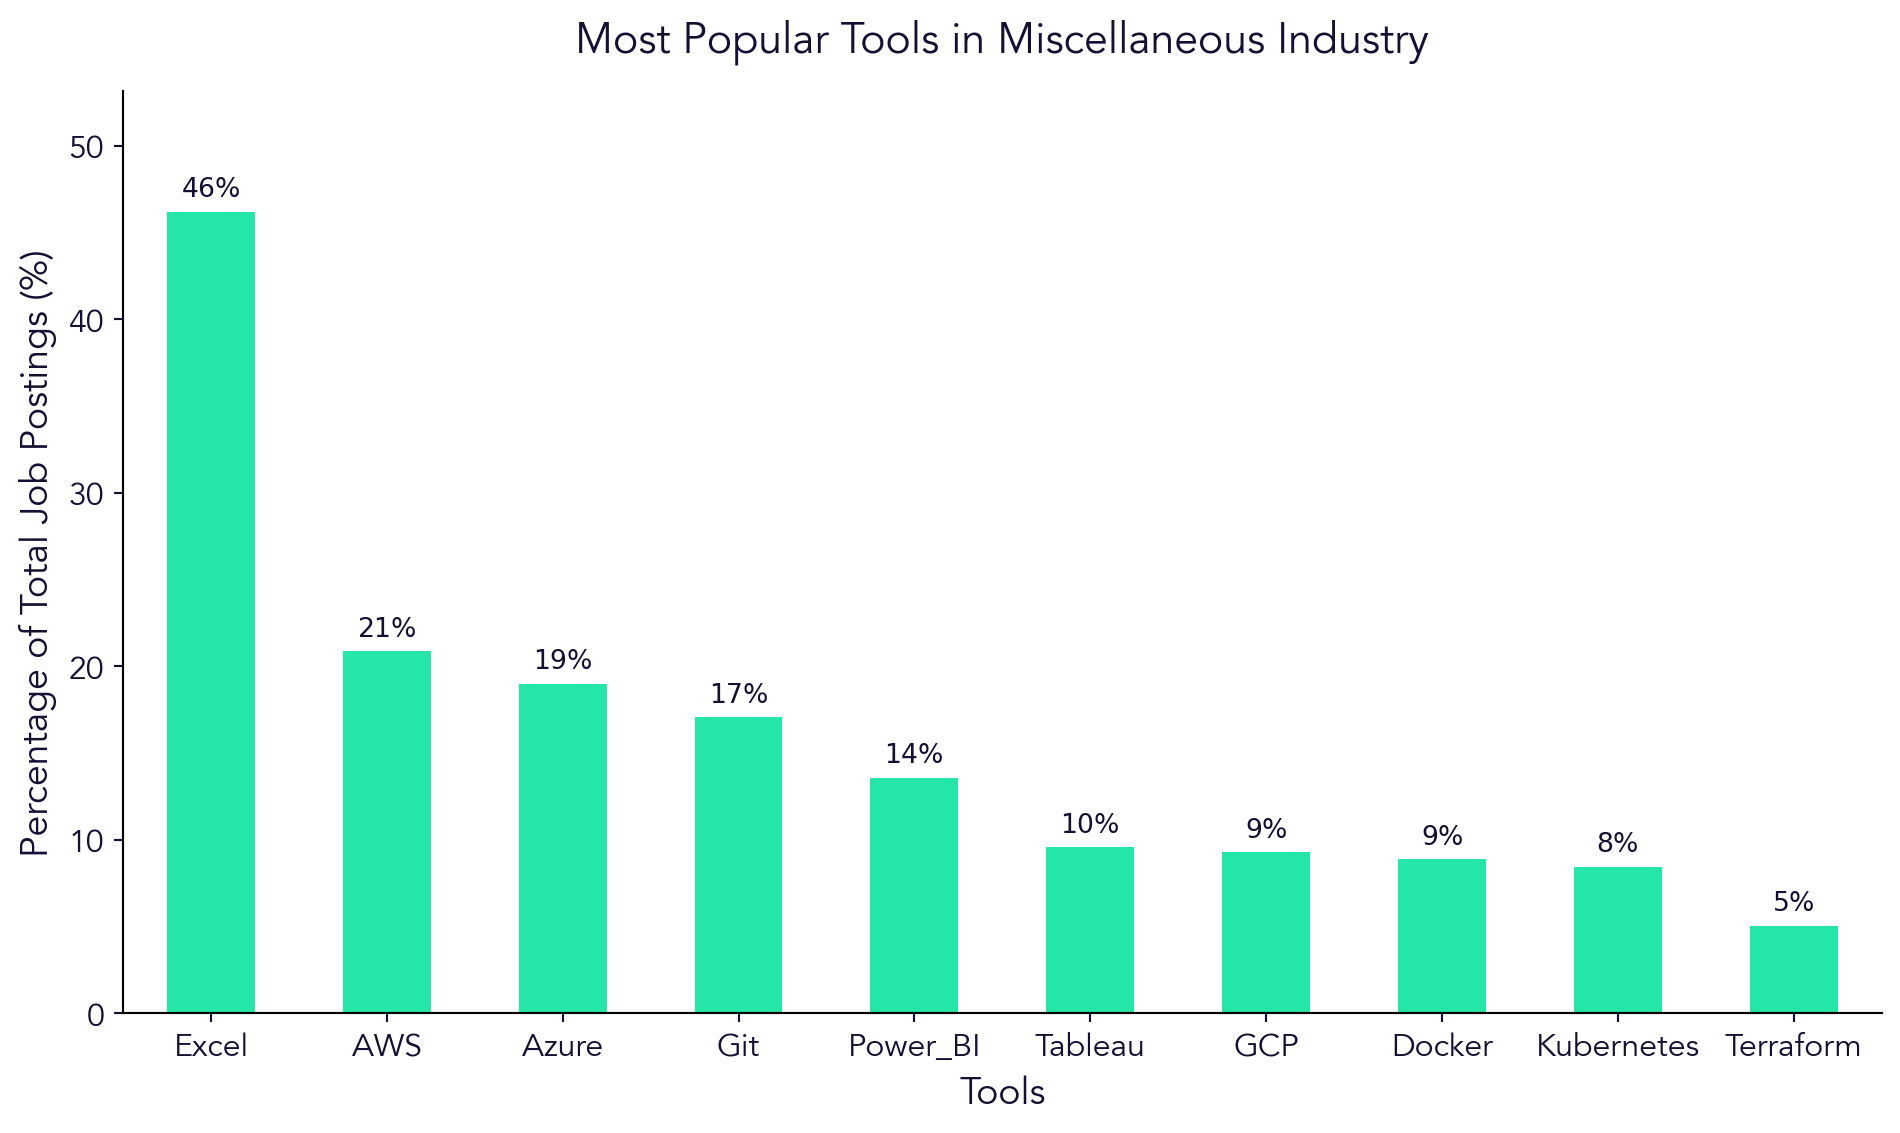

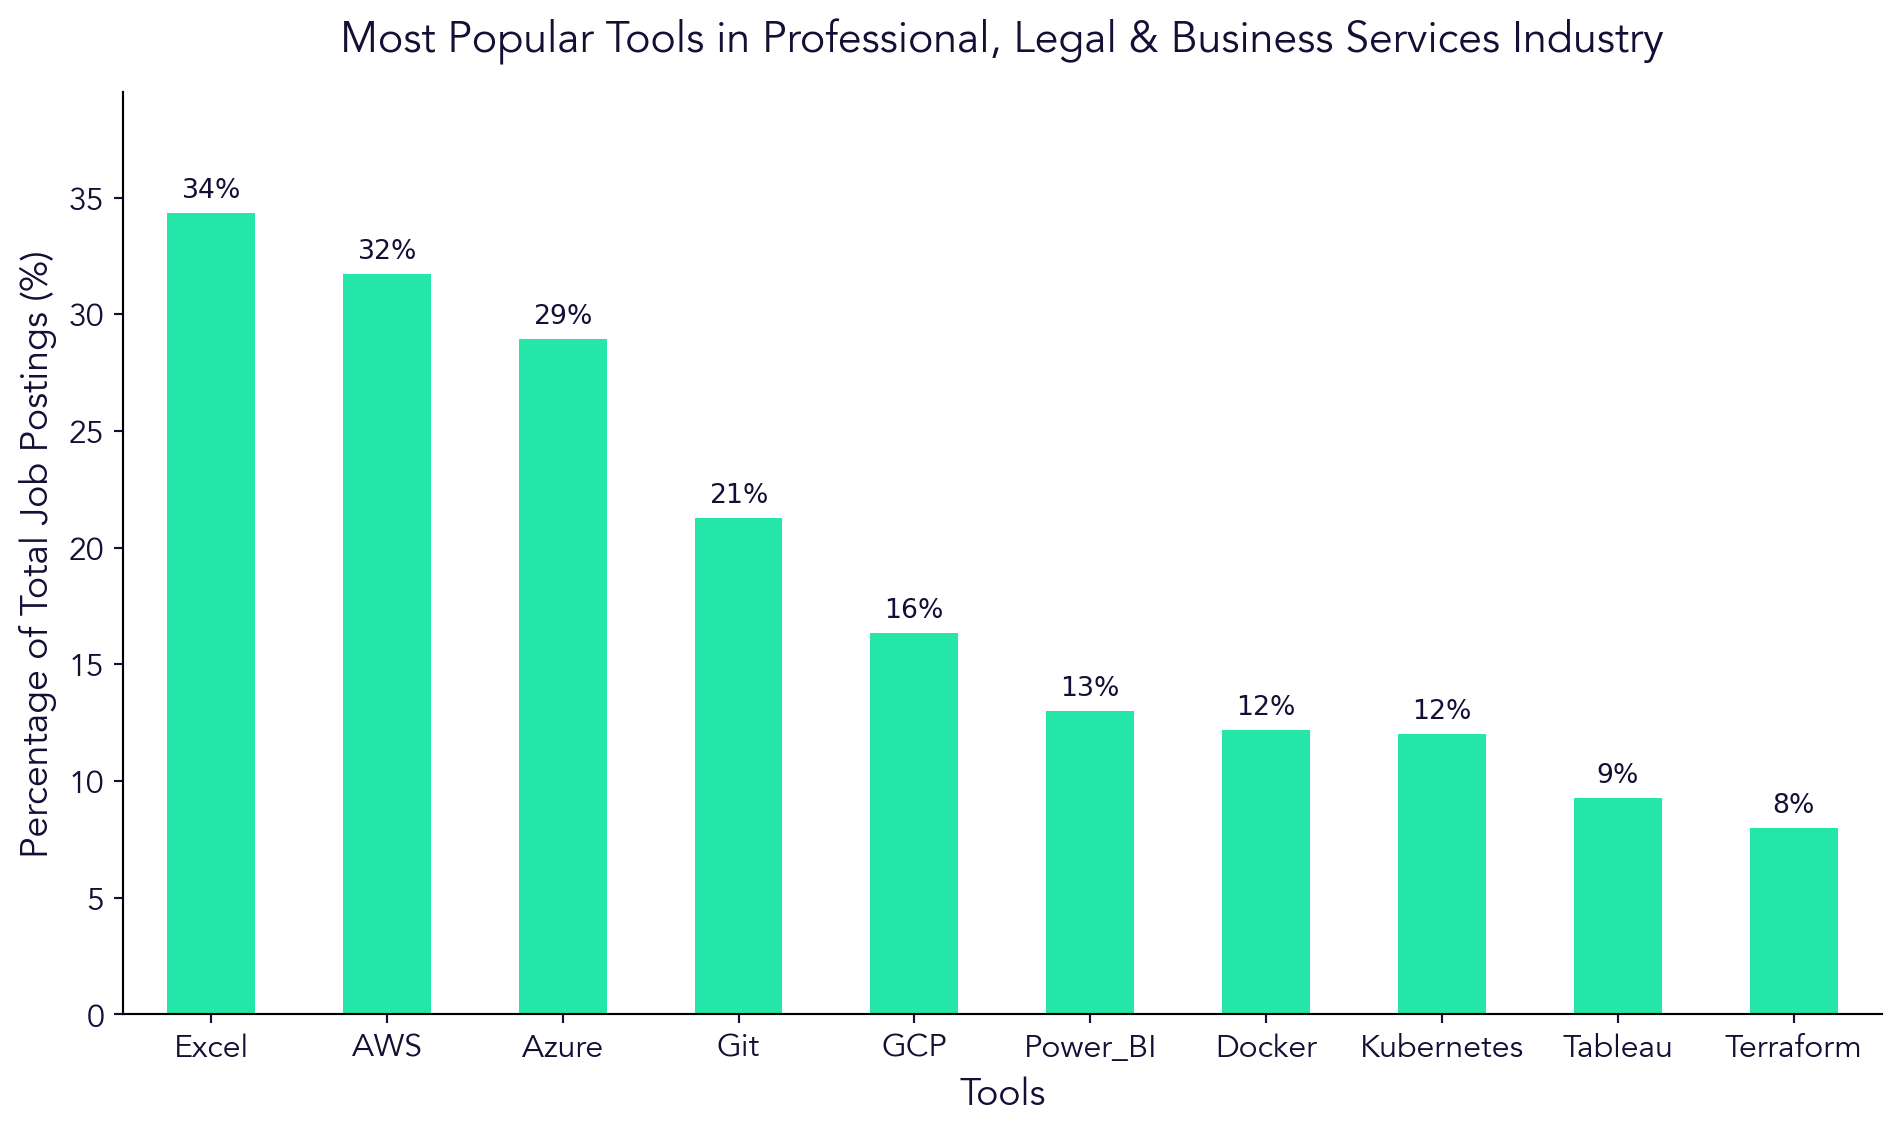

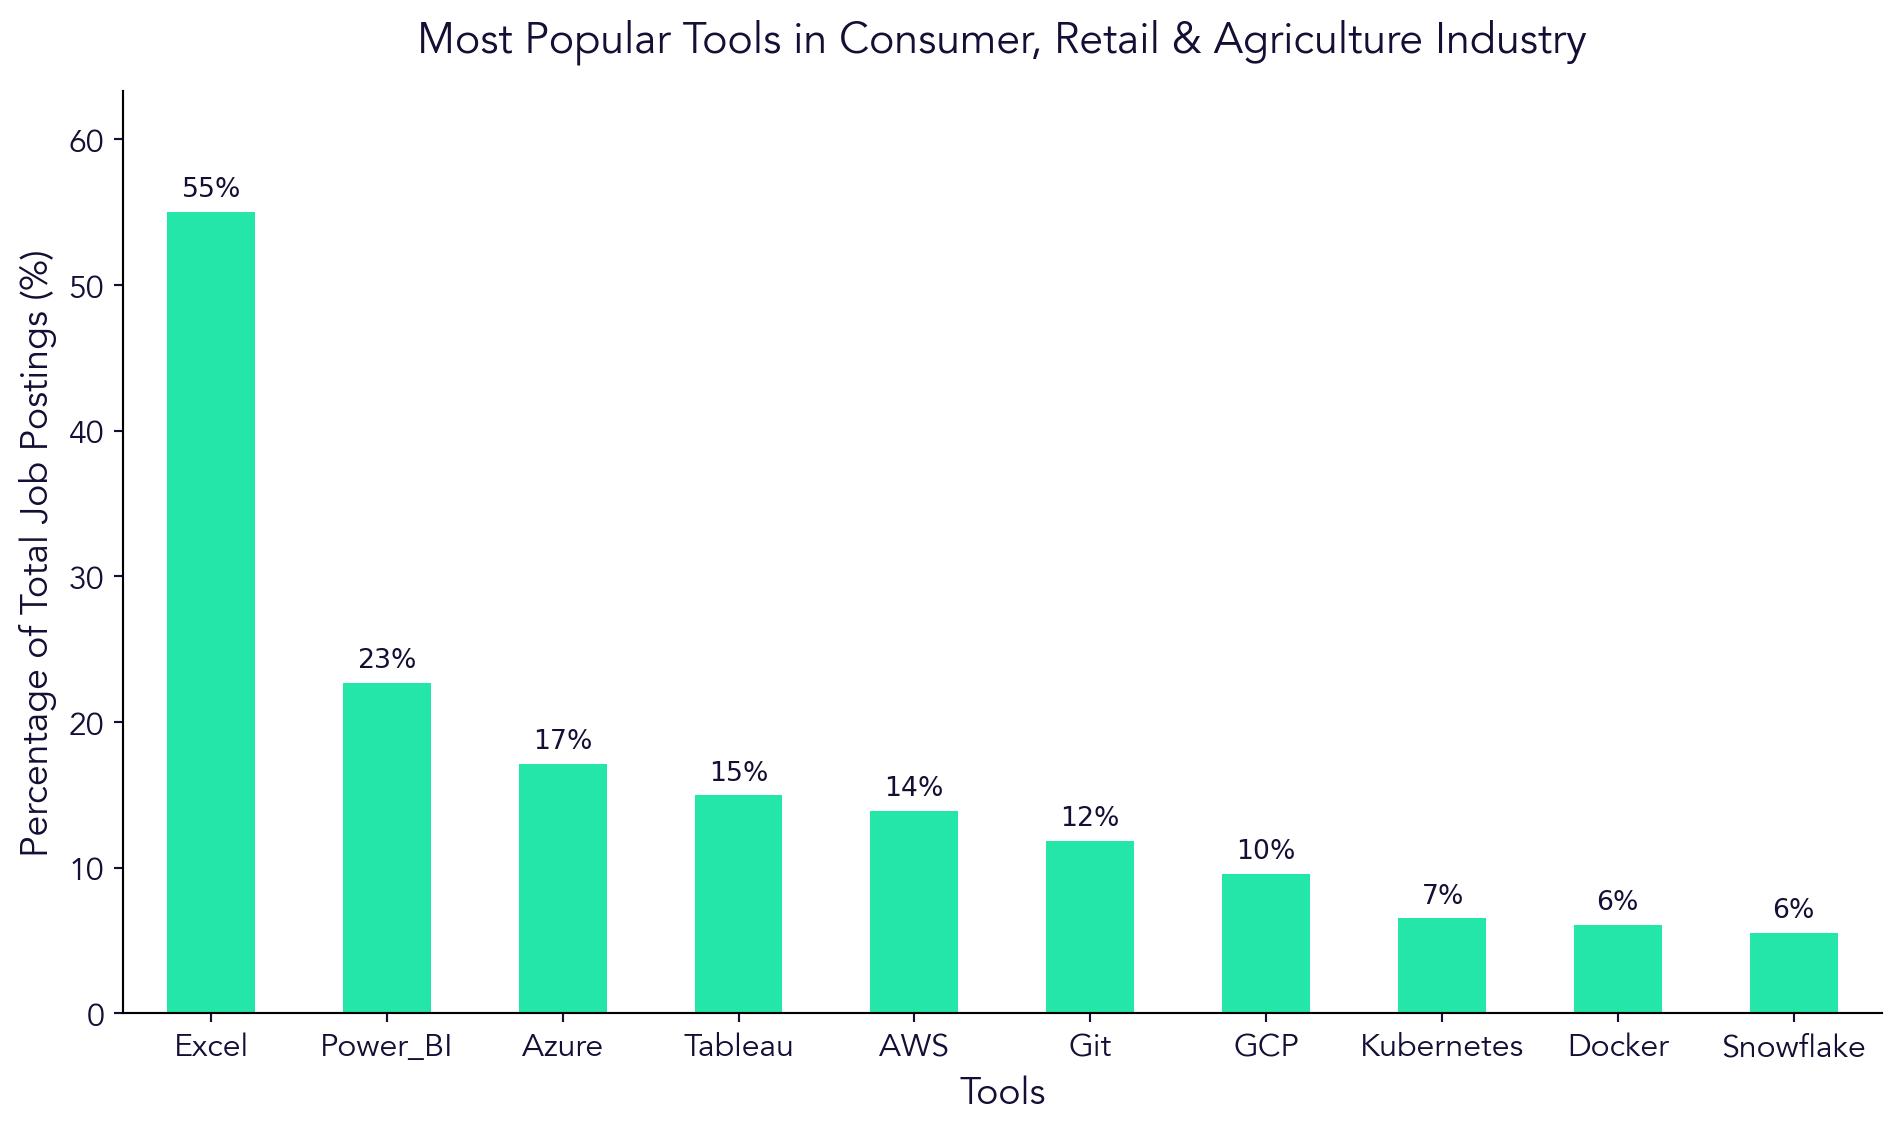

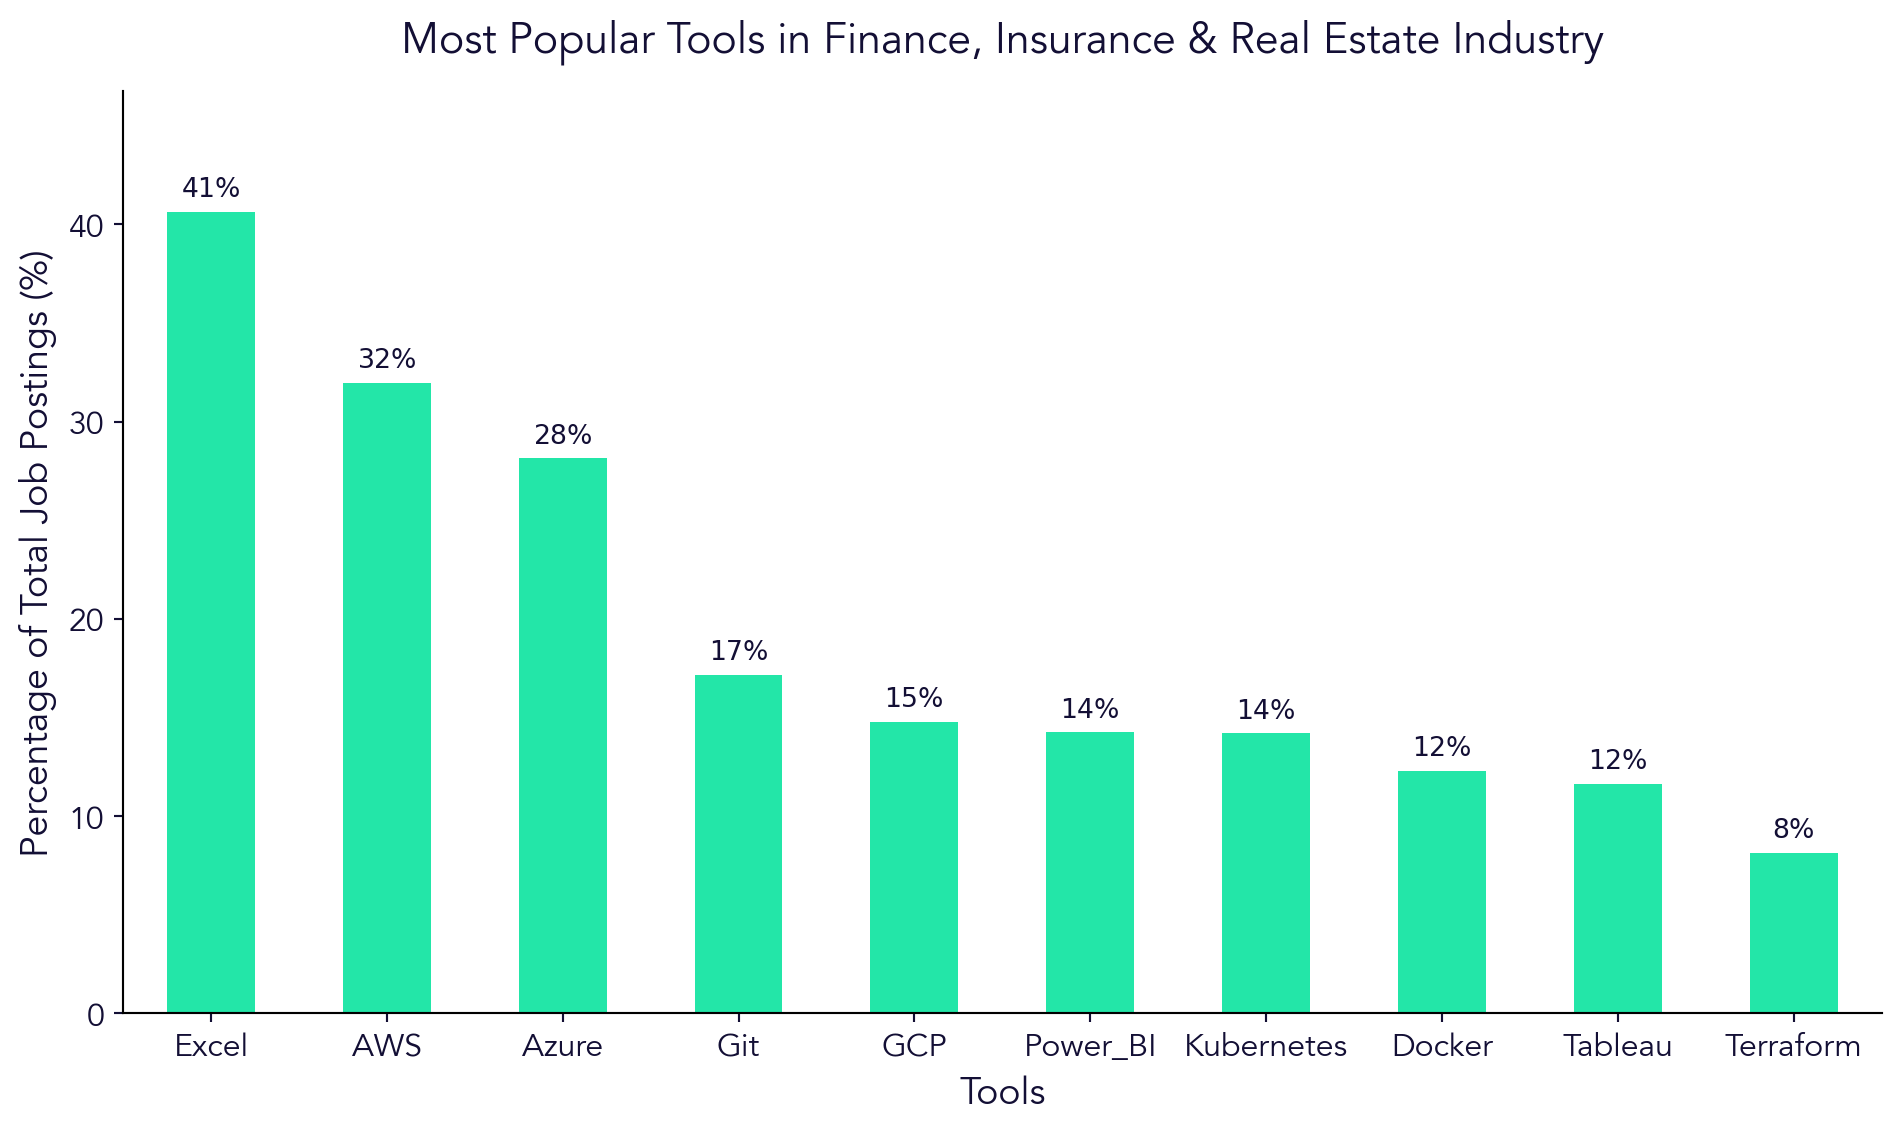

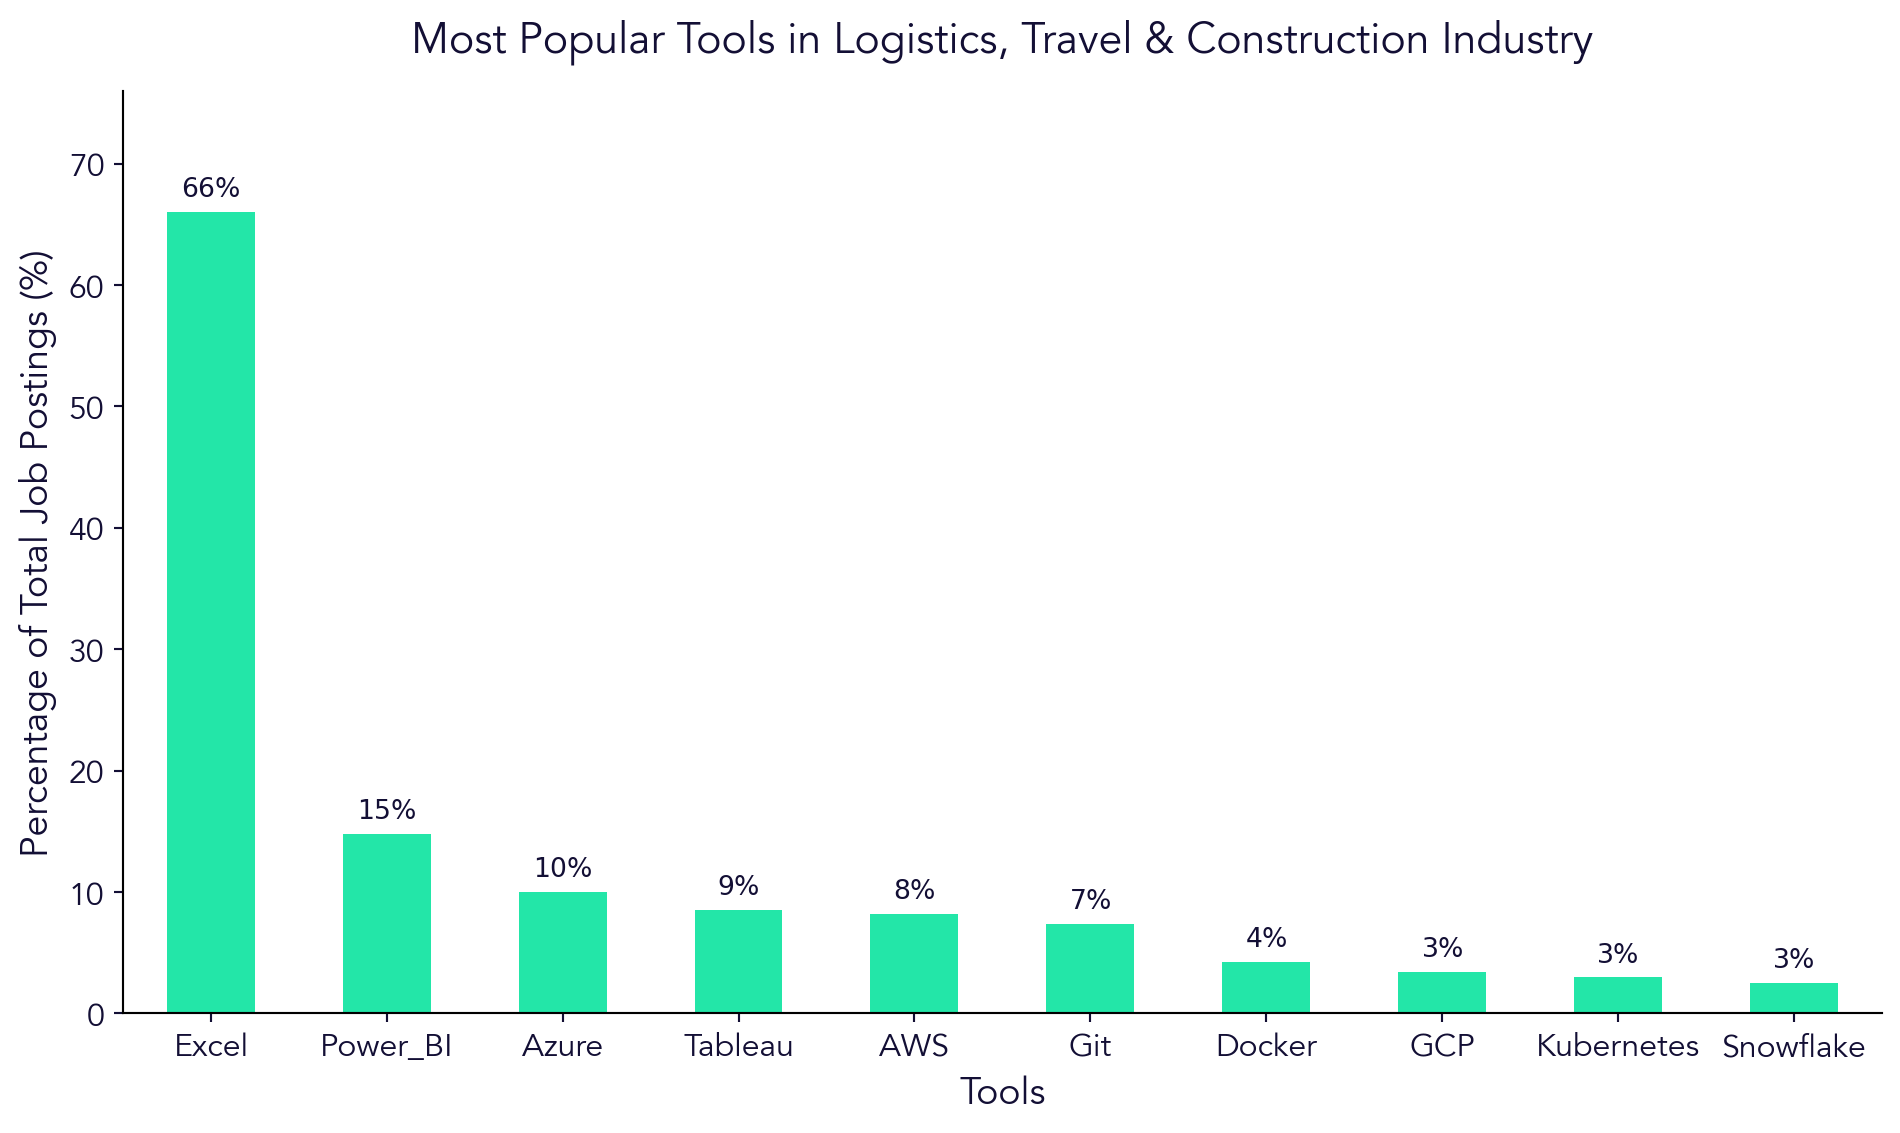

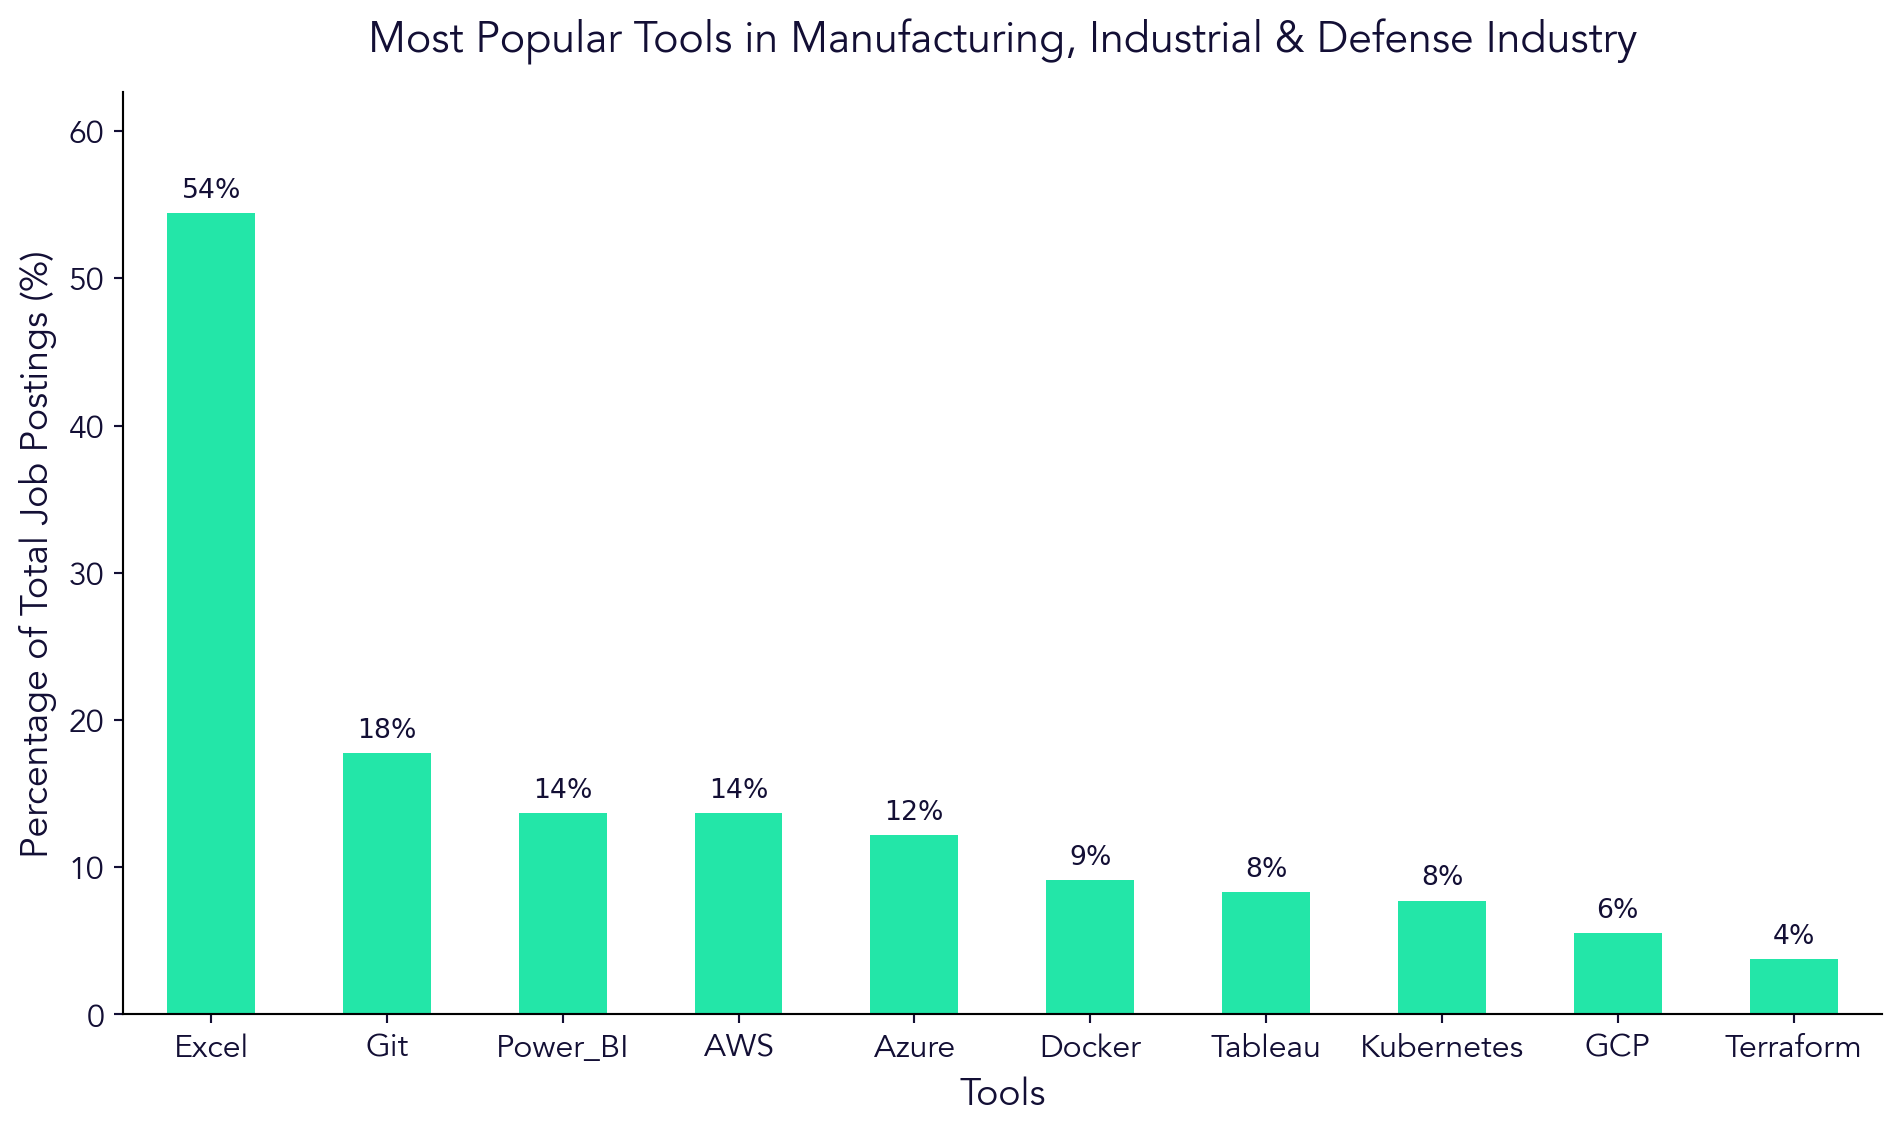

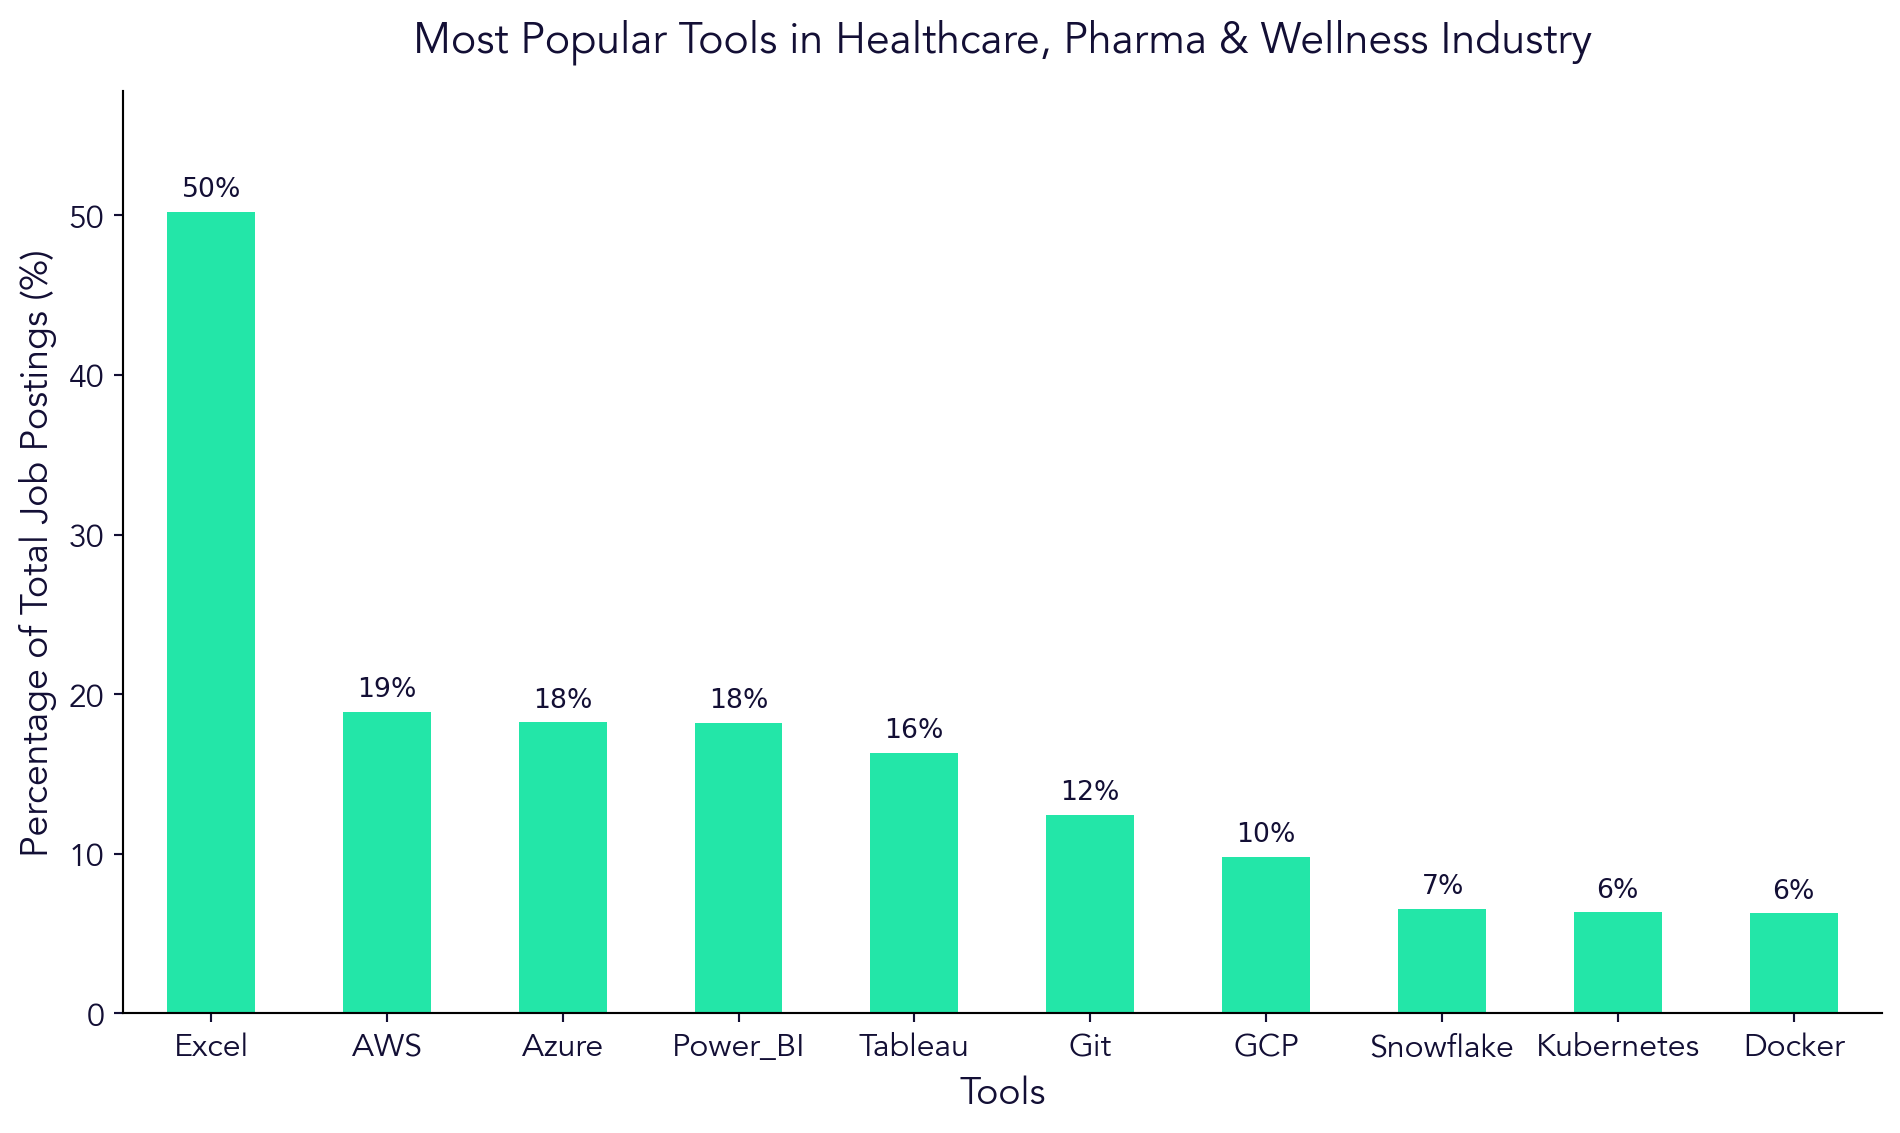

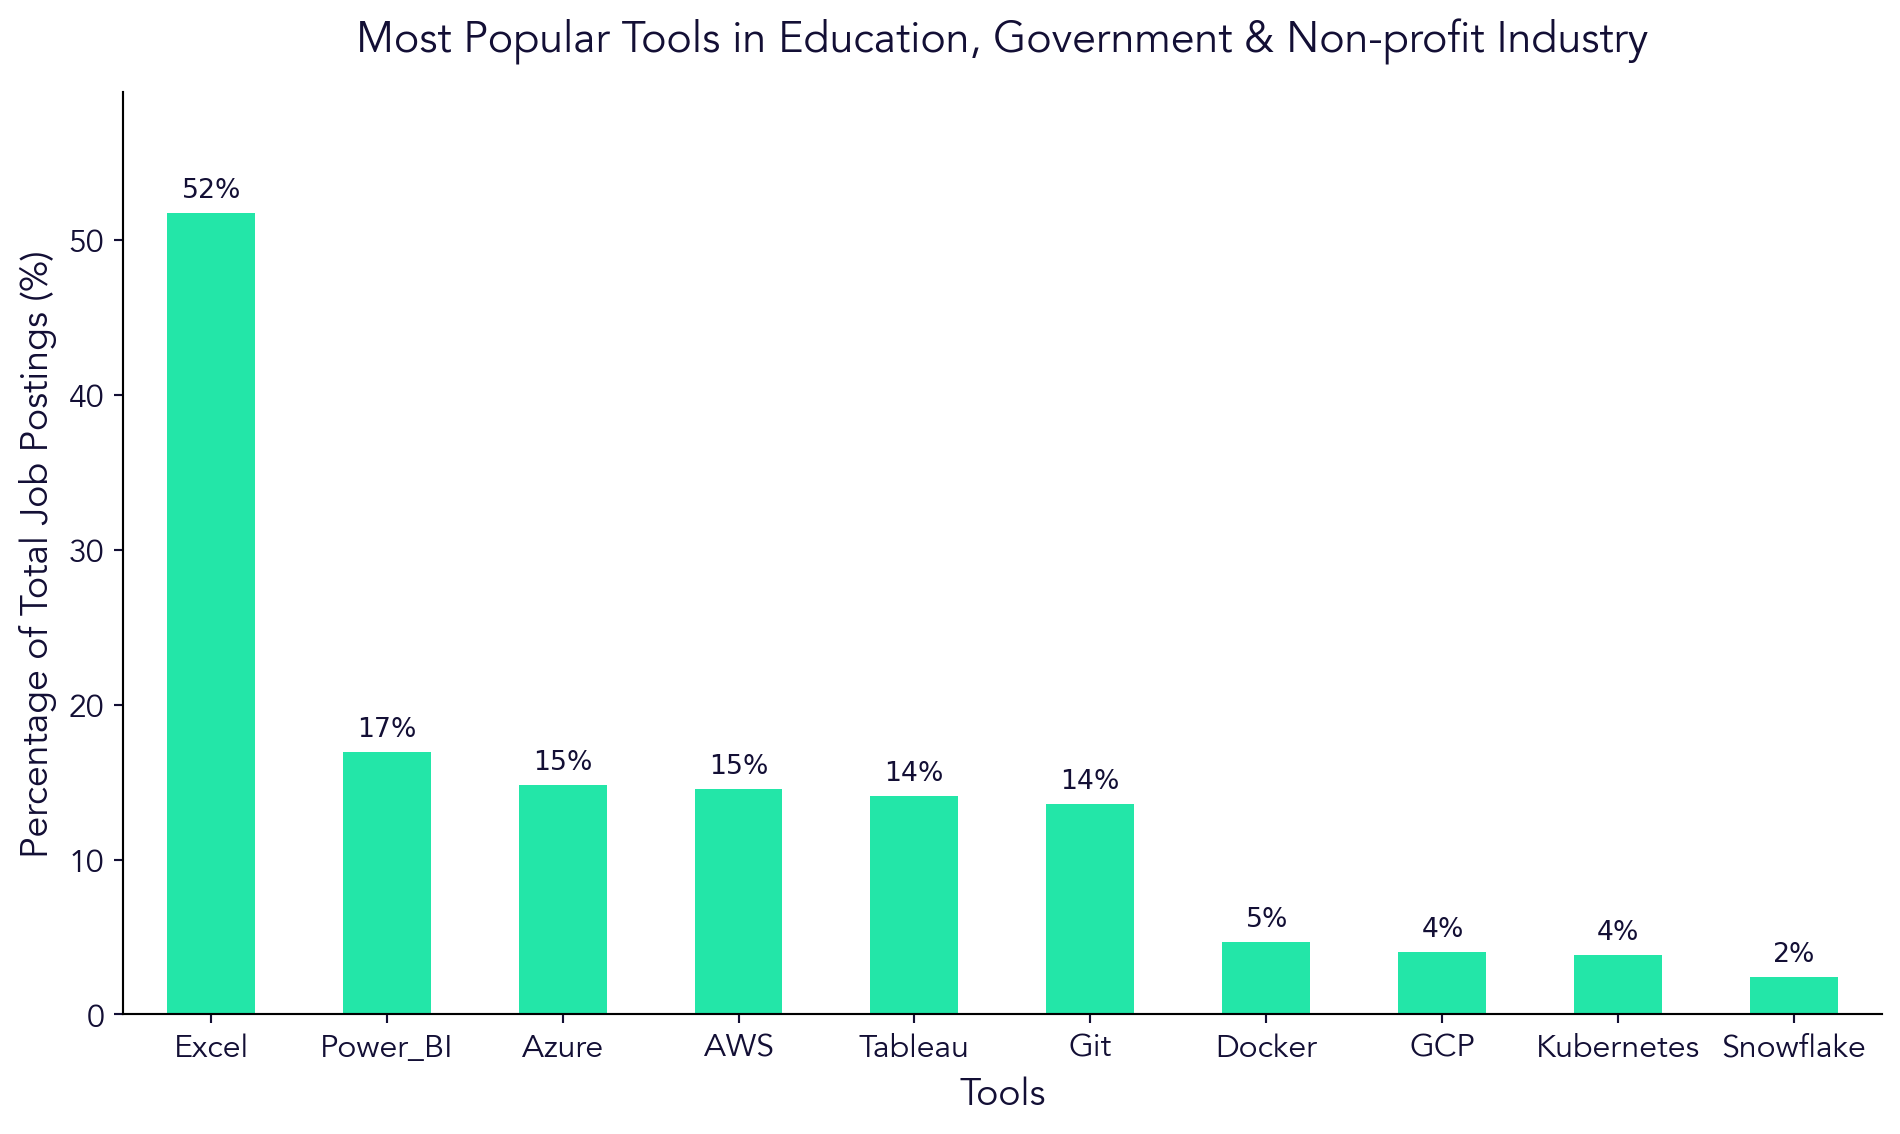

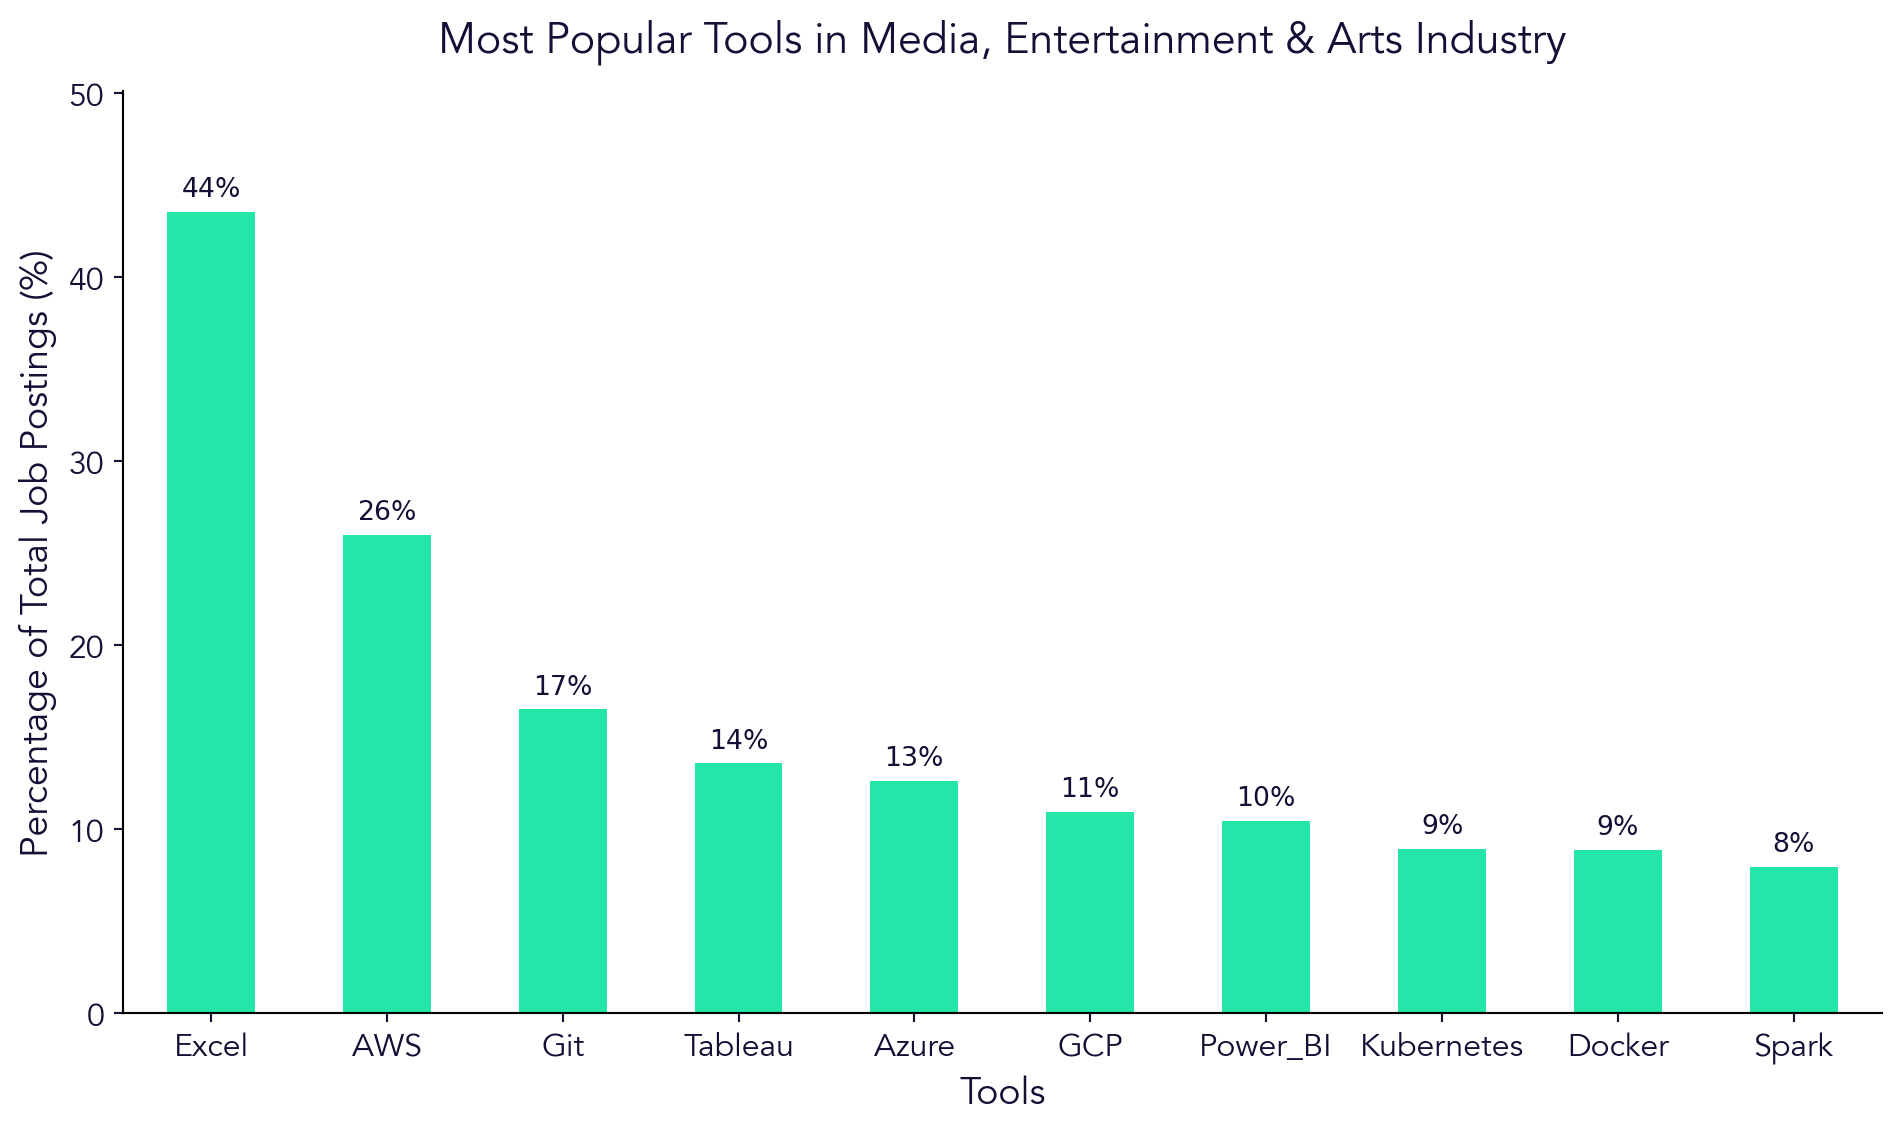

In [25]:
# | include: false
for industry in df["broad_industry_group"].unique().tolist():
    df_industry = df[df["broad_industry_group"] == industry]
    df_top_10_tools_industry = (
        df_industry[tech_tools].sum(axis=0).sort_values(ascending=False)[:10]
    )
    fig, ax = plot_tools_market_share(
        df_industry, tech_tools, title=f"Most Popular Tools in {industry} Industry"
    )
    fig.savefig(f"../outputs/figures/tools/tools_in_{industry}_industry.png", dpi=600)
    

### Tools Co-occurrence Frequency

In this section, I analyze the relationships between different technical tools by examining how often they appear together within the same job description. Identifying these pairings reveals the "tech stacks" or integrated ecosystems that employers currently favor in 2025.

Based on the data visualized in @fig-tools-heatmap, there is a strong overlap within cloud infrastructure providers. AWS and Azure are mentioned together in 15% of postings, suggesting a high demand for professionals capable of managing multi-cloud environments. Similarly, Google Cloud Platform and AWS appear together in 11% of jobs, while Google Cloud Platform and Azure share a 10% co-occurrence rate.

These figures indicate that while many companies choose a primary cloud provider, a significant portion of the market requires familiarity with multiple platforms to support redundant or hybrid cloud strategies.

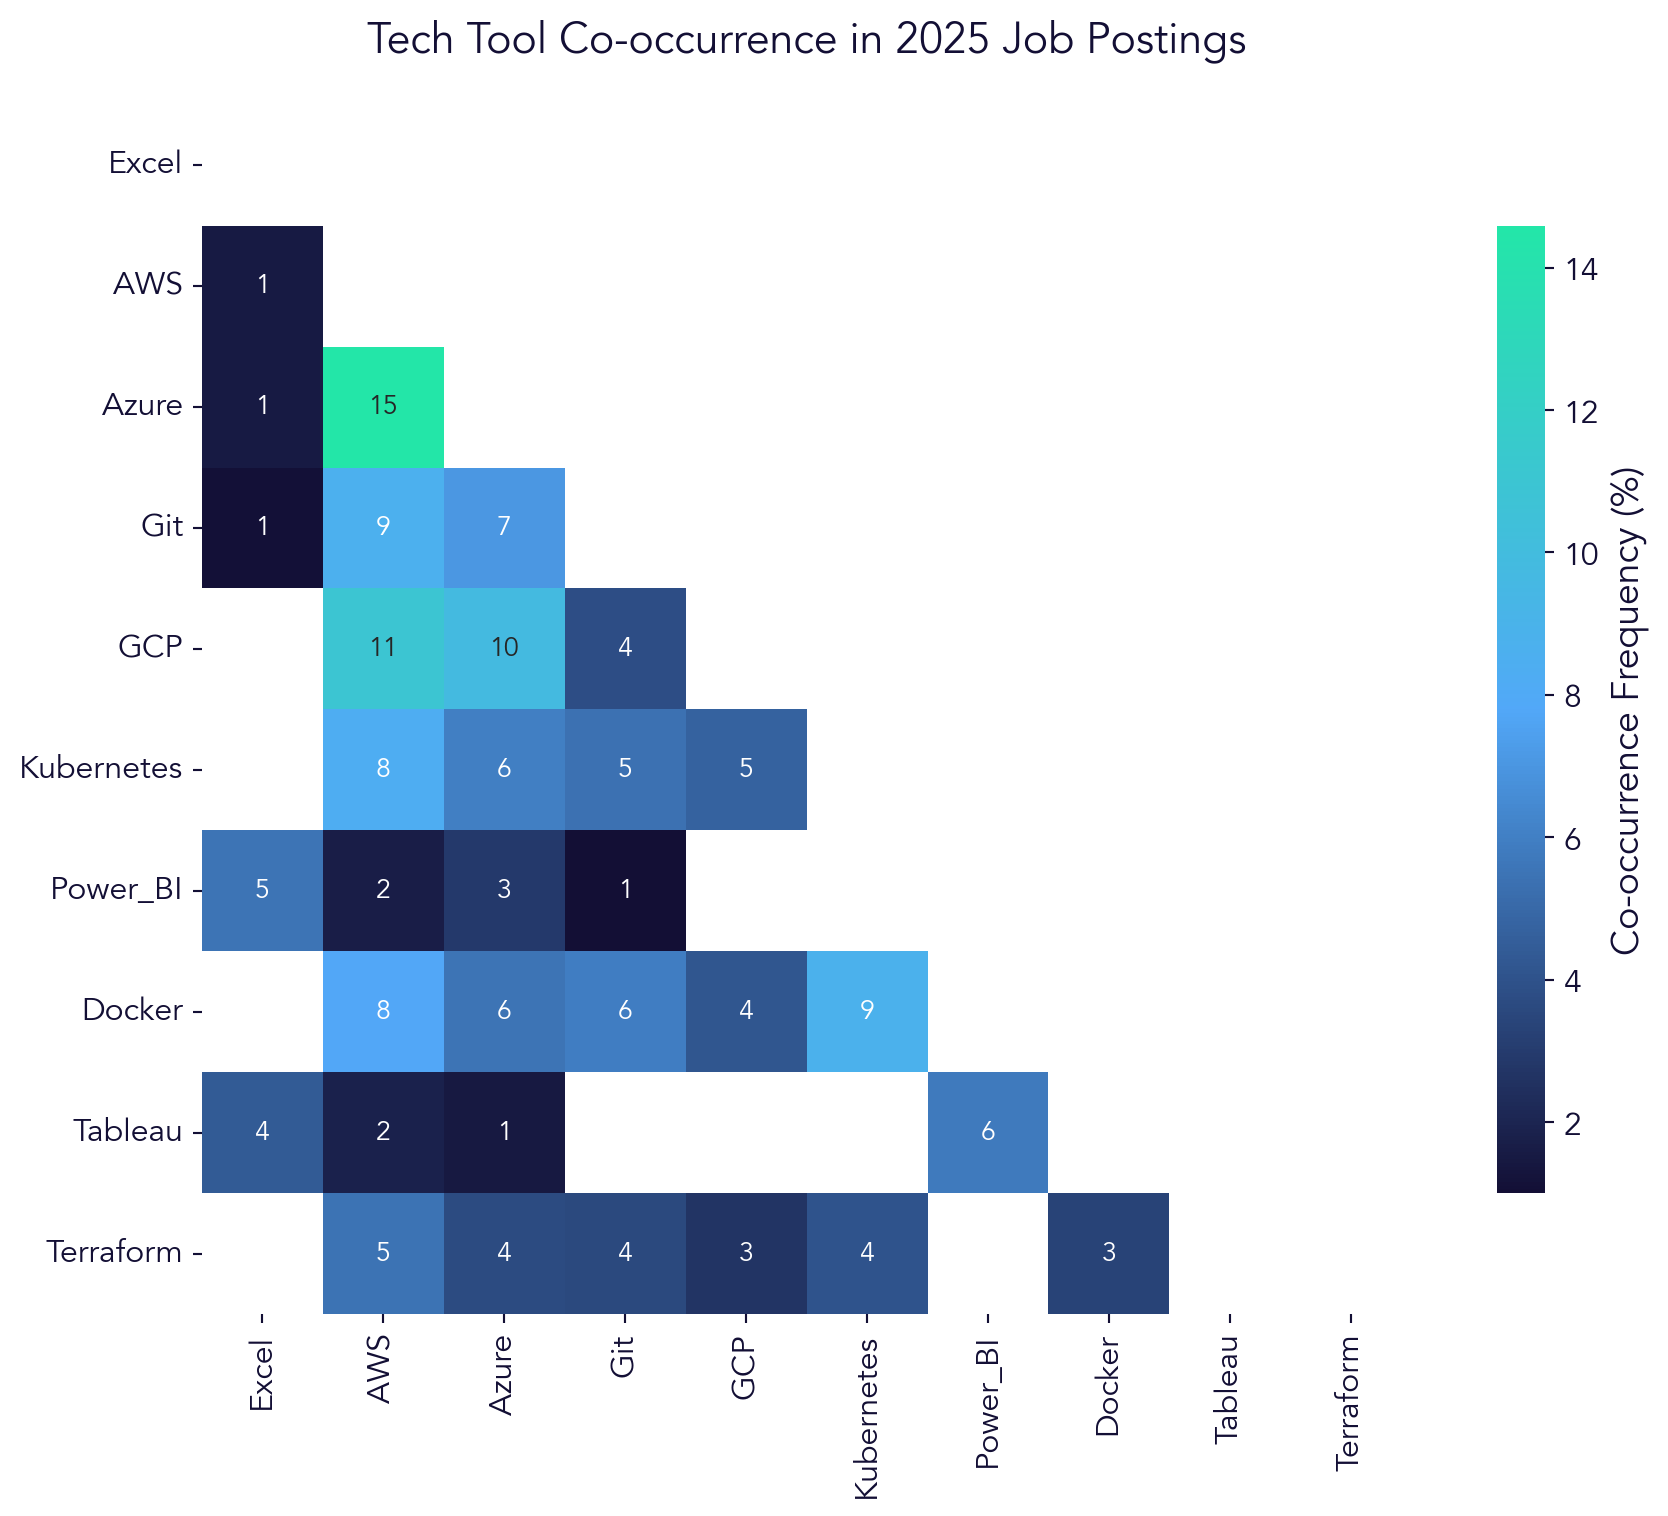

In [26]:
# | label: fig-tools-heatmap
# | fig-cap: "Tool co-occurrence heatmap for 2025."
plot_tools_distribution_by_tools(df, tools=top_10_tools, threshold=1.0)

### The Most in Demand Cloud Platforms by State

In this section, I explore which cloud platforms hold the dominant position within individual states. By identifying the most frequently requested cloud platform in each region, we can map out the technical "territories" of the 2025 US job market.

According to the data visualized in @fig-tools-dominance, AWS is the most required cloud platform in most of the states. Specific regions with high concentrations of infrastructure and federal operations show a pivot toward specialized cloud tools.

In [27]:
# | label: fig-tools-dominance
# | fig-cap: "Most popular tools by state in 2025."
cloud_platforms = ["AWS", "Azure", "GCP"]
df_dominant = get_dominant_language_by_state(df, cloud_platforms)
plot_us_tools_dominance(df_dominant, color_map={"AWS": oxy_teal, "Azure": oxy_violet, "GCP": oxy_light_blue})

::: {.content-visible unless-format="html"}
![Most popular tools by state.](../outputs/figures/tools/us_tools_dominance.png){#fig-tools-dominance width="90%"}
:::

## Market Leader Deep Dive: FAANG and MANGO

The final part of the analysis focuses on the industry giants that often set the trend for the rest of the market. We compare two distinct groups:

**FAANG (Meta, Apple, Amazon, Netflix, Google)**
These established leaders provide a benchmark for high-scale, mature tech environments. We analyze their core tool requirements to see which traditional technologies remain dominant.

**MANGO (Microsoft, Apple, Nvidia, Google, OpenAI/Anthropic)**
The MANGO index represents the architects of the current AI era. This section highlights the tool preferred by companies at the forefront of hardware innovation and LLM development. Comparing these groups reveals whether AI-centric firms are pivoting toward newer tools faster than the broader market.

**Key Differences**

Focus: FAANG was about digital advertising, e-commerce, and content streaming. MANGO is about generative AI, cloud infrastructure, and AI hardware.

Context: While FAANG focused on user attention, MANGO focuses on AI reasoning and intelligence.

### FAANG

In this section, we examine the hiring patterns of the world’s most influential technology giants. These organizations often set the standard for technical requirements and recruitment volume across the global IT sector.

Based on the data in @fig-dist-faang-companies, Amazon emerges as the clear leader in recruitment volume among the FAANG group, accounting for 62% of analyzed job postings within this elite cohort. Google follows with 24%, while Apple represents 8% of the demand. Meta and Netflix round out the group with 5% and 2% of the market share, respectively. This distribution highlights Amazon’s expansion and its significant role as a primary employer for technical talent.

The technical stack required by these organizations (see @fig-tools-faang) reflects their heavy investment in cloud infrastructure and data-driven decision-making. The high demand for AWS (53%) and Google Cloud (24%) is directly linked to the fact that Amazon and Google are the dominant employers within this dataset, essentially hiring to build and maintain their own proprietary ecosystems.

While cloud platforms lead the requirements, the data also shows a strong reliance on traditional analytical tools. Excel (15%) and Tableau (12%) remain vital for business intelligence within these firms, proving that even at the highest level of tech innovation, foundational data tools are still used for daily operations. More specialized infrastructure tools like Spark, Kubernetes, and Terraform show lower total percentages, but they represent the critical "engine room" skills required for high-level engineering roles.

In [28]:
# | include: false
df_fang = create_faang_df(df)
df_fang.head()

title  manager  engineer  analyst  scientist  developer  \
0    Senior Manager, ...        1         1        0          0          0   
239  Senior Industria...        0         1        0          0          0   
525  Data Center Proj...        1         0        0          0          0   
528  Senior Security ...        0         1        0          0          0   
529  Software Develop...        0         1        0          0          0   

            company_name     company_industry       state  \
0                 Amazon  Software Develop...   Tennessee   
239               Amazon  Software Develop...    New York   
525               Amazon  Software Develop...  California   
528  Amazon Web Servi...  IT Services and ...  Washington   
529  Amazon Web Servi...  IT Services and ...  Washington   

              created_at  ...  Azure  GCP  Databricks  Kafka  Spark  \
0   2025-09-10 20:07:...  ...      0    0           0      0      0   
239 2025-02-25 19:00:...  ...      0    0           0      0      0   
525 2025-11-06 02:11:...  ...      0    0           0      0      0   
528 2025-03-07 21:52:...  ...      0    0           0      0      0   
529 2025-10-31 20:37:...  ...      0    0           0      0      0   

     Monte_Carlo  broad_industry_group  state_clean  state_code  \
0              0  Tech, Data & Tel...     Tennessee          TN   
239            0  Tech, Data & Tel...      New York          NY   
525            0  Tech, Data & Tel...    California          CA   
528            0  Tech, Data & Tel...    Washington          WA   
529            0  Tech, Data & Tel...    Washington          WA   

     faang_category  
0            Amazon  
239          Amazon  
525          Amazon  
528          Amazon  
529          Amazon  

[5 rows x 37 columns]

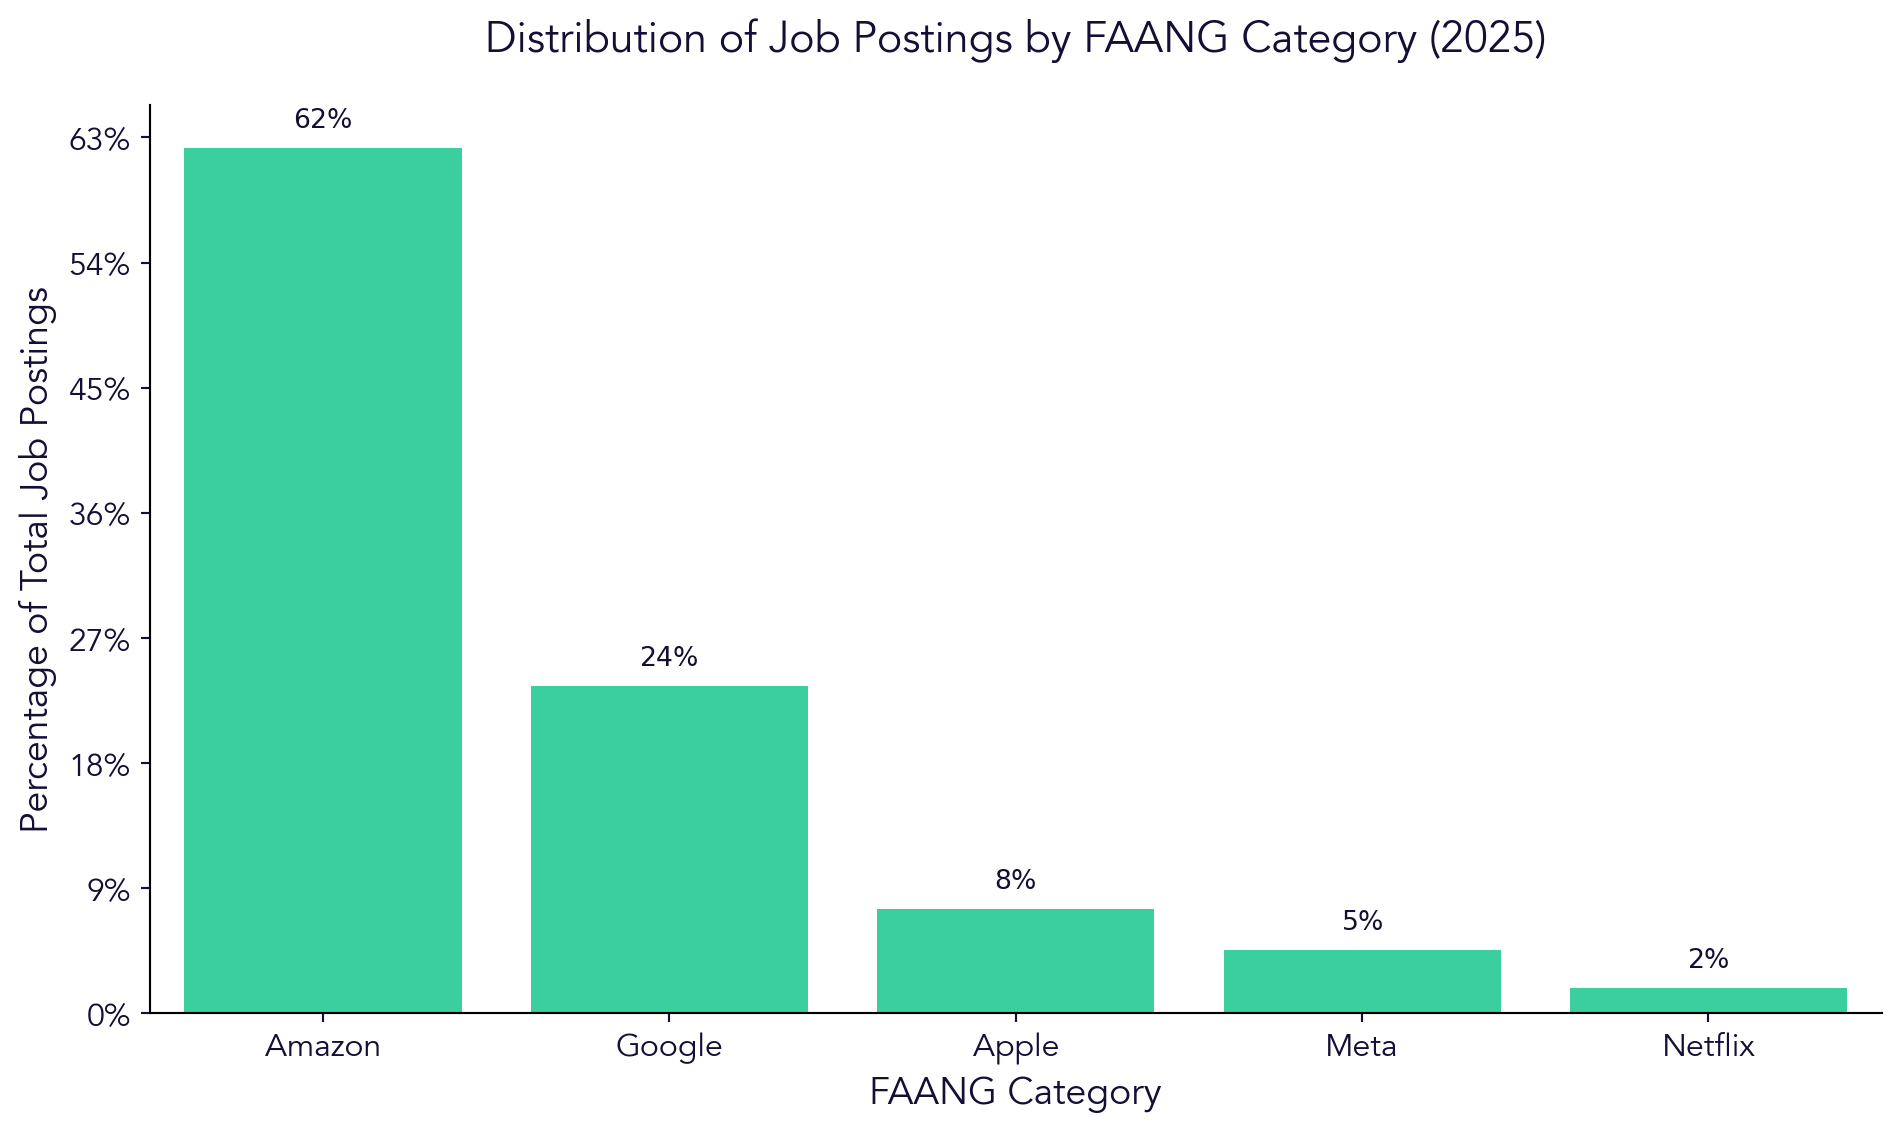

In [29]:
# | label: fig-dist-faang-companies
# | fig-cap: "Distribution of job postings within the FAANG companies."
total_jobs = len(df_fang)
top_categories = df_fang["faang_category"].value_counts().nlargest(15).index
subset = df_fang[df_fang["faang_category"].isin(top_categories)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=subset, x="faang_category", order=top_categories, color=oxy_teal
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs

    label = f"${percentage:.0f}\\%$"

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%")
)

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by FAANG Category (2025)", pad=20)
plt.xlabel("FAANG Category")


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

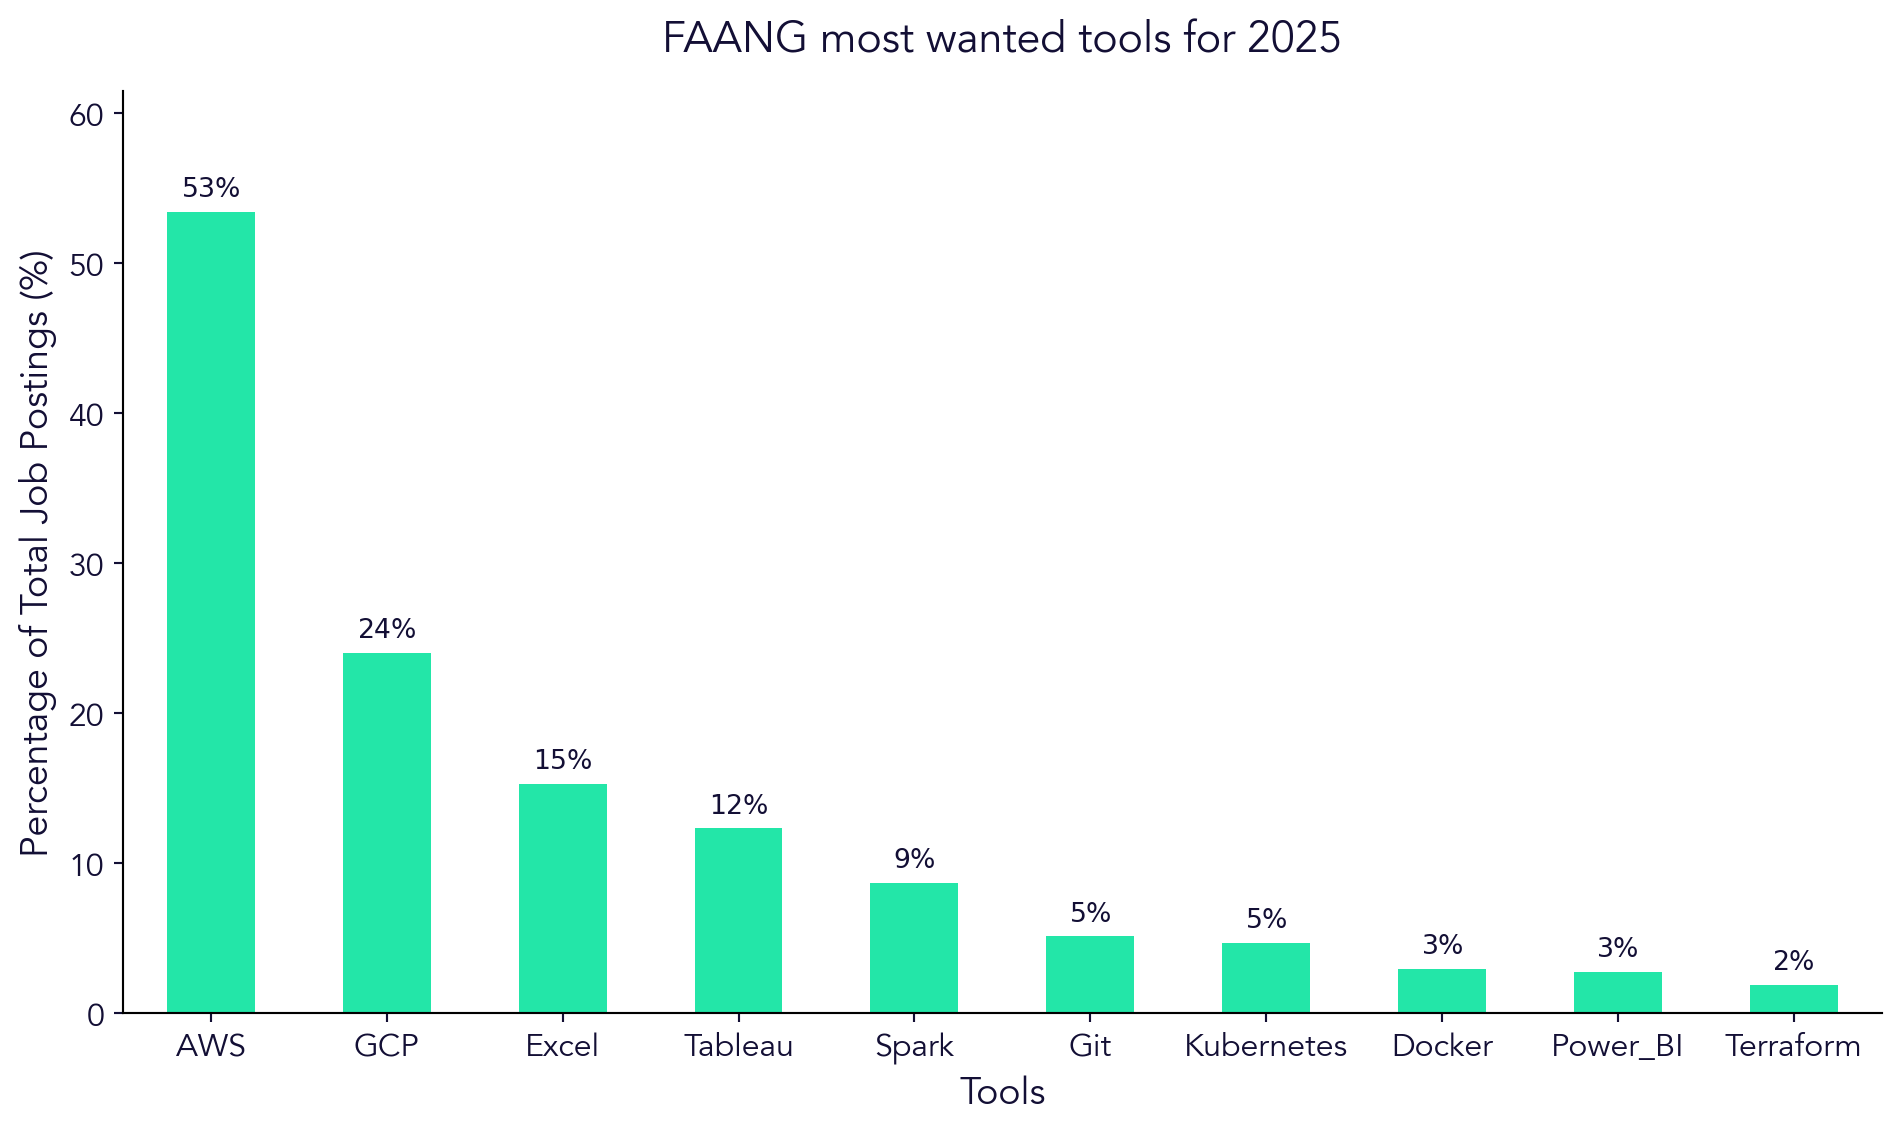

In [30]:
# | label: fig-tools-faang
# | fig-cap: "Distribution of demanded tools within the FAANG companies."

fig, ax = plot_tools_market_share(
    df_fang, tech_tools, title="FAANG most wanted tools for 2025"
)

### MANGO

In this section, we pivot our focus to the "MANGO" cohort—Meta, Apple, NVIDIA, Google, and Oracle—representing a more hardware and AI-centric evolution of the traditional tech giants. Analyzing this group allows us to see how the demand for talent shifts when emphasizing cutting-edge infrastructure and silicon innovation.

According to @fig-dist-mango-companies, Google stands as the dominant hiring force in this group, responsible for 34% of the job postings. Microsoft and Apple maintain a strong presence with 19% and 17% respectively, while NVIDIA—fueled by the ongoing AI hardware boom—accounts for 15% of the requirements. Meta occupies a smaller portion of the current hiring landscape at 3%. This distribution underscores a market where established cloud and hardware leaders are currently driving the bulk of new technical opportunities.

The tool requirements within the MANGO group (see @fig-tools-mango) show a distinct shift compared to the FAANG cohort. Most notably, GCP (41%) and Azure (30%) are the leading technologies. This is due to the fact that Microsoft and Google are central to the MANGO category, while Amazon is excluded, leading to a significantly lower presence for AWS (11%).

Beyond cloud providers, the MANGO group places a much higher premium on deployment and containerization technologies. Kubernetes (19%), Git (16%), and Docker (11%) appear with higher frequency here than in other cohorts. This suggests that the work within these companies is heavily focused on scalable infrastructure and complex DevOps pipelines, likely supporting the massive compute requirements of AI development and global cloud services.


In [31]:
# | include: false
df_mango = create_mango_df(df)
df_mango.head()

title  manager  engineer  analyst  scientist  developer  \
12    Senior Manager, ...        1         1        0          0          0   
350   Software Enginee...        0         1        0          0          0   
1015  Fixed Income Por...        0         0        1          0          0   
1209  Technical Soluti...        0         0        0          0          1   
1220  Principal Power ...        0         1        0          0          0   

     company_name     company_industry       state           created_at  ...  \
12         NVIDIA  Computer Hardwar...  California 2025-09-16 04:04:...  ...   
350     Microsoft  Software Develop...  Washington 2025-05-06 06:38:...  ...   
1015       Google  Software Develop...    New York 2025-09-09 23:25:...  ...   
1209       Google  Software Develop...  Washington 2025-11-17 19:59:...  ...   
1220    Microsoft  Software Develop...  Washington 2025-10-15 15:06:...  ...   

      GCP  Databricks  Kafka  Spark  Monte_Carlo  broad_industry_group  \
12      0           0      0      0            0  Tech, Data & Tel...    
350     0           0      0      0            0  Tech, Data & Tel...    
1015    1           0      0      0            0  Tech, Data & Tel...    
1209    1           0      0      0            0  Tech, Data & Tel...    
1220    0           0      0      0            0  Tech, Data & Tel...    

      state_clean  state_code  faang_category   mango_category  
12     California          CA            None           Nvidia  
350    Washington          WA            None        Microsoft  
1015     New York          NY          Google  Google/DeepMind  
1209   Washington          WA          Google  Google/DeepMind  
1220   Washington          WA            None        Microsoft  

[5 rows x 38 columns]

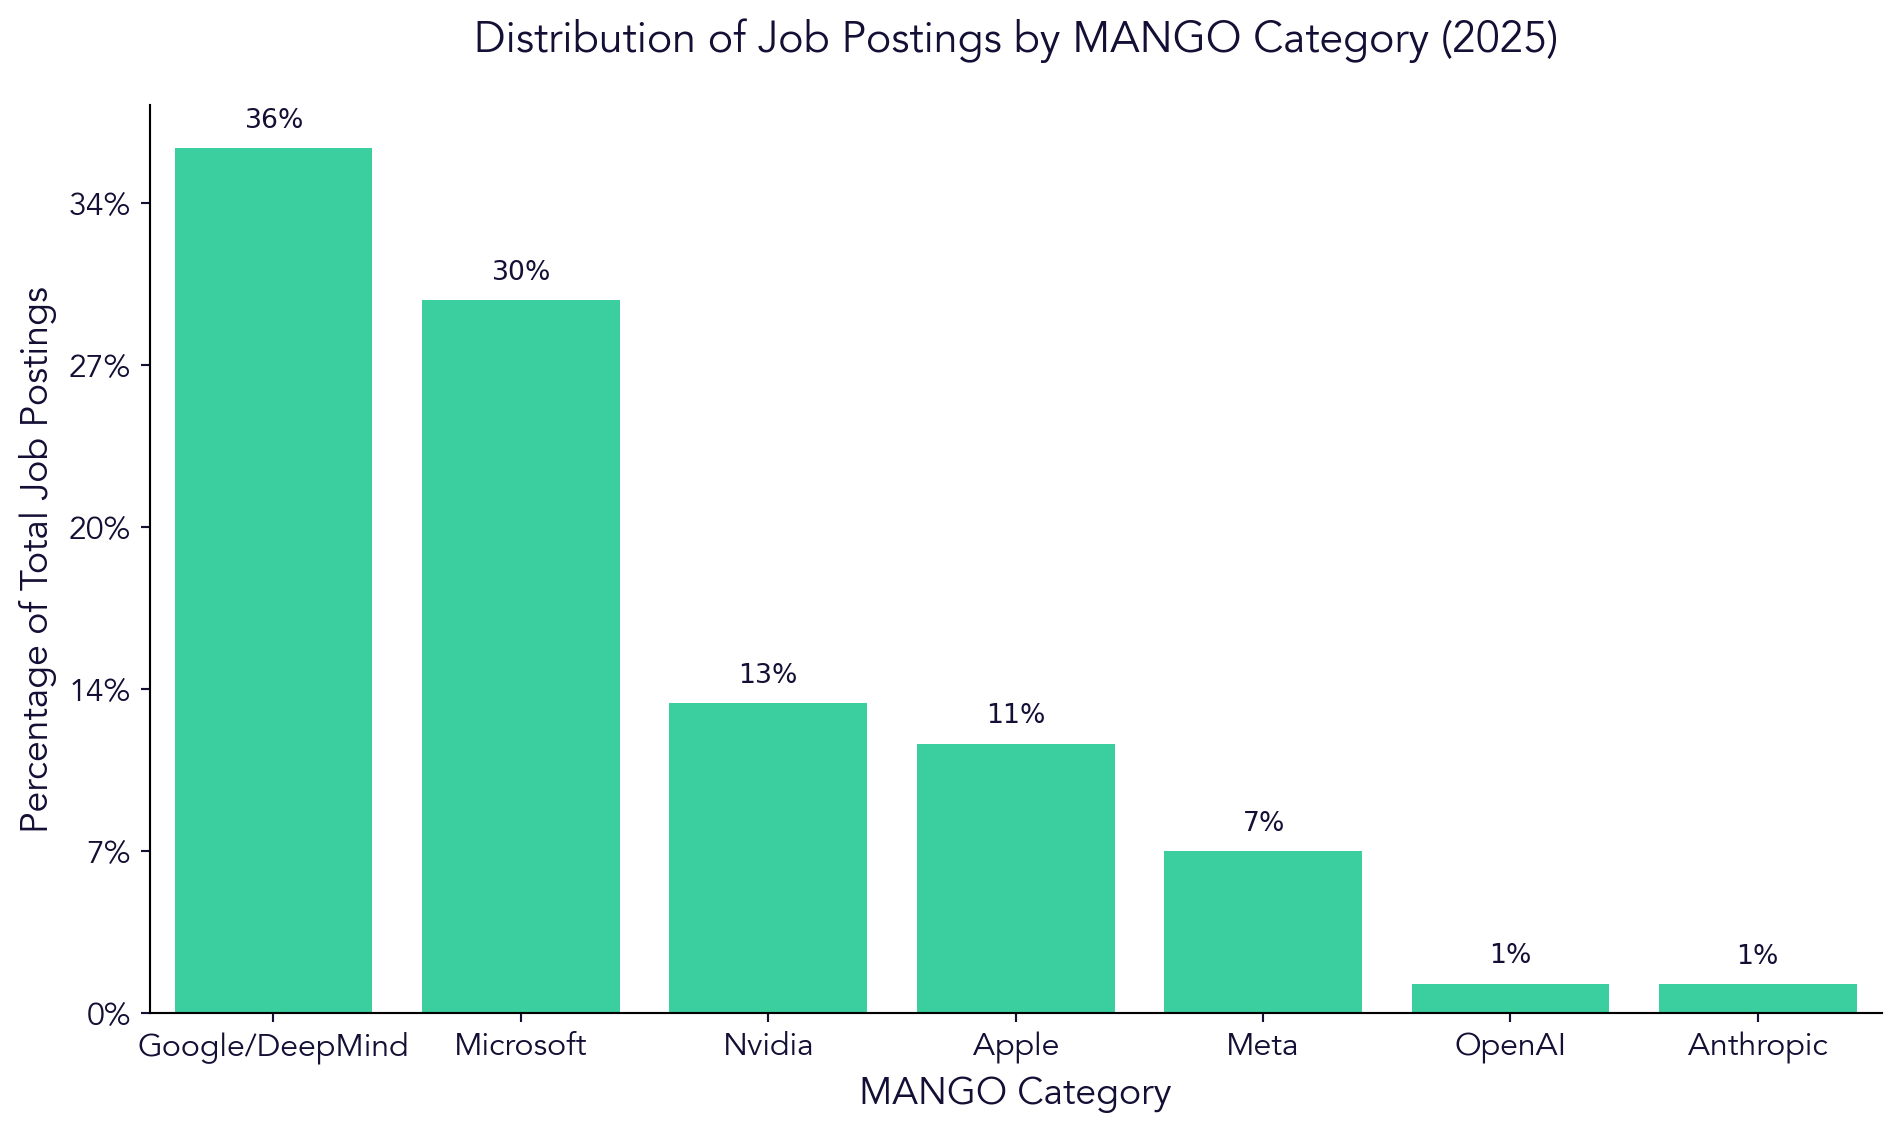

In [32]:
# | label: fig-dist-mango-companies
# | fig-cap: "Distribution of job postings within the MANGO companies."
total_jobs = len(df_mango)
top_categories = df_mango["mango_category"].value_counts().nlargest(15).index
subset = df_mango[df_mango["mango_category"].isin(top_categories)]

plt.figure(figsize=(10, 6))
ax = sns.countplot(
    data=subset, x="mango_category", order=top_categories, color=oxy_teal
)

for p in ax.patches:
    height = p.get_height()
    percentage = (100 * height) / total_jobs

    label = f"${percentage:.0f}\\%$"

    ax.annotate(
        label,
        (p.get_x() + p.get_width() / 2, height),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points"
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.yaxis.set_major_formatter(
    mtick.FuncFormatter(lambda x, pos: f"{(x/total_jobs)*100:.0f}%")
)

plt.ylabel("Percentage of Total Job Postings")

plt.title("Distribution of Job Postings by MANGO Category (2025)", pad=20)
plt.xlabel("MANGO Category")


plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

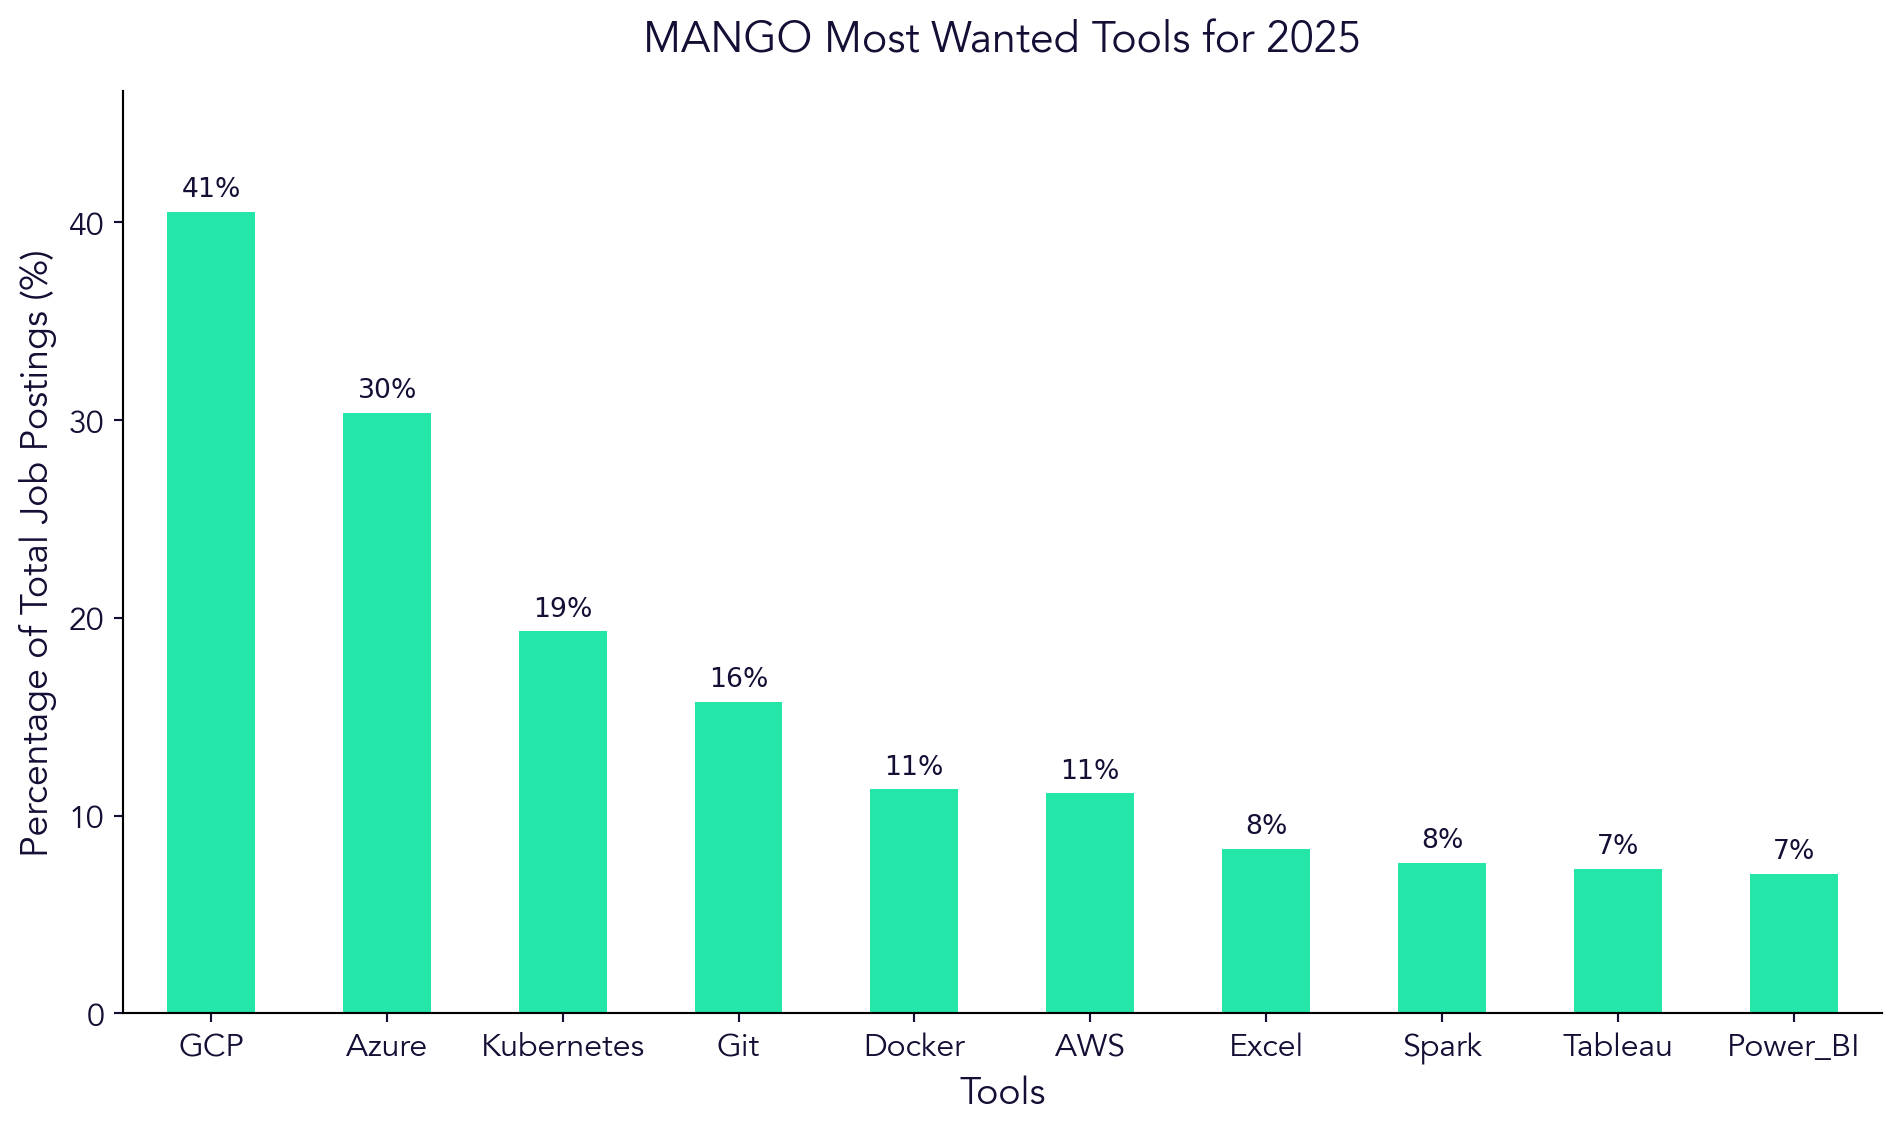

In [33]:
# | label: fig-tools-mango
# | fig-cap: "Distribution of demanded tools within the MANGO companies."
fig, ax = plot_tools_market_share(
    df_mango, tech_tools, title="MANGO Most Wanted Tools for 2025"
)

# Key Insights

- Excel and AWS have solidified their roles as the essential tools of the 2025 technical landscape. While Excel remains the near-universal baseline for business data management (required in 37% of postings), AWS has become the "infrastructure lingua franca," appearing in 29% of analyzed technical roles—more than Azure and GCP combined.

- The demand for Engineers is overwhelming, accounting for 51% of the market share among technical titles. This highlights a critical industry shift: companies are focusing more on building and architecting robust systems than on pure management or stand-alone data analysis.

- As AI integration matures, the "Modern Data Stack" is shifting towards performance. Tools that facilitate real-time data streaming and high-speed processing, such as Kafka and Spark, are seeing increased co-occurrence with cloud platforms, indicating that "AI-ready" infrastructure is a top hiring priority.

- In the battle for Business Intelligence, Power BI (13%) has gained a clear lead over Tableau (10%). This suggests that organizations are favoring the deep integration of the Microsoft ecosystem to streamline workflows from the desktop (Excel) to the cloud (Azure).

- Tech hiring remains centered in established hubs, with California, Texas, and New York leading national demand. Notably, AWS dominance is strongest in these high-tech corridors, while Excel remains the leader in states with more traditional industry bases.

- Proficiency in version control (Git, 21%) and containerization (Kubernetes, 13%) is no longer an "extra" skill; these have become fundamental requirements across almost all technical job categories.


# Summary

The 2025 technical job market is defined by a massive reliance on cloud infrastructure, data automation, and the maturation of the "Modern Data Stack". Through an analysis of nearly 600,000 job postings, it is evident that while new specialized tools emerge, the industry remains anchored by foundational technologies.

AWS and Git have become the bedrock of technical execution, but Excel remains the world’s most frequently required tool, proving that human-readable data remains the ultimate priority for business stakeholders. However, the rise of Kubernetes and the shift toward Power BI indicate that organizations are aggressively moving toward a future that is simultaneously cloud-native and deeply integrated into existing enterprise ecosystems.

Hiring activity remains regionally concentrated, with California and Texas leading the demand. The dominance of the "Engineer" role (51% market share) confirms that for the 2025 calendar year, companies are prioritizing the foundational technical infrastructure and the construction of scalable systems over purely analytical or management-heavy positions.

# Suggestions for Further Improvements

**Salary and Tool Correlation**: Integrating salary data would allow for the creation of a "Value Matrix" to identify which toolsets (e.g., dbt + Snowflake) command the highest financial premium compared to more common tools like Excel.

**Growth Velocity Tracking**: Comparing this 2025 data against 2024 benchmarks would help identify "rising stars"—tools like dbt or Monte Carlo that may have lower total volume but high growth velocity.

We can use the tool categories from [stackoverflow](https://survey.stackoverflow.co/2025/technology#most-popular-technologies-language) and compare the tendencies with our data.

# Limitations

The limitations of this analyses is the data quality, we cannot be sure that we have ALL the job postings from 2025 in USA, yet I believe that the general tendencies would still remain in the data. For being comepletly precice the error rates could be calculated, yet they would bring some confusion for non technical readers, thus the errors remain unclear. As I have mentioned this would not change the general tendencies just could make some difference for the postings where the percentages are very close to eachother.
